# Assignment 2 - Classification

## Instructions

For the Second Assignment, we are going to be implementing the classification algorithms: Logistic Regression, Multinomial Naive Bayes and SVM.

1. Each task is associated with different set of classification mathods.
2. Each task will use its own dataset that is already written in the cell.
3. Each Task is presenting a challenge.

## Task 1: Logistic Regression on Bank Data

#### Bank client data:

1. age (numeric)
2. job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student", "blue-collar","self-employed","retired","technician","services")
3. marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
4. education (categorical: "unknown","secondary","primary","tertiary")
5. default: has credit in default? (binary: "yes","no")
6. balance: average yearly balance, in euros (numeric)
7. housing: has housing loan? (binary: "yes","no")
8. loan: has personal loan? (binary: "yes","no")

#### Related with the last contact of the current campaign:

9. contact: contact communication type (categorical: "unknown","telephone","cellular")
10. day: last contact day of the month (numeric)
11. month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")
12. duration: last contact duration, in seconds (numeric)

#### Other attributes:
13. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
14. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
15. previous: number of contacts performed before this campaign and for this client (numeric)
16. poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

#### Output variable (desired target):
17. y - has the client subscribed a term deposit? (binary: "yes","no")


Run this cell by default to load the dataset.

# GROUP 5
## Group Members: Kavish Khatri(1002069464), Mounika Kanneti(1002032500), Vijitha Kotapati(1001860730)

In [6]:
import pandas as pd

data = pd.read_csv("bank-full.csv", encoding='utf-8', delimiter=";")

data.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

### Task1A: 5 points
1. Is there any need to convert columns based on their Dtype? Check details about the data.
2. Check if there are any missing values. Handle the missing values if any.

In [7]:
#check the data types of each column to see if any column needs to be converted

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None


In [8]:
missing_vals = data.isnull().sum()
print(missing_vals)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


#Comment your Actions if any

### Task 1B: 5 points
First things first!
Before applying feature engineering or bringing the columns to appropriate form, split the data into training/testing.
Why? because by doing this we ensure that there is no data leakage.

1. Map the target variable.
2. Split the data into training/testing with 80-20 ratio.
3. Use stratify since to ensure equal percentage of class samples into both subsamples.

In [9]:
from sklearn.model_selection import train_test_split

# Assuming 'Y' is the target variable
X = data.drop('y', axis=1)  
y = data['y'] 

# Splitting the data into training/testing sets (80-20 ratio)
# X_train, y_train are the features and output labels corresponding to the training data.
# X_test, y_test are the features and output labels corresponding to the testing data.

X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=42)

train_data_X = X_train
test_data_X = X_test
train_data_Y = Y_train
test_data_Y = Y_test

# Mapping the target variable to 0 and 1 (binary values)
train_data_Y = train_data_Y.map({'no': 0, 'yes': 1})
test_data_Y = test_data_Y.map({'no': 0, 'yes': 1})

### Task 1C: 10 points
Define a class 'convert_cat' which will-

1. Map the binary categorical values.
2. Is it fleasible to create dummy variables from 'month' categircal variable? My suggestion use frequency encoding.
3. Create dummy variables for the rest of the categorical variables.

Note: be very careful to handle each column while converting them.

In [10]:
class convert_cat:
    def __init__(self):
        self.cat_cols = None

    def fit(self, train_data_X):
        # Map the binary categorical values
        binary_cat_map = {'no': 0, 'yes': 1}
        train_data_X['default'] = train_data_X['default'].map(binary_cat_map)
        train_data_X['housing'] = train_data_X['housing'].map(binary_cat_map)
        train_data_X['loan'] = train_data_X['loan'].map(binary_cat_map)

        # Determine whether it is feasible to create dummy variables from the 'month' categorical variable
        unique_months = train_data_X['month'].nunique()
        if unique_months > 2:
            # Create dummy variables for 'month'
            train_data_X = pd.get_dummies(train_data_X, columns=['month'], drop_first=True)
        else:
            # Use frequency encoding for 'month'
            month_freq = train_data_X['month'].value_counts(normalize=True)
            train_data_X['month'] = train_data_X['month'].map(month_freq)

        # Create dummy variables for the rest of the categorical variables
        train_data_X = pd.get_dummies(train_data_X, columns=['job', 'marital', 'education', 'contact', 'poutcome'], drop_first=True)

        # Store the column names for later use
        self.cat_cols = train_data_X.columns

        return train_data_X

    def transform(self, test_data_X):
        # Map the binary categorical values
        binary_map = {'no': 0, 'yes': 1}
        test_data_X['default'] = test_data_X['default'].map(binary_map)
        test_data_X['housing'] = test_data_X['housing'].map(binary_map)
        test_data_X['loan'] = test_data_X['loan'].map(binary_map)

        # Check if the 'month' categorical variable needs to be encoded using frequency encoding or dummies
        if 'month' in self.cat_cols:
            # Use frequency encoding for 'month'
            month_freq = test_data_X['month'].value_counts(normalize=True)
            test_data_X['month'] = test_data_X['month'].map(month_freq)

        # Create dummy variables for the rest of the categorical variables
        test_data_X = pd.get_dummies(test_data_X, columns=['job', 'marital', 'education', 'contact', 'poutcome'], drop_first=True)

        # Reindex the dummied test set variables to ensure all feature columns in the train set are available in the test set
        test_data_X = test_data_X.reindex(columns=self.cat_cols, fill_value=0)

        return test_data_X

# Create an instance of the 'convert_cat' class and use it to preprocess the data
converter = convert_cat()
train_data_X = converter.fit(train_data_X)
test_data_X = converter.transform(test_data_X)

Now simply callthe function for training and testing data. Remember to store the column names into a variable. You will require it later.

IMP NOTE: reindex the dummied test set variables to make sure all the feature columns in the train set are also available in the test set

### Task 1D: 5 points
Scale training and testing data using StandardScaler method.

Tip: only transform the testing data.

In [11]:
#Reference: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_scaled_X = scaler.fit_transform(train_data_X)
print('Scaled training data is: \n\n',train_scaled_X)

test_scaled_X = scaler.transform(test_data_X)
print('\n Transformed testing data is: \n\n',test_scaled_X)

Scaled training data is: 

 [[-0.46043404 -0.13496139 -0.16441038 ... -0.20692116 -0.18564753
   0.47153594]
 [-1.58964093 -0.13496139  0.89962705 ... -0.20692116 -0.18564753
  -2.12072912]
 [ 0.29237054 -0.13496139 -0.36548575 ... -0.20692116 -0.18564753
   0.47153594]
 ...
 [ 0.38647112 -0.13496139 -0.41925793 ... -0.20692116 -0.18564753
   0.47153594]
 [-1.3073392  -0.13496139  0.38895426 ... -0.20692116 -0.18564753
   0.47153594]
 [ 1.79797972 -0.13496139 -0.28922702 ... -0.20692116 -0.18564753
  -2.12072912]]

 Transformed testing data is: 

 [[-0.08403175 -0.13496139 -0.23643251 ... -0.20692116 -0.18564753
   0.47153594]
 [ 0.29237054 -0.13496139 -0.32181622 ... -0.20692116 -0.18564753
   0.47153594]
 [-0.93093691 -0.13496139 -0.32898584 ... -0.20692116 -0.18564753
   0.47153594]
 ...
 [-0.83683634 -0.13496139 -0.1308435  ... -0.20692116 -0.18564753
   0.47153594]
 [-1.96604322 -0.13496139 -0.4450034  ... -0.20692116 -0.18564753
  -2.12072912]
 [-0.17813232 -0.13496139 -0.3267046

### Task 1E: 10 points

Finally!
1. Define Logistic Regression. Don't yet fit the model.
2. Use class_weight with 'balanced' to penalize the False positives more as the the class is imbalanced.
3. Use Repeated stratified K Fold method with 5 splits, 3 repeats and roc_auc scoring.
4. Print the mean of roc_auc scores.

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import roc_auc_score

# Define Logistic Regression with 'balanced' class_weight
logistic_model = LogisticRegression(class_weight='balanced')

# Define Repeated Stratified K Fold
kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

# Compute ROC-AUC scores
roc_auc_scores = [] 
for train_index, val_index in kfold.split(train_scaled_X, train_data_Y):
    train_fold_X, val_fold_X = train_scaled_X[train_index], train_scaled_X[val_index]
    train_fold_Y, val_fold_Y = train_data_Y.iloc[train_index], train_data_Y.iloc[val_index]

    logistic_model.fit(train_fold_X, train_fold_Y)
    val_pred_prob_Y = logistic_model.predict_proba(val_fold_X)[:, 1]
    auc_score = roc_auc_score(val_fold_Y, val_pred_prob_Y)
    roc_auc_scores.append(auc_score)

mean_roc_auc = sum(roc_auc_scores) / len(roc_auc_scores)
print("Mean of ROC-AUC Scores is:", mean_roc_auc)

Mean of ROC-AUC Scores is: 0.9100557217837983


Fit the training data

In [13]:
# Fit the model to the full training data
logistic_model.fit(train_scaled_X, train_data_Y)

LogisticRegression(class_weight='balanced')

### Task 1F: 5 points

1. Predict class for testing data.
2. Create another dataframe which contains actual y values and y test probability values from model.

Note: y test probablity values are for the event(ie 1, Spam)

In [14]:
# Predict the class for the testing data
test_pred_Y = logistic_model.predict(test_scaled_X)
print('class for testing data:',test_pred_Y)

# Get probability values for class 1 (i.e "yes") from the model
test_pred_prob_Y = logistic_model.predict_proba(test_scaled_X)[:, 1]

# Create a dataframe containing actual y values and predicted probabilities
results_data = pd.DataFrame({"Actual": test_data_Y, "Predicted": test_pred_Y, "Probability": test_pred_prob_Y})
print(results_data)

class for testing data: [0 0 0 ... 1 0 0]
       Actual  Predicted  Probability
1392        0          0     0.065606
7518        0          0     0.082161
12007       0          0     0.064970
5536        0          0     0.034563
29816       0          0     0.200741
...       ...        ...          ...
12636       0          1     0.693582
13364       0          0     0.251323
16102       0          1     0.566079
42097       0          0     0.482205
31033       0          0     0.119994

[9043 rows x 3 columns]


### Task 1G: 10 points
1. Define a threshold of 0.5 and add column y test prediction based on the probabilities predicted for the thresholds.
2. Print the confusion matrix
3. Plot ROC_AUC curve
4. Print the AUC_ROC score for actual and predict y.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score

# Define threshold of 0.5 and add a column for y test prediction based on probabilities
threshold = 0.5
results_data["Threshold_Prediction"] = np.where(results_data["Probability"] >= threshold, 1, 0)

# Print confusion matrix
conf_matrix = confusion_matrix(test_data_Y, results_data["Threshold_Prediction"])
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[6054 1931]
 [ 127  931]]


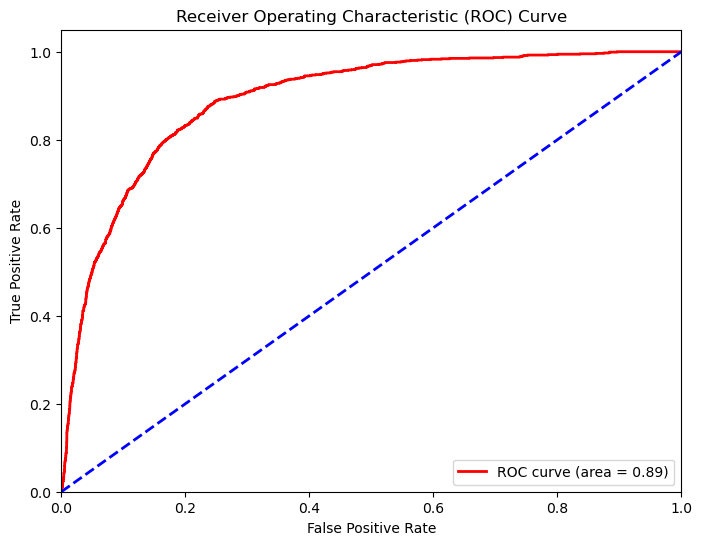

In [16]:
# Plot ROC-AUC curve
f_pr, t_pr, thresholds = roc_curve(test_data_Y, results_data["Probability"])
roc_auc = auc(f_pr, t_pr)

plt.figure(figsize=(8, 6))
plt.plot(f_pr, t_pr, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [17]:
# Print AUC-ROC score for actual and predict Y
from sklearn.metrics import roc_auc_score
print("AUC-ROC Score (Actual y):", roc_auc)
auc_roc_predicted = roc_auc_score(test_data_Y, test_pred_Y)
print("AUC-ROC Score (Predicted y):", auc_roc_predicted)

AUC-ROC Score (Actual y): 0.890950304978735
AUC-ROC Score (Predicted y): 0.8190668822567834


#comment your interpretations here.

## Task 2: NLP on  Email Data

Next up! This task involves applying NLP techniques on the data which consists of text from the email sent and their classification whether they are Spam or not Spam(Ham).

Simply run below cell to read and display the data

In [18]:
import pandas as pd

email_data = pd.read_csv("spam.csv")

email_data.head()

Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...

### Task 2A: 7 points

1. Map the 'Category' variable to 1-spam and 0-ham.
2. Display a pie chart for the distribution of two categories of emails. 
3. The pie chart should have title, the name and percentage of each category and startangle equal to 90.
4. Use explode feature for spam category.

EXPLANATION:
Mapping the category to 1-0 and 0-ham using 'map' function

In [19]:
import matplotlib.pyplot as plt
#Mapping 1-spam and 0-ham.
email_data['Category'] = email_data['Category'].map({'spam': 1, 'ham': 0})
# email_data.head()

EXPLANATION:
Distributing 2 categories based on the percentages and generating a pie chart

In [20]:
# Calculating the percent of spam and ham category
category_total_count = email_data['Category'].value_counts()
email_total = len(email_data)
spam_percent = (category_total_count[1] / email_total) * 100
ham_percent = (category_total_count[0] / email_total) * 100

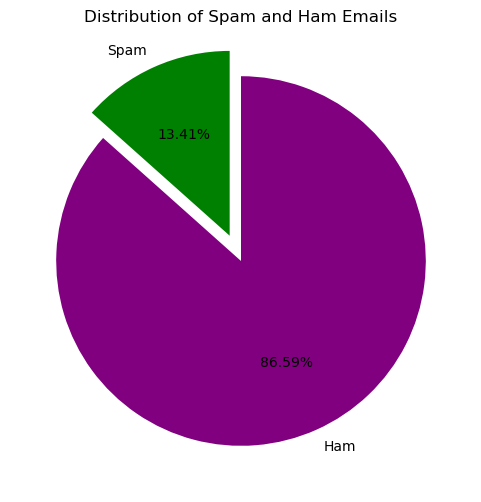

In [21]:
# Displaying a pie chart
labels = ['Spam', 'Ham']
sizes = [spam_percent, ham_percent]
explode = (0.15, 0)  # To explode the 'Spam' category
colors = ['green', 'purple']
startangle = 90
plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, startangle=startangle, autopct='%2.2f%%')
plt.title('Distribution of Spam and Ham Emails')
plt.show()

#References : https://www.w3schools.com/python/ 

### Task 2B: 10 points
Now its time to clean the text to keep as many as useful words for further processing.

1. Remove special caharacters from the text.
2. Remove stop words.
3. Lemmatize the words.
4. Keep only text that is alphabet and the length of the word is greater than 2.

Note: Remember to lower the text before applying these cleaning techniques.

In [22]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

def clean_message(msg):
# Changing text to lowercase
    msg = msg.lower()

#Eliminating special characters
    msg = re.sub(r'[^a-zA-Z\s]', '', msg)

#Text into words
    msgs = word_tokenize(msg)

#Eliminating stop words
    stop_words = set(stopwords.words('english'))
    msgs = [word for word in msgs if word not in stop_words]

#Lemmatize the words
    lemmatizer = WordNetLemmatizer()
    msgs = [lemmatizer.lemmatize(word) for word in msgs]

#words with length greater than 2
    msgs = [word for word in msgs if len(word) > 2]
    
    cleaned_text = ' '.join(msgs)
    return cleaned_text

email_data = pd.read_csv('spam.csv')

#Executing all the required processess
email_data['Message'] = email_data['Message'].apply(clean_message)

# Display the modified DataFrame
print(email_data)

#References : https://stackoverflow.com/ , https://www.w3schools.com/python/ 


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Kavish\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Kavish\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kavish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


     Category                                            Message
0         ham  jurong point crazy available bugis great world...
1         ham                                 lar joking wif oni
2        spam  free entry wkly comp win cup final tkts may te...
3         ham                      dun say early hor already say
4         ham              nah dont think usf life around though
...       ...                                                ...
5567     spam  time tried contact pound prize claim easy call...
5568      ham                               going esplanade home
5569      ham                         pity mood soany suggestion
5570      ham  guy bitching acted like interested buying some...
5571      ham                                     rofl true name

[5572 rows x 2 columns]


### Task 2C: 5 points

1. Split the data into training/testing with 80-20 ration and stratify
2. Also define startified kfold with 3 splits.

EXPLANATION:
Splitting data in 80-20 ratio into training and testing sets fo X and Y respectively.

The dataset is divided into k subsets (folds) in stratified k-fold, but the percentage of target class labels in each subset is kept constant. This lessens problems that could develop if some classes are underrepresented in certain folds, which could result in biased evaluation findings.

In [23]:
from sklearn.model_selection import train_test_split, StratifiedKFold
# Assuming the 'Category' column contains the labels for stratification
X = email_data['Message']
y = email_data['Category']

# Split the data into training and testing sets with an 80-20 ratio while stratifying
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Display the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)
print('###############################')

from sklearn.model_selection import StratifiedKFold

# Define the number of splits
n_splits = 3

# Initialize the StratifiedKFold object
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Example usage of the stratified k-fold
for train_index, test_index in stratified_kfold.split(X, y):
    X_train_fold, X_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    print("Training set shape:", X_train_fold.shape, y_train_fold.shape)
    print("Testing set shape:", X_test_fold.shape, y_test_fold.shape)
    print("******************************")

#Refrences : https://www.w3schools.com/python/  , https://www.tutorialspoint.com/python/index.htm

Training set shape: (4457,) (4457,)
Testing set shape: (1115,) (1115,)
###############################
Training set shape: (3714,) (3714,)
Testing set shape: (1858,) (1858,)
******************************
Training set shape: (3715,) (3715,)
Testing set shape: (1857,) (1857,)
******************************
Training set shape: (3715,) (3715,)
Testing set shape: (1857,) (1857,)
******************************


### Task 2D: 5 points

1. Use Bag of words technique with bigrams and apply to trainign and testing data.
2. Use TF-IDF technique with bigrams and apply to training and testing data.

TIP: Remember to store the modified data into different variables.
Note: Remember to only transform the testing data.

EXPLANATION:
BoW Technique - We used 'CountVectorizer' to convert the text into matrix of word counts and 'ngram_range=(2, 2)' to only consider the bigrams. Then using the 'fit_transform' we attach the vectorizer on the training data and transform the training data into a matrix of token counts. Atlast, we used 'transform()' to transform the testing data.

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

vectorizer_bow_D = CountVectorizer(ngram_range=(2, 2))

# Fit and transform the training data
X_train_bow_D = vectorizer_bow_D.fit_transform(X_train)

# Transform the testing data using the same vocabulary (only transform, not fit)
X_test_bow_D = vectorizer_bow_D.transform(X_test)

print("\nBag of Words representation for Training Data:")
for doc_num, vector in enumerate(X_train_bow_D):
    words_in_doc = vectorizer_bow_D.inverse_transform(vector)[0]
    freq_in_doc = vector.toarray()[0]
    for words_in_doc, freq_in_doc in zip(words_in_doc, freq_in_doc):
        print(f"Document {doc_num} - Word: {words_in_doc}, Frequency: {freq_in_doc}")

print("\nBag of Words representation for Testing Data:")
for doc_num, vector in enumerate(X_test_bow_D):
    words_in_doc = vectorizer_bow_D.inverse_transform(vector)[0]
    freq_in_doc = vector.toarray()[0]
    for words_in_doc, freq_in_doc in zip(words_in_doc, freq_in_doc):
        print(f"Document {doc_num} - Word: {words_in_doc}, Frequency: {freq_in_doc}")


Bag of Words representation for Training Data:
Document 0 - Word: guy close, Frequency: 0
Document 1 - Word: please come, Frequency: 0
Document 1 - Word: come imin, Frequency: 0
Document 1 - Word: imin towndontmatter, Frequency: 0
Document 1 - Word: towndontmatter urgoin, Frequency: 0
Document 1 - Word: urgoin outlrjust, Frequency: 0
Document 1 - Word: outlrjust reallyneed, Frequency: 0
Document 1 - Word: reallyneed docdplease, Frequency: 0
Document 1 - Word: docdplease dontplease, Frequency: 0
Document 1 - Word: dontplease dontignore, Frequency: 0
Document 1 - Word: dontignore mycallsu, Frequency: 0
Document 1 - Word: mycallsu thecd, Frequency: 0
Document 1 - Word: thecd isvimportant, Frequency: 0
Document 1 - Word: isvimportant tome, Frequency: 0
Document 1 - Word: tome moro, Frequency: 0
Document 2 - Word: ksry knw, Frequency: 0
Document 2 - Word: knw sivatats, Frequency: 0
Document 2 - Word: sivatats askd, Frequency: 0
Document 3 - Word: ill see, Frequency: 0
Document 3 - Word: se

Document 35 - Word: done internet, Frequency: 0
Document 35 - Word: internet connection, Frequency: 0
Document 35 - Word: connection slow, Frequency: 0
Document 35 - Word: slow cant, Frequency: 0
Document 35 - Word: cant send, Frequency: 0
Document 35 - Word: send try, Frequency: 0
Document 35 - Word: try later, Frequency: 0
Document 35 - Word: later first, Frequency: 0
Document 35 - Word: first thing, Frequency: 0
Document 35 - Word: thing tomo, Frequency: 0
Document 36 - Word: anything lor, Frequency: 0
Document 37 - Word: going film, Frequency: 0
Document 37 - Word: film day, Frequency: 0
Document 37 - Word: day sorry, Frequency: 0
Document 38 - Word: thought put, Frequency: 0
Document 38 - Word: put back, Frequency: 0
Document 38 - Word: back box, Frequency: 0
Document 39 - Word: important customer, Frequency: 0
Document 39 - Word: customer service, Frequency: 0
Document 39 - Word: service announcement, Frequency: 0
Document 39 - Word: announcement call, Frequency: 0
Document 39 - 

Document 69 - Word: joking seriously, Frequency: 0
Document 69 - Word: seriously told, Frequency: 0
Document 70 - Word: ranjith cal, Frequency: 0
Document 70 - Word: cal drpd, Frequency: 0
Document 70 - Word: drpd deeraj, Frequency: 0
Document 70 - Word: deeraj deepak, Frequency: 0
Document 70 - Word: deepak min, Frequency: 0
Document 70 - Word: min hold, Frequency: 0
Document 71 - Word: give time, Frequency: 0
Document 71 - Word: time walk, Frequency: 0
Document 72 - Word: sorry bathroom, Frequency: 0
Document 72 - Word: bathroom sup, Frequency: 0
Document 73 - Word: aiyar hard, Frequency: 0
Document 73 - Word: hard type, Frequency: 0
Document 73 - Word: type later, Frequency: 0
Document 73 - Word: later free, Frequency: 0
Document 73 - Word: free tell, Frequency: 0
Document 73 - Word: tell call, Frequency: 0
Document 73 - Word: call scold, Frequency: 0
Document 73 - Word: scold tell, Frequency: 0
Document 74 - Word: takin linear, Frequency: 0
Document 74 - Word: linear algebra, Frequ

Document 102 - Word: messagesome text, Frequency: 0
Document 102 - Word: text missing, Frequency: 0
Document 102 - Word: missing sendername, Frequency: 0
Document 102 - Word: sendername missing, Frequency: 0
Document 102 - Word: missing number, Frequency: 0
Document 102 - Word: number missing, Frequency: 0
Document 102 - Word: missing sentdate, Frequency: 0
Document 102 - Word: sentdate missing, Frequency: 0
Document 102 - Word: missing missing, Frequency: 0
Document 102 - Word: missing lot, Frequency: 0
Document 102 - Word: lot thats, Frequency: 0
Document 102 - Word: thats everything, Frequency: 0
Document 102 - Word: everything missing, Frequency: 0
Document 102 - Word: missing sent, Frequency: 0
Document 102 - Word: sent via, Frequency: 0
Document 102 - Word: via fullonsmscom, Frequency: 0
Document 103 - Word: gud mrng, Frequency: 0
Document 103 - Word: prof passed, Frequency: 0
Document 103 - Word: passed paper, Frequency: 0
Document 103 - Word: paper sem, Frequency: 0
Document 10

Document 127 - Word: dont remember, Frequency: 0
Document 127 - Word: remember old, Frequency: 0
Document 127 - Word: old commercial, Frequency: 0
Document 128 - Word: shopping wif, Frequency: 0
Document 128 - Word: wif darren, Frequency: 0
Document 128 - Word: darren jus, Frequency: 0
Document 128 - Word: jus called, Frequency: 0
Document 128 - Word: called ask, Frequency: 0
Document 128 - Word: ask wat, Frequency: 0
Document 128 - Word: wat present, Frequency: 0
Document 128 - Word: present wan, Frequency: 0
Document 128 - Word: wan lor, Frequency: 0
Document 128 - Word: lor started, Frequency: 0
Document 128 - Word: started guessing, Frequency: 0
Document 128 - Word: guessing wif, Frequency: 0
Document 128 - Word: wif finally, Frequency: 0
Document 128 - Word: finally guessed, Frequency: 0
Document 128 - Word: guessed darren, Frequency: 0
Document 128 - Word: darren lor, Frequency: 0
Document 129 - Word: anything lor, Frequency: 0
Document 129 - Word: lor decide, Frequency: 0
Docume

Document 157 - Word: awarded city, Frequency: 0
Document 157 - Word: city break, Frequency: 0
Document 157 - Word: break could, Frequency: 0
Document 157 - Word: could win, Frequency: 0
Document 157 - Word: win summer, Frequency: 0
Document 157 - Word: summer shopping, Frequency: 0
Document 157 - Word: shopping spree, Frequency: 0
Document 157 - Word: spree every, Frequency: 0
Document 157 - Word: every txt, Frequency: 0
Document 157 - Word: txt store, Frequency: 0
Document 157 - Word: store skilgmetscswinawkageperwksub, Frequency: 0
Document 158 - Word: sorry battery, Frequency: 0
Document 158 - Word: battery died, Frequency: 0
Document 158 - Word: died come, Frequency: 0
Document 158 - Word: come getting, Frequency: 0
Document 158 - Word: getting gram, Frequency: 0
Document 158 - Word: gram wheres, Frequency: 0
Document 158 - Word: wheres place, Frequency: 0
Document 159 - Word: congrats mobile, Frequency: 0
Document 159 - Word: mobile videophones, Frequency: 0
Document 159 - Word: v

Document 195 - Word: cause freaky, Frequency: 0
Document 195 - Word: freaky lol, Frequency: 0
Document 196 - Word: free tone, Frequency: 0
Document 196 - Word: sport fan, Frequency: 0
Document 196 - Word: fan get, Frequency: 0
Document 196 - Word: get latest, Frequency: 0
Document 196 - Word: latest sport, Frequency: 0
Document 196 - Word: sport news, Frequency: 0
Document 196 - Word: news str, Frequency: 0
Document 196 - Word: str mobile, Frequency: 0
Document 196 - Word: mobile free, Frequency: 0
Document 196 - Word: free plus, Frequency: 0
Document 196 - Word: plus free, Frequency: 0
Document 196 - Word: tone txt, Frequency: 0
Document 196 - Word: txt sport, Frequency: 0
Document 196 - Word: sport wwwgetzedcouk, Frequency: 0
Document 196 - Word: wwwgetzedcouk norm, Frequency: 0
Document 196 - Word: norm txtp, Frequency: 0
Document 197 - Word: take exam, Frequency: 0
Document 197 - Word: exam march, Frequency: 0
Document 198 - Word: pick phone, Frequency: 0
Document 198 - Word: cant 

Document 235 - Word: said look, Frequency: 0
Document 235 - Word: look pretty, Frequency: 0
Document 235 - Word: pretty wif, Frequency: 0
Document 235 - Word: wif long, Frequency: 0
Document 235 - Word: long hair, Frequency: 0
Document 235 - Word: hair wat, Frequency: 0
Document 235 - Word: wat thk, Frequency: 0
Document 235 - Word: thk cutting, Frequency: 0
Document 235 - Word: cutting quite, Frequency: 0
Document 235 - Word: quite short, Frequency: 0
Document 235 - Word: short leh, Frequency: 0
Document 236 - Word: probably want, Frequency: 0
Document 236 - Word: want pick, Frequency: 0
Document 237 - Word: wont wats, Frequency: 0
Document 237 - Word: wats wit, Frequency: 0
Document 237 - Word: wit guy, Frequency: 0
Document 238 - Word: wan early, Frequency: 0
Document 238 - Word: early lei, Frequency: 0
Document 238 - Word: lei outside, Frequency: 0
Document 238 - Word: outside wun, Frequency: 0
Document 238 - Word: wun home, Frequency: 0
Document 238 - Word: home early, Frequency: 

Document 276 - Word: call ure, Frequency: 0
Document 276 - Word: ure done, Frequency: 0
Document 277 - Word: studying sch, Frequency: 0
Document 277 - Word: sch going, Frequency: 0
Document 277 - Word: going home, Frequency: 0
Document 277 - Word: home anyway, Frequency: 0
Document 277 - Word: anyway ill, Frequency: 0
Document 277 - Word: ill going, Frequency: 0
Document 277 - Word: going sch, Frequency: 0
Document 277 - Word: sch later, Frequency: 0
Document 278 - Word: good joke, Frequency: 0
Document 278 - Word: joke girl, Frequency: 0
Document 278 - Word: girl situation, Frequency: 0
Document 278 - Word: situation seeker, Frequency: 0
Document 279 - Word: alright took, Frequency: 0
Document 279 - Word: took morphine, Frequency: 0
Document 279 - Word: morphine back, Frequency: 0
Document 280 - Word: way going, Frequency: 0
Document 280 - Word: going back, Frequency: 0
Document 281 - Word: think mentor, Frequency: 0
Document 281 - Word: mentor percent, Frequency: 0
Document 281 - Wor

Document 314 - Word: wat time, Frequency: 0
Document 314 - Word: thinking going, Frequency: 0
Document 314 - Word: going reg, Frequency: 0
Document 314 - Word: reg pract, Frequency: 0
Document 314 - Word: pract lesson, Frequency: 0
Document 314 - Word: lesson flung, Frequency: 0
Document 314 - Word: flung advance, Frequency: 0
Document 314 - Word: advance haha, Frequency: 0
Document 314 - Word: haha wat, Frequency: 0
Document 314 - Word: time going, Frequency: 0
Document 315 - Word: ltd box, Frequency: 0
Document 315 - Word: hot live, Frequency: 0
Document 315 - Word: live fantasy, Frequency: 0
Document 315 - Word: fantasy call, Frequency: 0
Document 315 - Word: call per, Frequency: 0
Document 315 - Word: per min, Frequency: 0
Document 315 - Word: min ntt, Frequency: 0
Document 315 - Word: ntt ltd, Frequency: 0
Document 315 - Word: box croydon, Frequency: 0
Document 315 - Word: croydon national, Frequency: 0
Document 315 - Word: national rate, Frequency: 0
Document 315 - Word: rate cal

Document 352 - Word: plus free, Frequency: 0
Document 352 - Word: nokia plus, Frequency: 0
Document 352 - Word: free digital, Frequency: 0
Document 352 - Word: digital camera, Frequency: 0
Document 352 - Word: camera get, Frequency: 0
Document 352 - Word: get win, Frequency: 0
Document 352 - Word: win free, Frequency: 0
Document 352 - Word: free auction, Frequency: 0
Document 352 - Word: auction take, Frequency: 0
Document 352 - Word: take part, Frequency: 0
Document 352 - Word: part send, Frequency: 0
Document 352 - Word: send nokia, Frequency: 0
Document 352 - Word: nokia poboxtcrw, Frequency: 0
Document 353 - Word: dear friend, Frequency: 0
Document 353 - Word: friend sorry, Frequency: 0
Document 353 - Word: sorry late, Frequency: 0
Document 353 - Word: late information, Frequency: 0
Document 353 - Word: information today, Frequency: 0
Document 353 - Word: today birthday, Frequency: 0
Document 353 - Word: birthday loving, Frequency: 0
Document 353 - Word: loving arpraveesh, Frequenc

Document 391 - Word: going home, Frequency: 0
Document 391 - Word: sorry going, Frequency: 0
Document 391 - Word: home first, Frequency: 0
Document 391 - Word: first daddy, Frequency: 0
Document 391 - Word: daddy come, Frequency: 0
Document 391 - Word: come fetch, Frequency: 0
Document 391 - Word: fetch later, Frequency: 0
Document 392 - Word: sent like, Frequency: 0
Document 393 - Word: thanx puttin, Frequency: 0
Document 393 - Word: puttin fone, Frequency: 0
Document 394 - Word: happy bday, Frequency: 0
Document 394 - Word: entered cabin, Frequency: 0
Document 394 - Word: cabin said, Frequency: 0
Document 394 - Word: said happy, Frequency: 0
Document 394 - Word: bday bos, Frequency: 0
Document 394 - Word: bos felt, Frequency: 0
Document 394 - Word: felt special, Frequency: 0
Document 394 - Word: special askd, Frequency: 0
Document 394 - Word: askd lunch, Frequency: 0
Document 394 - Word: lunch lunch, Frequency: 0
Document 394 - Word: lunch invited, Frequency: 0
Document 394 - Word: i

Document 429 - Word: today birthday, Frequency: 0
Document 429 - Word: tessypls favor, Frequency: 0
Document 429 - Word: favor pls, Frequency: 0
Document 429 - Word: pls convey, Frequency: 0
Document 429 - Word: convey birthday, Frequency: 0
Document 429 - Word: birthday wish, Frequency: 0
Document 429 - Word: wish nimyapls, Frequency: 0
Document 429 - Word: nimyapls dnt, Frequency: 0
Document 429 - Word: dnt forget, Frequency: 0
Document 429 - Word: forget today, Frequency: 0
Document 429 - Word: birthday shijas, Frequency: 0
Document 430 - Word: call plz, Frequency: 0
Document 430 - Word: plz number, Frequency: 0
Document 430 - Word: number show, Frequency: 0
Document 430 - Word: show coveragd, Frequency: 0
Document 430 - Word: coveragd area, Frequency: 0
Document 430 - Word: area urgnt, Frequency: 0
Document 430 - Word: urgnt call, Frequency: 0
Document 430 - Word: call vasai, Frequency: 0
Document 430 - Word: vasai amp, Frequency: 0
Document 430 - Word: amp reach, Frequency: 0
Docu

Document 469 - Word: birthdate certificate, Frequency: 0
Document 469 - Word: certificate april, Frequency: 0
Document 469 - Word: april real, Frequency: 0
Document 469 - Word: real date, Frequency: 0
Document 469 - Word: date today, Frequency: 0
Document 469 - Word: today dont, Frequency: 0
Document 469 - Word: dont publish, Frequency: 0
Document 469 - Word: publish shall, Frequency: 0
Document 469 - Word: shall give, Frequency: 0
Document 469 - Word: give special, Frequency: 0
Document 469 - Word: special treat, Frequency: 0
Document 469 - Word: treat keep, Frequency: 0
Document 469 - Word: keep secret, Frequency: 0
Document 469 - Word: secret way, Frequency: 0
Document 469 - Word: way thanks, Frequency: 0
Document 469 - Word: thanks wish, Frequency: 0
Document 470 - Word: wont call, Frequency: 0
Document 470 - Word: call disturb, Frequency: 0
Document 470 - Word: disturb one, Frequency: 0
Document 470 - Word: one know, Frequency: 0
Document 470 - Word: know avoiding, Frequency: 0
Do

Document 508 - Word: blanket sufficient, Frequency: 0
Document 508 - Word: sufficient thx, Frequency: 0
Document 509 - Word: enjoy watching, Frequency: 0
Document 509 - Word: watching playing, Frequency: 0
Document 509 - Word: playing football, Frequency: 0
Document 509 - Word: football basketball, Frequency: 0
Document 509 - Word: basketball anything, Frequency: 0
Document 509 - Word: anything outdoors, Frequency: 0
Document 510 - Word: yes nigh, Frequency: 0
Document 510 - Word: nigh cant, Frequency: 0
Document 510 - Word: cant aha, Frequency: 0
Document 511 - Word: make fuck, Frequency: 0
Document 511 - Word: fuck sake, Frequency: 0
Document 512 - Word: party alex, Frequency: 0
Document 512 - Word: alex nichols, Frequency: 0
Document 513 - Word: performance award, Frequency: 0
Document 513 - Word: award calculated, Frequency: 0
Document 513 - Word: calculated every, Frequency: 0
Document 513 - Word: every two, Frequency: 0
Document 513 - Word: two monthnot, Frequency: 0
Document 513

Document 547 - Word: shit babe, Frequency: 0
Document 547 - Word: babe thasa, Frequency: 0
Document 547 - Word: thasa bit, Frequency: 0
Document 547 - Word: bit messed, Frequency: 0
Document 547 - Word: messed upyeh, Frequency: 0
Document 547 - Word: upyeh shudvetold, Frequency: 0
Document 547 - Word: shudvetold urgran, Frequency: 0
Document 547 - Word: urgran knowneway, Frequency: 0
Document 547 - Word: knowneway illspeak, Frequency: 0
Document 547 - Word: illspeak umoro, Frequency: 0
Document 547 - Word: umoro wen, Frequency: 0
Document 547 - Word: wen asleep, Frequency: 0
Document 548 - Word: apps class, Frequency: 0
Document 548 - Word: class varaya, Frequency: 0
Document 548 - Word: varaya elaya, Frequency: 0
Document 549 - Word: amount get, Frequency: 0
Document 549 - Word: get pls, Frequency: 0
Document 550 - Word: erutupalam thandiyachu, Frequency: 0
Document 551 - Word: lmao fun, Frequency: 0
Document 552 - Word: find sitter, Frequency: 0
Document 552 - Word: sitter kaitlyn, F

Document 589 - Word: running managed, Frequency: 0
Document 589 - Word: managed minute, Frequency: 0
Document 589 - Word: minute needed, Frequency: 0
Document 589 - Word: needed oxygen, Frequency: 0
Document 589 - Word: oxygen might, Frequency: 0
Document 589 - Word: might resort, Frequency: 0
Document 589 - Word: resort roller, Frequency: 0
Document 589 - Word: roller option, Frequency: 0
Document 590 - Word: sure theyll, Frequency: 0
Document 590 - Word: theyll understand, Frequency: 0
Document 590 - Word: understand wine, Frequency: 0
Document 590 - Word: wine good, Frequency: 0
Document 590 - Word: good idea, Frequency: 0
Document 590 - Word: idea slurp, Frequency: 0
Document 591 - Word: carlos say, Frequency: 0
Document 591 - Word: say hell, Frequency: 0
Document 591 - Word: hell ltgt, Frequency: 0
Document 591 - Word: ltgt minute, Frequency: 0
Document 592 - Word: yar lor, Frequency: 0
Document 592 - Word: lor actually, Frequency: 0
Document 592 - Word: actually quite, Frequency:

Document 630 - Word: ill tell, Frequency: 0
Document 630 - Word: tell company, Frequency: 0
Document 631 - Word: wow thats, Frequency: 0
Document 631 - Word: thats gay, Frequency: 0
Document 631 - Word: gay firmware, Frequency: 0
Document 631 - Word: firmware update, Frequency: 0
Document 631 - Word: update help, Frequency: 0
Document 632 - Word: gon ring, Frequency: 0
Document 632 - Word: ring weekend, Frequency: 0
Document 632 - Word: weekend wot, Frequency: 0
Document 633 - Word: outside office, Frequency: 0
Document 633 - Word: office take, Frequency: 0
Document 634 - Word: ill call, Frequency: 0
Document 634 - Word: call evening, Frequency: 0
Document 634 - Word: evening ill, Frequency: 0
Document 634 - Word: ill idea, Frequency: 0
Document 635 - Word: urgent guaranteed, Frequency: 0
Document 635 - Word: guaranteed award, Frequency: 0
Document 635 - Word: award still, Frequency: 0
Document 635 - Word: still unclaimed, Frequency: 0
Document 635 - Word: unclaimed call, Frequency: 0


Document 670 - Word: eek thats, Frequency: 0
Document 670 - Word: thats lot, Frequency: 0
Document 670 - Word: lot time, Frequency: 0
Document 670 - Word: time especially, Frequency: 0
Document 670 - Word: especially since, Frequency: 0
Document 670 - Word: since american, Frequency: 0
Document 670 - Word: american pie, Frequency: 0
Document 670 - Word: pie like, Frequency: 0
Document 670 - Word: like minute, Frequency: 0
Document 670 - Word: minute long, Frequency: 0
Document 670 - Word: long cant, Frequency: 0
Document 670 - Word: cant stop, Frequency: 0
Document 670 - Word: stop singing, Frequency: 0
Document 671 - Word: last week, Frequency: 0
Document 671 - Word: sad story, Frequency: 0
Document 671 - Word: story man, Frequency: 0
Document 671 - Word: man last, Frequency: 0
Document 671 - Word: week bday, Frequency: 0
Document 671 - Word: bday wife, Frequency: 0
Document 671 - Word: wife didnt, Frequency: 0
Document 671 - Word: didnt wish, Frequency: 0
Document 671 - Word: wish pa

Document 690 - Word: get lion, Frequency: 0
Document 690 - Word: lion england, Frequency: 0
Document 690 - Word: england tone, Frequency: 0
Document 690 - Word: tone reply, Frequency: 0
Document 690 - Word: reply lionm, Frequency: 0
Document 690 - Word: lionm mono, Frequency: 0
Document 690 - Word: mono lionp, Frequency: 0
Document 690 - Word: lionp poly, Frequency: 0
Document 690 - Word: poly wwwringtonescouk, Frequency: 0
Document 690 - Word: wwwringtonescouk original, Frequency: 0
Document 690 - Word: original best, Frequency: 0
Document 690 - Word: best tone, Frequency: 0
Document 690 - Word: tone gbp, Frequency: 0
Document 690 - Word: gbp network, Frequency: 0
Document 690 - Word: network operator, Frequency: 0
Document 690 - Word: operator rate, Frequency: 0
Document 690 - Word: rate apply, Frequency: 0
Document 691 - Word: home doc, Frequency: 0
Document 691 - Word: doc gave, Frequency: 0
Document 691 - Word: gave pain, Frequency: 0
Document 691 - Word: pain med, Frequency: 0
Do

Document 729 - Word: glad following, Frequency: 0
Document 729 - Word: following dream, Frequency: 0
Document 730 - Word: yup comin, Frequency: 0
Document 731 - Word: nicenicehow working, Frequency: 0
Document 732 - Word: block breaker, Frequency: 0
Document 732 - Word: breaker come, Frequency: 0
Document 732 - Word: come deluxe, Frequency: 0
Document 732 - Word: deluxe format, Frequency: 0
Document 732 - Word: format new, Frequency: 0
Document 732 - Word: new feature, Frequency: 0
Document 732 - Word: feature great, Frequency: 0
Document 732 - Word: great graphic, Frequency: 0
Document 732 - Word: graphic tmobile, Frequency: 0
Document 732 - Word: tmobile buy, Frequency: 0
Document 732 - Word: buy replying, Frequency: 0
Document 732 - Word: replying get, Frequency: 0
Document 732 - Word: get bbdeluxe, Frequency: 0
Document 732 - Word: bbdeluxe take, Frequency: 0
Document 732 - Word: take challenge, Frequency: 0
Document 733 - Word: already lar, Frequency: 0
Document 733 - Word: sorry 

Document 764 - Word: ive sent, Frequency: 0
Document 764 - Word: sent part, Frequency: 0
Document 765 - Word: dating service, Frequency: 0
Document 765 - Word: call landline, Frequency: 0
Document 765 - Word: someone conacted, Frequency: 0
Document 765 - Word: conacted dating, Frequency: 0
Document 765 - Word: service entered, Frequency: 0
Document 765 - Word: entered phone, Frequency: 0
Document 765 - Word: phone fancy, Frequency: 0
Document 765 - Word: fancy youto, Frequency: 0
Document 765 - Word: youto find, Frequency: 0
Document 765 - Word: find call, Frequency: 0
Document 765 - Word: landline poboxntf, Frequency: 0
Document 766 - Word: thats shame, Frequency: 0
Document 766 - Word: shame maybe, Frequency: 0
Document 766 - Word: maybe cld, Frequency: 0
Document 766 - Word: cld meet, Frequency: 0
Document 766 - Word: meet tomo, Frequency: 0
Document 767 - Word: openin sentence, Frequency: 0
Document 767 - Word: sentence formal, Frequency: 0
Document 767 - Word: formal anyway, Frequ

Document 800 - Word: dont know, Frequency: 0
Document 800 - Word: know support, Frequency: 0
Document 800 - Word: support srt, Frequency: 0
Document 800 - Word: srt thnk, Frequency: 0
Document 800 - Word: thnk think, Frequency: 0
Document 800 - Word: think play, Frequency: 0
Document 800 - Word: play usb, Frequency: 0
Document 801 - Word: per request, Frequency: 0
Document 801 - Word: request melle, Frequency: 0
Document 801 - Word: melle melle, Frequency: 0
Document 801 - Word: melle oru, Frequency: 0
Document 801 - Word: oru minnaminunginte, Frequency: 0
Document 801 - Word: minnaminunginte nurungu, Frequency: 0
Document 801 - Word: nurungu vettam, Frequency: 0
Document 801 - Word: vettam set, Frequency: 0
Document 801 - Word: set callertune, Frequency: 0
Document 801 - Word: callertune caller, Frequency: 0
Document 801 - Word: caller press, Frequency: 0
Document 801 - Word: press copy, Frequency: 0
Document 801 - Word: copy friend, Frequency: 0
Document 801 - Word: friend callertune

Document 836 - Word: yes completely, Frequency: 0
Document 836 - Word: completely formclark, Frequency: 0
Document 836 - Word: formclark also, Frequency: 0
Document 836 - Word: also utter, Frequency: 0
Document 836 - Word: utter waste, Frequency: 0
Document 837 - Word: princess kitty, Frequency: 0
Document 837 - Word: kitty shaved, Frequency: 0
Document 837 - Word: shaved natural, Frequency: 0
Document 838 - Word: hope thats, Frequency: 0
Document 838 - Word: thats result, Frequency: 0
Document 838 - Word: result consistently, Frequency: 0
Document 838 - Word: consistently intelligent, Frequency: 0
Document 838 - Word: intelligent kind, Frequency: 0
Document 838 - Word: kind start, Frequency: 0
Document 838 - Word: start asking, Frequency: 0
Document 838 - Word: asking practicum, Frequency: 0
Document 838 - Word: practicum link, Frequency: 0
Document 838 - Word: link keep, Frequency: 0
Document 838 - Word: keep ear, Frequency: 0
Document 838 - Word: ear open, Frequency: 0
Document 838 

Document 873 - Word: great weekend, Frequency: 0
Document 873 - Word: well great, Frequency: 0
Document 874 - Word: please call, Frequency: 0
Document 874 - Word: home please, Frequency: 0
Document 875 - Word: happy birthday, Frequency: 0
Document 875 - Word: birthday may, Frequency: 0
Document 875 - Word: may find, Frequency: 0
Document 875 - Word: find prince, Frequency: 0
Document 875 - Word: prince charming, Frequency: 0
Document 875 - Word: charming soon, Frequency: 0
Document 875 - Word: soon dun, Frequency: 0
Document 875 - Word: dun work, Frequency: 0
Document 875 - Word: work hard, Frequency: 0
Document 876 - Word: sfrom training, Frequency: 0
Document 876 - Word: training manual, Frequency: 0
Document 876 - Word: manual show, Frequency: 0
Document 876 - Word: show tech, Frequency: 0
Document 876 - Word: tech processits, Frequency: 0
Document 876 - Word: processits password, Frequency: 0
Document 876 - Word: password reset, Frequency: 0
Document 876 - Word: reset troubleshooti

Document 911 - Word: head dont, Frequency: 0
Document 911 - Word: dont forget, Frequency: 0
Document 911 - Word: mmmm fuck, Frequency: 0
Document 911 - Word: fuck fair, Frequency: 0
Document 911 - Word: fair know, Frequency: 0
Document 911 - Word: know weakness, Frequency: 0
Document 911 - Word: weakness grin, Frequency: 0
Document 911 - Word: grin push, Frequency: 0
Document 911 - Word: push knee, Frequency: 0
Document 911 - Word: knee expose, Frequency: 0
Document 911 - Word: expose belly, Frequency: 0
Document 911 - Word: belly pull, Frequency: 0
Document 911 - Word: pull head, Frequency: 0
Document 911 - Word: forget know, Frequency: 0
Document 911 - Word: know wicked, Frequency: 0
Document 911 - Word: wicked smile, Frequency: 0
Document 912 - Word: ive got, Frequency: 0
Document 912 - Word: hello yeah, Frequency: 0
Document 912 - Word: yeah ive, Frequency: 0
Document 912 - Word: got bath, Frequency: 0
Document 912 - Word: bath need, Frequency: 0
Document 912 - Word: need hair, Fre

Document 949 - Word: good morning, Frequency: 0
Document 949 - Word: morning headache, Frequency: 0
Document 949 - Word: headache anyone, Frequency: 0
Document 950 - Word: stay night, Frequency: 0
Document 950 - Word: night xavier, Frequency: 0
Document 950 - Word: xavier sleeping, Frequency: 0
Document 950 - Word: sleeping bag, Frequency: 0
Document 950 - Word: bag getting, Frequency: 0
Document 950 - Word: getting tired, Frequency: 0
Document 951 - Word: ssnervous ltgt, Frequency: 0
Document 952 - Word: way ive, Frequency: 0
Document 952 - Word: ive put, Frequency: 0
Document 952 - Word: put skip, Frequency: 0
Document 952 - Word: skip right, Frequency: 0
Document 952 - Word: right outside, Frequency: 0
Document 952 - Word: outside front, Frequency: 0
Document 952 - Word: front house, Frequency: 0
Document 952 - Word: house see, Frequency: 0
Document 952 - Word: see house, Frequency: 0
Document 952 - Word: house pull, Frequency: 0
Document 953 - Word: evo download, Frequency: 0
Docum

Document 983 - Word: dont want, Frequency: 0
Document 983 - Word: want hear, Frequency: 0
Document 983 - Word: hear anything, Frequency: 0
Document 984 - Word: care sweet, Frequency: 0
Document 984 - Word: lateso call, Frequency: 0
Document 984 - Word: call tomorrow, Frequency: 0
Document 984 - Word: tomorrow morningtake, Frequency: 0
Document 984 - Word: morningtake care, Frequency: 0
Document 984 - Word: sweet dreamsu, Frequency: 0
Document 984 - Word: dreamsu meummifyingbye, Frequency: 0
Document 985 - Word: dare stupid, Frequency: 0
Document 985 - Word: stupid wont, Frequency: 0
Document 985 - Word: wont tell, Frequency: 0
Document 985 - Word: tell anything, Frequency: 0
Document 985 - Word: anything hear, Frequency: 0
Document 985 - Word: hear wont, Frequency: 0
Document 985 - Word: wont talk, Frequency: 0
Document 986 - Word: got look, Frequency: 0
Document 986 - Word: look scrumptious, Frequency: 0
Document 986 - Word: scrumptious daddy, Frequency: 0
Document 986 - Word: daddy w

Document 1017 - Word: sif one, Frequency: 0
Document 1017 - Word: one good, Frequency: 0
Document 1017 - Word: good partnership, Frequency: 0
Document 1017 - Word: partnership going, Frequency: 0
Document 1017 - Word: going take, Frequency: 0
Document 1017 - Word: take lead, Frequency: 0
Document 1018 - Word: see soon, Frequency: 0
Document 1018 - Word: babe thanks, Frequency: 0
Document 1018 - Word: thanks coming, Frequency: 0
Document 1018 - Word: coming even, Frequency: 0
Document 1018 - Word: even though, Frequency: 0
Document 1018 - Word: though didnt, Frequency: 0
Document 1018 - Word: didnt welli, Frequency: 0
Document 1018 - Word: welli wanted, Frequency: 0
Document 1018 - Word: wanted bed, Frequency: 0
Document 1018 - Word: bed hope, Frequency: 0
Document 1018 - Word: hope see, Frequency: 0
Document 1018 - Word: soon love, Frequency: 0
Document 1018 - Word: love kiss, Frequency: 0
Document 1018 - Word: kiss xxx, Frequency: 0
Document 1020 - Word: east coast, Frequency: 0
Docum

Document 1057 - Word: noe ben, Frequency: 0
Document 1057 - Word: ben going, Frequency: 0
Document 1058 - Word: gibbs unsoldmike, Frequency: 0
Document 1058 - Word: unsoldmike hussey, Frequency: 0
Document 1059 - Word: zoe hit, Frequency: 0
Document 1059 - Word: hit fucking, Frequency: 0
Document 1059 - Word: fucking shitin, Frequency: 0
Document 1059 - Word: shitin defo, Frequency: 0
Document 1059 - Word: defo try, Frequency: 0
Document 1059 - Word: try hardest, Frequency: 0
Document 1059 - Word: hardest cum, Frequency: 0
Document 1059 - Word: cum morow, Frequency: 0
Document 1059 - Word: morow luv, Frequency: 0
Document 1059 - Word: luv million, Frequency: 0
Document 1059 - Word: million lekdog, Frequency: 0
Document 1060 - Word: said would, Frequency: 0
Document 1060 - Word: hope said, Frequency: 0
Document 1060 - Word: would text, Frequency: 0
Document 1060 - Word: text hasnt, Frequency: 0
Document 1060 - Word: hasnt seen, Frequency: 0
Document 1060 - Word: seen let, Frequency: 0
D

Document 1096 - Word: kkthis month, Frequency: 0
Document 1096 - Word: month kotees, Frequency: 0
Document 1096 - Word: kotees birthday, Frequency: 0
Document 1096 - Word: birthday know, Frequency: 0
Document 1097 - Word: dont like, Frequency: 0
Document 1097 - Word: wouldnt say, Frequency: 0
Document 1097 - Word: say didnt, Frequency: 0
Document 1097 - Word: didnt read, Frequency: 0
Document 1097 - Word: read anything, Frequency: 0
Document 1097 - Word: anything way, Frequency: 0
Document 1097 - Word: way seemed, Frequency: 0
Document 1097 - Word: seemed dont, Frequency: 0
Document 1097 - Word: like judgementali, Frequency: 0
Document 1097 - Word: judgementali save, Frequency: 0
Document 1097 - Word: save friday, Frequency: 0
Document 1097 - Word: friday pub, Frequency: 0
Document 1098 - Word: cashbincouk get, Frequency: 0
Document 1098 - Word: get lot, Frequency: 0
Document 1098 - Word: lot cash, Frequency: 0
Document 1098 - Word: cash weekend, Frequency: 0
Document 1098 - Word: week

Document 1114 - Word: bored housewife, Frequency: 0
Document 1114 - Word: housewife chat, Frequency: 0
Document 1114 - Word: chat date, Frequency: 0
Document 1114 - Word: date btnational, Frequency: 0
Document 1114 - Word: btnational rate, Frequency: 0
Document 1114 - Word: rate pmin, Frequency: 0
Document 1114 - Word: pmin landline, Frequency: 0
Document 1115 - Word: worse half, Frequency: 0
Document 1115 - Word: half way, Frequency: 0
Document 1115 - Word: way stop, Frequency: 0
Document 1115 - Word: stop better, Frequency: 0
Document 1115 - Word: better complete, Frequency: 0
Document 1116 - Word: yes think, Frequency: 0
Document 1116 - Word: think office, Frequency: 0
Document 1116 - Word: office lap, Frequency: 0
Document 1116 - Word: lap room, Frequency: 0
Document 1116 - Word: room think, Frequency: 0
Document 1116 - Word: think thats, Frequency: 0
Document 1116 - Word: thats last, Frequency: 0
Document 1116 - Word: last day, Frequency: 0
Document 1116 - Word: day didnt, Frequen

Document 1154 - Word: thanx birthday, Frequency: 0
Document 1154 - Word: birthday already, Frequency: 0
Document 1155 - Word: wat get, Frequency: 0
Document 1155 - Word: smile face, Frequency: 0
Document 1155 - Word: pas dis, Frequency: 0
Document 1155 - Word: dis contact, Frequency: 0
Document 1155 - Word: contact see, Frequency: 0
Document 1155 - Word: see wat, Frequency: 0
Document 1155 - Word: get redim, Frequency: 0
Document 1155 - Word: redim luv, Frequency: 0
Document 1155 - Word: luv wid, Frequency: 0
Document 1155 - Word: wid blueu, Frequency: 0
Document 1155 - Word: blueu put, Frequency: 0
Document 1155 - Word: put smile, Frequency: 0
Document 1155 - Word: face purpleu, Frequency: 0
Document 1155 - Word: purpleu realy, Frequency: 0
Document 1155 - Word: realy hot, Frequency: 0
Document 1155 - Word: hot pinku, Frequency: 0
Document 1155 - Word: pinku swt, Frequency: 0
Document 1155 - Word: swt orangei, Frequency: 0
Document 1155 - Word: orangei thnk, Frequency: 0
Document 1155

Document 1192 - Word: hey whats, Frequency: 0
Document 1192 - Word: whats plan, Frequency: 0
Document 1192 - Word: plan sat, Frequency: 0
Document 1193 - Word: oops got, Frequency: 0
Document 1193 - Word: got bit, Frequency: 0
Document 1194 - Word: lem know, Frequency: 0
Document 1194 - Word: aight lem, Frequency: 0
Document 1194 - Word: know whats, Frequency: 0
Document 1195 - Word: babe miss, Frequency: 0
Document 1195 - Word: good day, Frequency: 0
Document 1195 - Word: hope good, Frequency: 0
Document 1195 - Word: anyways gym, Frequency: 0
Document 1195 - Word: gym whatever, Frequency: 0
Document 1195 - Word: whatever love, Frequency: 0
Document 1195 - Word: love smile, Frequency: 0
Document 1195 - Word: smile hope, Frequency: 0
Document 1195 - Word: day babe, Frequency: 0
Document 1195 - Word: miss much, Frequency: 0
Document 1195 - Word: much already, Frequency: 0
Document 1196 - Word: noits ful, Frequency: 0
Document 1196 - Word: ful song, Frequency: 0
Document 1196 - Word: song

Document 1232 - Word: called left, Frequency: 0
Document 1232 - Word: left message, Frequency: 0
Document 1232 - Word: time talk, Frequency: 0
Document 1232 - Word: problem baby, Frequency: 0
Document 1232 - Word: baby good, Frequency: 0
Document 1232 - Word: good time, Frequency: 0
Document 1232 - Word: talk called, Frequency: 0
Document 1233 - Word: ill free, Frequency: 0
Document 1233 - Word: studying ill, Frequency: 0
Document 1233 - Word: free next, Frequency: 0
Document 1233 - Word: next weekend, Frequency: 0
Document 1234 - Word: thinkin someone, Frequency: 0
Document 1234 - Word: someone good, Frequency: 0
Document 1234 - Word: good drug, Frequency: 0
Document 1235 - Word: ive got, Frequency: 0
Document 1235 - Word: said ive, Frequency: 0
Document 1235 - Word: got wisdom, Frequency: 0
Document 1235 - Word: wisdom teeth, Frequency: 0
Document 1235 - Word: teeth hidden, Frequency: 0
Document 1235 - Word: hidden inside, Frequency: 0
Document 1235 - Word: inside mayb, Frequency: 0


Document 1272 - Word: wifehow knew, Frequency: 0
Document 1272 - Word: knew time, Frequency: 0
Document 1272 - Word: time murder, Frequency: 0
Document 1272 - Word: murder exactly, Frequency: 0
Document 1273 - Word: check there, Frequency: 0
Document 1273 - Word: there like, Frequency: 0
Document 1273 - Word: like bowl, Frequency: 0
Document 1273 - Word: bowl worth, Frequency: 0
Document 1273 - Word: worth left, Frequency: 0
Document 1274 - Word: kthen special, Frequency: 0
Document 1275 - Word: nope still, Frequency: 0
Document 1275 - Word: still market, Frequency: 0
Document 1276 - Word: dating service, Frequency: 0
Document 1276 - Word: call revealed, Frequency: 0
Document 1276 - Word: someone know, Frequency: 0
Document 1276 - Word: know asked, Frequency: 0
Document 1276 - Word: asked dating, Frequency: 0
Document 1276 - Word: service contact, Frequency: 0
Document 1276 - Word: contact cant, Frequency: 0
Document 1276 - Word: cant guess, Frequency: 0
Document 1276 - Word: guess cal

Document 1313 - Word: escape theatre, Frequency: 0
Document 1313 - Word: theatre going, Frequency: 0
Document 1313 - Word: going watch, Frequency: 0
Document 1313 - Word: watch kavalan, Frequency: 0
Document 1313 - Word: kavalan minute, Frequency: 0
Document 1314 - Word: ill see, Frequency: 0
Document 1314 - Word: ill get, Frequency: 0
Document 1314 - Word: want come, Frequency: 0
Document 1314 - Word: cant take, Frequency: 0
Document 1314 - Word: sorry cant, Frequency: 0
Document 1314 - Word: take call, Frequency: 0
Document 1314 - Word: call right, Frequency: 0
Document 1314 - Word: right happens, Frequency: 0
Document 1314 - Word: happens waxsto, Frequency: 0
Document 1314 - Word: waxsto wat, Frequency: 0
Document 1314 - Word: wat want, Frequency: 0
Document 1314 - Word: come ill, Frequency: 0
Document 1314 - Word: get medical, Frequency: 0
Document 1314 - Word: medical insurance, Frequency: 0
Document 1314 - Word: insurance shell, Frequency: 0
Document 1314 - Word: shell able, Freq

Document 1354 - Word: came ago, Frequency: 0
Document 1355 - Word: start sending, Frequency: 0
Document 1355 - Word: sending blackberry, Frequency: 0
Document 1355 - Word: blackberry torch, Frequency: 0
Document 1355 - Word: torch nigeria, Frequency: 0
Document 1355 - Word: nigeria find, Frequency: 0
Document 1355 - Word: find buyer, Frequency: 0
Document 1355 - Word: buyer melike, Frequency: 0
Document 1355 - Word: melike month, Frequency: 0
Document 1355 - Word: month tell, Frequency: 0
Document 1355 - Word: tell dad, Frequency: 0
Document 1355 - Word: dad buy, Frequency: 0
Document 1355 - Word: buy anyone, Frequency: 0
Document 1356 - Word: ltgt minute, Frequency: 0
Document 1356 - Word: minute ago, Frequency: 0
Document 1356 - Word: gim ltgt, Frequency: 0
Document 1357 - Word: dont miss, Frequency: 0
Document 1357 - Word: england macedonia, Frequency: 0
Document 1357 - Word: macedonia dont, Frequency: 0
Document 1357 - Word: miss goalsteam, Frequency: 0
Document 1357 - Word: goalst

Document 1395 - Word: selected receive, Frequency: 0
Document 1395 - Word: number ending, Frequency: 0
Document 1395 - Word: receive award, Frequency: 0
Document 1395 - Word: today vodafone, Frequency: 0
Document 1395 - Word: vodafone number, Frequency: 0
Document 1395 - Word: ending selected, Frequency: 0
Document 1395 - Word: award number, Frequency: 0
Document 1395 - Word: number match, Frequency: 0
Document 1395 - Word: match call, Frequency: 0
Document 1395 - Word: call receive, Frequency: 0
Document 1396 - Word: youll get, Frequency: 0
Document 1396 - Word: get text, Frequency: 0
Document 1396 - Word: wonder youll, Frequency: 0
Document 1397 - Word: come alivebetter, Frequency: 0
Document 1397 - Word: alivebetter correct, Frequency: 0
Document 1397 - Word: correct good, Frequency: 0
Document 1397 - Word: good looking, Frequency: 0
Document 1397 - Word: looking figure, Frequency: 0
Document 1398 - Word: smile pleasure, Frequency: 0
Document 1398 - Word: pleasure smile, Frequency: 

Document 1416 - Word: send number, Frequency: 0
Document 1416 - Word: number give, Frequency: 0
Document 1416 - Word: give reply, Frequency: 0
Document 1416 - Word: reply tomorrow, Frequency: 0
Document 1416 - Word: tomorrow morning, Frequency: 0
Document 1416 - Word: morning said, Frequency: 0
Document 1416 - Word: said like, Frequency: 0
Document 1417 - Word: private account, Frequency: 0
Document 1417 - Word: account statement, Frequency: 0
Document 1417 - Word: statement show, Frequency: 0
Document 1417 - Word: show unredeemed, Frequency: 0
Document 1417 - Word: point call, Frequency: 0
Document 1417 - Word: call identifier, Frequency: 0
Document 1417 - Word: identifier code, Frequency: 0
Document 1417 - Word: code expires, Frequency: 0
Document 1417 - Word: unredeemed point, Frequency: 0
Document 1418 - Word: good evening, Frequency: 0
Document 1418 - Word: anyway many, Frequency: 0
Document 1418 - Word: many good, Frequency: 0
Document 1419 - Word: dear friend, Frequency: 0
Docum

Document 1460 - Word: ltgt minute, Frequency: 0
Document 1460 - Word: hear loud, Frequency: 0
Document 1460 - Word: loud scream, Frequency: 0
Document 1460 - Word: scream ltgt, Frequency: 0
Document 1460 - Word: minute cause, Frequency: 0
Document 1460 - Word: cause gyno, Frequency: 0
Document 1460 - Word: gyno shoving, Frequency: 0
Document 1460 - Word: shoving thing, Frequency: 0
Document 1460 - Word: thing dont, Frequency: 0
Document 1460 - Word: dont belong, Frequency: 0
Document 1462 - Word: hui xin, Frequency: 0
Document 1462 - Word: xin lib, Frequency: 0
Document 1463 - Word: completed degree, Frequency: 0
Document 1463 - Word: degree use, Frequency: 0
Document 1463 - Word: use joining, Frequency: 0
Document 1463 - Word: joining finance, Frequency: 0
Document 1464 - Word: always one, Frequency: 0
Document 1464 - Word: know grumpy, Frequency: 0
Document 1464 - Word: grumpy old, Frequency: 0
Document 1464 - Word: old people, Frequency: 0
Document 1464 - Word: people mom, Frequency

Document 1481 - Word: think smart, Frequency: 0
Document 1481 - Word: smart win, Frequency: 0
Document 1481 - Word: win week, Frequency: 0
Document 1481 - Word: week weekly, Frequency: 0
Document 1481 - Word: weekly quiz, Frequency: 0
Document 1481 - Word: quiz text, Frequency: 0
Document 1481 - Word: text play, Frequency: 0
Document 1481 - Word: play nowtcs, Frequency: 0
Document 1481 - Word: nowtcs winnersclub, Frequency: 0
Document 1481 - Word: winnersclub box, Frequency: 0
Document 1481 - Word: box gbpweek, Frequency: 0
Document 1482 - Word: howz painhope, Frequency: 0
Document 1482 - Word: painhope fine, Frequency: 0
Document 1483 - Word: got late, Frequency: 0
Document 1483 - Word: late start, Frequency: 0
Document 1483 - Word: dad wanted, Frequency: 0
Document 1483 - Word: wanted talk, Frequency: 0
Document 1483 - Word: talk apartment, Frequency: 0
Document 1483 - Word: apartment got, Frequency: 0
Document 1483 - Word: start omw, Frequency: 0
Document 1484 - Word: call landline,

Document 1523 - Word: wont anything, Frequency: 0
Document 1524 - Word: opt reply, Frequency: 0
Document 1524 - Word: reply stop, Frequency: 0
Document 1524 - Word: stop customer, Frequency: 0
Document 1524 - Word: customer care, Frequency: 0
Document 1524 - Word: log onto, Frequency: 0
Document 1524 - Word: voucher marsms, Frequency: 0
Document 1524 - Word: marsms log, Frequency: 0
Document 1524 - Word: onto wwwbutelecom, Frequency: 0
Document 1524 - Word: wwwbutelecom discount, Frequency: 0
Document 1524 - Word: discount credit, Frequency: 0
Document 1524 - Word: credit opt, Frequency: 0
Document 1524 - Word: care call, Frequency: 0
Document 1525 - Word: goodmorning today, Frequency: 0
Document 1525 - Word: today late, Frequency: 0
Document 1525 - Word: late ltdecimalgt, Frequency: 0
Document 1525 - Word: ltdecimalgt min, Frequency: 0
Document 1526 - Word: couple day, Frequency: 0
Document 1526 - Word: see couple, Frequency: 0
Document 1526 - Word: arrived see, Frequency: 0
Document 

Document 1563 - Word: delhi chennai, Frequency: 0
Document 1563 - Word: chennai still, Frequency: 0
Document 1563 - Word: still silent, Frequency: 0
Document 1564 - Word: holiday await, Frequency: 0
Document 1564 - Word: await collection, Frequency: 0
Document 1564 - Word: costa del, Frequency: 0
Document 1564 - Word: del sol, Frequency: 0
Document 1564 - Word: sol holiday, Frequency: 0
Document 1564 - Word: collection call, Frequency: 0
Document 1564 - Word: call toclaim, Frequency: 0
Document 1564 - Word: toclaim sae, Frequency: 0
Document 1564 - Word: sae pobox, Frequency: 0
Document 1564 - Word: pobox stockport, Frequency: 0
Document 1564 - Word: stockport skxh, Frequency: 0
Document 1564 - Word: skxh costpm, Frequency: 0
Document 1564 - Word: costpm maxmins, Frequency: 0
Document 1564 - Word: urgent costa, Frequency: 0
Document 1565 - Word: surely dont, Frequency: 0
Document 1565 - Word: dont forgot, Frequency: 0
Document 1565 - Word: forgot comei, Frequency: 0
Document 1565 - Wor

Document 1604 - Word: sorry would, Frequency: 0
Document 1604 - Word: gon say, Frequency: 0
Document 1604 - Word: say sorry, Frequency: 0
Document 1604 - Word: would normal, Frequency: 0
Document 1604 - Word: normal starting, Frequency: 0
Document 1604 - Word: starting panic, Frequency: 0
Document 1604 - Word: panic time, Frequency: 0
Document 1604 - Word: time sorry, Frequency: 0
Document 1604 - Word: sorry seeing, Frequency: 0
Document 1604 - Word: seeing tuesday, Frequency: 0
Document 1605 - Word: could ask, Frequency: 0
Document 1605 - Word: ask carlos, Frequency: 0
Document 1605 - Word: carlos could, Frequency: 0
Document 1605 - Word: could get, Frequency: 0
Document 1605 - Word: get anybody, Frequency: 0
Document 1605 - Word: anybody else, Frequency: 0
Document 1605 - Word: else chip, Frequency: 0
Document 1606 - Word: first thing, Frequency: 0
Document 1606 - Word: would like, Frequency: 0
Document 1606 - Word: like say, Frequency: 0
Document 1606 - Word: every time, Frequency: 

Document 1625 - Word: tomarrow final, Frequency: 0
Document 1625 - Word: final hearing, Frequency: 0
Document 1625 - Word: hearing laptop, Frequency: 0
Document 1625 - Word: laptop case, Frequency: 0
Document 1625 - Word: case cant, Frequency: 0
Document 1626 - Word: dont worry, Frequency: 0
Document 1626 - Word: thats significant, Frequency: 0
Document 1626 - Word: significant dont, Frequency: 0
Document 1627 - Word: term condition, Frequency: 0
Document 1627 - Word: recieve tone, Frequency: 0
Document 1627 - Word: tone within, Frequency: 0
Document 1627 - Word: within next, Frequency: 0
Document 1627 - Word: next term, Frequency: 0
Document 1627 - Word: condition please, Frequency: 0
Document 1627 - Word: please see, Frequency: 0
Document 1627 - Word: see channel, Frequency: 0
Document 1627 - Word: channel teletext, Frequency: 0
Document 1628 - Word: dunno ask, Frequency: 0
Document 1629 - Word: knw dis, Frequency: 0
Document 1629 - Word: dis ltgt, Frequency: 0
Document 1630 - Word: 

Document 1665 - Word: havent got, Frequency: 0
Document 1665 - Word: got topic, Frequency: 0
Document 1665 - Word: topic yet, Frequency: 0
Document 1665 - Word: yet rite, Frequency: 0
Document 1666 - Word: nice line, Frequency: 0
Document 1666 - Word: line said, Frequency: 0
Document 1666 - Word: said broken, Frequency: 0
Document 1666 - Word: broken heart, Frequency: 0
Document 1666 - Word: heart plz, Frequency: 0
Document 1666 - Word: plz dont, Frequency: 0
Document 1666 - Word: dont cum, Frequency: 0
Document 1666 - Word: cum time, Frequency: 0
Document 1666 - Word: time infront, Frequency: 0
Document 1666 - Word: infront wise, Frequency: 0
Document 1666 - Word: wise trust, Frequency: 0
Document 1666 - Word: trust good, Frequency: 0
Document 1667 - Word: happy new, Frequency: 0
Document 1667 - Word: new year, Frequency: 0
Document 1667 - Word: good morning, Frequency: 0
Document 1667 - Word: morning princess, Frequency: 0
Document 1667 - Word: princess happy, Frequency: 0
Document 1

Document 1706 - Word: last night, Frequency: 0
Document 1706 - Word: prashanthettans mother, Frequency: 0
Document 1706 - Word: mother passed, Frequency: 0
Document 1706 - Word: passed away, Frequency: 0
Document 1706 - Word: away last, Frequency: 0
Document 1706 - Word: night pray, Frequency: 0
Document 1706 - Word: pray family, Frequency: 0
Document 1707 - Word: still checked, Frequency: 0
Document 1708 - Word: tmrw finishing, Frequency: 0
Document 1708 - Word: finishing door, Frequency: 0
Document 1709 - Word: good weekend, Frequency: 0
Document 1710 - Word: haha yeah, Frequency: 0
Document 1710 - Word: yeah kind, Frequency: 0
Document 1710 - Word: kind shitload, Frequency: 0
Document 1711 - Word: pussy perfect, Frequency: 0
Document 1712 - Word: reverse cheating, Frequency: 0
Document 1712 - Word: cheating mathematics, Frequency: 0
Document 1713 - Word: thats fine, Frequency: 0
Document 1713 - Word: nope thats, Frequency: 0
Document 1713 - Word: fine might, Frequency: 0
Document 17

Document 1746 - Word: customer service, Frequency: 0
Document 1746 - Word: call customer, Frequency: 0
Document 1746 - Word: prize call, Frequency: 0
Document 1746 - Word: service representative, Frequency: 0
Document 1746 - Word: guaranteed cash, Frequency: 0
Document 1746 - Word: claim prize, Frequency: 0
Document 1746 - Word: cash prizeto, Frequency: 0
Document 1746 - Word: prizeto claim, Frequency: 0
Document 1747 - Word: gud nyt, Frequency: 0
Document 1747 - Word: dude knw, Frequency: 0
Document 1747 - Word: knw also, Frequency: 0
Document 1747 - Word: also teluguthts, Frequency: 0
Document 1747 - Word: teluguthts gudk, Frequency: 0
Document 1747 - Word: gudk gud, Frequency: 0
Document 1748 - Word: good morning, Frequency: 0
Document 1748 - Word: happy sad, Frequency: 0
Document 1748 - Word: sad one, Frequency: 0
Document 1748 - Word: one thing, Frequency: 0
Document 1748 - Word: thing past, Frequency: 0
Document 1748 - Word: past good, Frequency: 0
Document 1749 - Word: txt stop,

Document 1788 - Word: txt bak, Frequency: 0
Document 1788 - Word: getting ticket, Frequency: 0
Document 1788 - Word: ticket walsall, Frequency: 0
Document 1788 - Word: walsall tue, Frequency: 0
Document 1788 - Word: tue march, Frequency: 0
Document 1788 - Word: march mate, Frequency: 0
Document 1788 - Word: mate getting, Frequency: 0
Document 1788 - Word: getting sat, Frequency: 0
Document 1788 - Word: sat ill, Frequency: 0
Document 1788 - Word: ill pay, Frequency: 0
Document 1788 - Word: pay treat, Frequency: 0
Document 1788 - Word: treat want, Frequency: 0
Document 1788 - Word: want txt, Frequency: 0
Document 1788 - Word: bak terry, Frequency: 0
Document 1789 - Word: eye philosophy, Frequency: 0
Document 1790 - Word: good day, Frequency: 0
Document 1790 - Word: hope good, Frequency: 0
Document 1790 - Word: day better, Frequency: 0
Document 1790 - Word: better night, Frequency: 0
Document 1791 - Word: good thinking, Frequency: 0
Document 1792 - Word: know taj, Frequency: 0
Document 17

Document 1829 - Word: hmmm guess, Frequency: 0
Document 1829 - Word: guess power, Frequency: 0
Document 1829 - Word: power yoga, Frequency: 0
Document 1829 - Word: yoga haha, Frequency: 0
Document 1829 - Word: haha dunno, Frequency: 0
Document 1829 - Word: dunno tahan, Frequency: 0
Document 1829 - Word: tahan power, Frequency: 0
Document 1829 - Word: yoga anot, Frequency: 0
Document 1829 - Word: anot thk, Frequency: 0
Document 1829 - Word: thk got, Frequency: 0
Document 1829 - Word: got oso, Frequency: 0
Document 1829 - Word: oso forgot, Frequency: 0
Document 1829 - Word: forgot liao, Frequency: 0
Document 1830 - Word: kay since, Frequency: 0
Document 1830 - Word: since already, Frequency: 0
Document 1831 - Word: also came, Frequency: 0
Document 1831 - Word: came room, Frequency: 0
Document 1833 - Word: run already, Frequency: 0
Document 1833 - Word: house sky, Frequency: 0
Document 1833 - Word: sky quite, Frequency: 0
Document 1833 - Word: quite dark, Frequency: 0
Document 1833 - Word

Document 1872 - Word: got lot, Frequency: 0
Document 1872 - Word: lot hair, Frequency: 0
Document 1872 - Word: hair dresser, Frequency: 0
Document 1872 - Word: dresser china, Frequency: 0
Document 1873 - Word: gud nyt, Frequency: 0
Document 1873 - Word: care sleep, Frequency: 0
Document 1873 - Word: gud gudk, Frequency: 0
Document 1873 - Word: gudk chikku, Frequency: 0
Document 1873 - Word: chikku tke, Frequency: 0
Document 1873 - Word: tke care, Frequency: 0
Document 1873 - Word: sleep well, Frequency: 0
Document 1873 - Word: well gud, Frequency: 0
Document 1874 - Word: probably still, Frequency: 0
Document 1874 - Word: still going, Frequency: 0
Document 1874 - Word: going stuff, Frequency: 0
Document 1875 - Word: came back, Frequency: 0
Document 1875 - Word: yes started, Frequency: 0
Document 1875 - Word: started send, Frequency: 0
Document 1875 - Word: send request, Frequency: 0
Document 1875 - Word: request make, Frequency: 0
Document 1875 - Word: make pain, Frequency: 0
Document 1

Document 1893 - Word: see tomorrow, Frequency: 0
Document 1893 - Word: took hooch, Frequency: 0
Document 1893 - Word: hooch walk, Frequency: 0
Document 1893 - Word: walk toaday, Frequency: 0
Document 1893 - Word: toaday fell, Frequency: 0
Document 1893 - Word: fell splat, Frequency: 0
Document 1893 - Word: splat grazed, Frequency: 0
Document 1893 - Word: grazed knee, Frequency: 0
Document 1893 - Word: knee everything, Frequency: 0
Document 1893 - Word: everything stayed, Frequency: 0
Document 1893 - Word: stayed home, Frequency: 0
Document 1893 - Word: home see, Frequency: 0
Document 1894 - Word: enjoy one, Frequency: 0
Document 1894 - Word: text back, Frequency: 0
Document 1894 - Word: next amazing, Frequency: 0
Document 1894 - Word: amazing xxx, Frequency: 0
Document 1894 - Word: xxx picsfree, Frequency: 0
Document 1894 - Word: picsfree video, Frequency: 0
Document 1894 - Word: video sent, Frequency: 0
Document 1894 - Word: sent enjoy, Frequency: 0
Document 1894 - Word: one vid, Freq

Document 1914 - Word: birthday loving, Frequency: 0
Document 1914 - Word: dear know, Frequency: 0
Document 1914 - Word: know ltgt, Frequency: 0
Document 1914 - Word: ltgt ltgt, Frequency: 0
Document 1914 - Word: ltgt birthday, Frequency: 0
Document 1914 - Word: loving gopalettan, Frequency: 0
Document 1914 - Word: gopalettan planning, Frequency: 0
Document 1914 - Word: planning give, Frequency: 0
Document 1914 - Word: give small, Frequency: 0
Document 1914 - Word: small gift, Frequency: 0
Document 1914 - Word: gift day, Frequency: 0
Document 1914 - Word: day like, Frequency: 0
Document 1914 - Word: like participate, Frequency: 0
Document 1914 - Word: participate welcome, Frequency: 0
Document 1914 - Word: welcome please, Frequency: 0
Document 1914 - Word: please contact, Frequency: 0
Document 1914 - Word: contact admin, Frequency: 0
Document 1914 - Word: admin team, Frequency: 0
Document 1914 - Word: team detail, Frequency: 0
Document 1915 - Word: let know, Frequency: 0
Document 1915 -

Document 1934 - Word: tell like, Frequency: 0
Document 1934 - Word: yes one, Frequency: 0
Document 1934 - Word: one woman, Frequency: 0
Document 1934 - Word: woman man, Frequency: 0
Document 1934 - Word: man please, Frequency: 0
Document 1934 - Word: please tell, Frequency: 0
Document 1934 - Word: like dislike, Frequency: 0
Document 1934 - Word: dislike bed, Frequency: 0
Document 1935 - Word: juz buy, Frequency: 0
Document 1935 - Word: dun wan, Frequency: 0
Document 1935 - Word: little bit, Frequency: 0
Document 1935 - Word: hungry buy, Frequency: 0
Document 1935 - Word: buy food, Frequency: 0
Document 1935 - Word: food good, Frequency: 0
Document 1935 - Word: good lei, Frequency: 0
Document 1935 - Word: lei mum, Frequency: 0
Document 1935 - Word: mum yun, Frequency: 0
Document 1935 - Word: yun dun, Frequency: 0
Document 1935 - Word: wan juz, Frequency: 0
Document 1935 - Word: buy little, Frequency: 0
Document 1936 - Word: cant try, Frequency: 0
Document 1936 - Word: try new, Frequency

Document 1974 - Word: nope juz, Frequency: 0
Document 1974 - Word: juz work, Frequency: 0
Document 1975 - Word: dun wan, Frequency: 0
Document 1975 - Word: okie scared, Frequency: 0
Document 1975 - Word: scared say, Frequency: 0
Document 1975 - Word: say fat, Frequency: 0
Document 1975 - Word: fat dun, Frequency: 0
Document 1975 - Word: wan already, Frequency: 0
Document 1976 - Word: txt club, Frequency: 0
Document 1976 - Word: wow boy, Frequency: 0
Document 1976 - Word: boy back, Frequency: 0
Document 1976 - Word: back take, Frequency: 0
Document 1976 - Word: take tour, Frequency: 0
Document 1976 - Word: tour win, Frequency: 0
Document 1976 - Word: win vip, Frequency: 0
Document 1976 - Word: vip ticket, Frequency: 0
Document 1976 - Word: ticket prebook, Frequency: 0
Document 1976 - Word: prebook vip, Frequency: 0
Document 1976 - Word: vip club, Frequency: 0
Document 1976 - Word: club txt, Frequency: 0
Document 1976 - Word: club trackmarque, Frequency: 0
Document 1976 - Word: trackmarq

Document 2014 - Word: buy food, Frequency: 0
Document 2014 - Word: mum ask, Frequency: 0
Document 2014 - Word: ask buy, Frequency: 0
Document 2014 - Word: food home, Frequency: 0
Document 2015 - Word: great time, Frequency: 0
Document 2015 - Word: yeahand hav, Frequency: 0
Document 2015 - Word: hav great, Frequency: 0
Document 2015 - Word: time newquaysend, Frequency: 0
Document 2015 - Word: newquaysend postcard, Frequency: 0
Document 2015 - Word: postcard look, Frequency: 0
Document 2015 - Word: look girl, Frequency: 0
Document 2015 - Word: girl goneu, Frequency: 0
Document 2015 - Word: goneu know, Frequency: 0
Document 2015 - Word: know talkin, Frequency: 0
Document 2015 - Word: talkin boutxx, Frequency: 0
Document 2016 - Word: wnevr wana, Frequency: 0
Document 2016 - Word: wana fal, Frequency: 0
Document 2016 - Word: fal luv, Frequency: 0
Document 2016 - Word: luv vth, Frequency: 0
Document 2016 - Word: vth book, Frequency: 0
Document 2016 - Word: book bed, Frequency: 0
Document 201

Document 2035 - Word: come din, Frequency: 0
Document 2035 - Word: din yup, Frequency: 0
Document 2035 - Word: yup cut, Frequency: 0
Document 2035 - Word: cut hair, Frequency: 0
Document 2036 - Word: hey come, Frequency: 0
Document 2036 - Word: come online, Frequency: 0
Document 2036 - Word: online use, Frequency: 0
Document 2036 - Word: use msn, Frequency: 0
Document 2037 - Word: nothing much, Frequency: 0
Document 2037 - Word: much chillin, Frequency: 0
Document 2037 - Word: chillin home, Frequency: 0
Document 2037 - Word: home super, Frequency: 0
Document 2037 - Word: super bowl, Frequency: 0
Document 2037 - Word: bowl plan, Frequency: 0
Document 2038 - Word: submitting project, Frequency: 0
Document 2038 - Word: project tmr, Frequency: 0
Document 2038 - Word: tmr rite, Frequency: 0
Document 2039 - Word: come ask, Frequency: 0
Document 2039 - Word: morning come, Frequency: 0
Document 2039 - Word: hey morning, Frequency: 0
Document 2040 - Word: good week, Frequency: 0
Document 2040 -

Document 2077 - Word: want new, Frequency: 0
Document 2077 - Word: new video, Frequency: 0
Document 2077 - Word: network min, Frequency: 0
Document 2077 - Word: reply call, Frequency: 0
Document 2077 - Word: camcorder reply, Frequency: 0
Document 2077 - Word: video handset, Frequency: 0
Document 2077 - Word: handset time, Frequency: 0
Document 2077 - Word: time network, Frequency: 0
Document 2077 - Word: min unlimited, Frequency: 0
Document 2077 - Word: unlimited text, Frequency: 0
Document 2077 - Word: text camcorder, Frequency: 0
Document 2077 - Word: call del, Frequency: 0
Document 2077 - Word: del sat, Frequency: 0
Document 2078 - Word: boy best, Frequency: 0
Document 2078 - Word: best get, Frequency: 0
Document 2078 - Word: get quick, Frequency: 0
Document 2079 - Word: get job, Frequency: 0
Document 2079 - Word: started searching, Frequency: 0
Document 2079 - Word: searching get, Frequency: 0
Document 2079 - Word: job dayshe, Frequency: 0
Document 2079 - Word: dayshe great, Freque

Document 2119 - Word: wont trying, Frequency: 0
Document 2119 - Word: trying sort, Frequency: 0
Document 2119 - Word: sort house, Frequency: 0
Document 2120 - Word: dunno jus, Frequency: 0
Document 2120 - Word: jus say, Frequency: 0
Document 2120 - Word: say lido, Frequency: 0
Document 2120 - Word: lido time, Frequency: 0
Document 2121 - Word: yeah gang, Frequency: 0
Document 2121 - Word: gang ready, Frequency: 0
Document 2122 - Word: hellodrivbyquit edrunk, Frequency: 0
Document 2122 - Word: edrunk sorry, Frequency: 0
Document 2122 - Word: sorry iff, Frequency: 0
Document 2122 - Word: iff pthis, Frequency: 0
Document 2122 - Word: pthis make, Frequency: 0
Document 2122 - Word: make senrddnot, Frequency: 0
Document 2122 - Word: senrddnot dancce, Frequency: 0
Document 2122 - Word: dancce drum, Frequency: 0
Document 2122 - Word: drum basqihave, Frequency: 0
Document 2122 - Word: basqihave fun, Frequency: 0
Document 2122 - Word: fun nhite, Frequency: 0
Document 2122 - Word: nhite xxxxxxx, 

Document 2141 - Word: sure driving, Frequency: 0
Document 2141 - Word: driving reach, Frequency: 0
Document 2141 - Word: reach destination, Frequency: 0
Document 2141 - Word: destination soon, Frequency: 0
Document 2142 - Word: probably gon, Frequency: 0
Document 2142 - Word: havent left, Frequency: 0
Document 2142 - Word: left yet, Frequency: 0
Document 2142 - Word: yet probably, Frequency: 0
Document 2142 - Word: gon til, Frequency: 0
Document 2142 - Word: til dinner, Frequency: 0
Document 2143 - Word: much buzy, Frequency: 0
Document 2144 - Word: morn aft, Frequency: 0
Document 2144 - Word: paper today, Frequency: 0
Document 2144 - Word: today morn, Frequency: 0
Document 2145 - Word: yes plm, Frequency: 0
Document 2145 - Word: plm office, Frequency: 0
Document 2146 - Word: chance win, Frequency: 0
Document 2146 - Word: buy space, Frequency: 0
Document 2146 - Word: space invader, Frequency: 0
Document 2146 - Word: invader chance, Frequency: 0
Document 2146 - Word: win orig, Frequency

Document 2185 - Word: ltgt mca, Frequency: 0
Document 2185 - Word: mca conform, Frequency: 0
Document 2186 - Word: gud mrng, Frequency: 0
Document 2186 - Word: night ended, Frequency: 0
Document 2186 - Word: ended another, Frequency: 0
Document 2186 - Word: another day, Frequency: 0
Document 2186 - Word: day morning, Frequency: 0
Document 2186 - Word: morning come, Frequency: 0
Document 2186 - Word: come special, Frequency: 0
Document 2186 - Word: special way, Frequency: 0
Document 2186 - Word: way may, Frequency: 0
Document 2186 - Word: may smile, Frequency: 0
Document 2186 - Word: smile like, Frequency: 0
Document 2186 - Word: like sunny, Frequency: 0
Document 2186 - Word: sunny ray, Frequency: 0
Document 2186 - Word: ray leaf, Frequency: 0
Document 2186 - Word: leaf worry, Frequency: 0
Document 2186 - Word: worry blue, Frequency: 0
Document 2186 - Word: blue blue, Frequency: 0
Document 2186 - Word: blue bay, Frequency: 0
Document 2186 - Word: bay gud, Frequency: 0
Document 2187 - Wo

Document 2223 - Word: helloooo wake, Frequency: 0
Document 2223 - Word: wake sweet, Frequency: 0
Document 2223 - Word: sweet morning, Frequency: 0
Document 2223 - Word: morning welcome, Frequency: 0
Document 2223 - Word: welcome enjoy, Frequency: 0
Document 2223 - Word: enjoy day, Frequency: 0
Document 2223 - Word: day full, Frequency: 0
Document 2223 - Word: full joy, Frequency: 0
Document 2223 - Word: joy gud, Frequency: 0
Document 2223 - Word: gud mrng, Frequency: 0
Document 2224 - Word: dear chechi, Frequency: 0
Document 2224 - Word: chechi talk, Frequency: 0
Document 2225 - Word: really shocking, Frequency: 0
Document 2225 - Word: shit really, Frequency: 0
Document 2225 - Word: shocking scary, Frequency: 0
Document 2225 - Word: scary cant, Frequency: 0
Document 2225 - Word: cant imagine, Frequency: 0
Document 2225 - Word: imagine second, Frequency: 0
Document 2225 - Word: second def, Frequency: 0
Document 2225 - Word: def night, Frequency: 0
Document 2225 - Word: night think, Freq

Document 2242 - Word: bad girl, Frequency: 0
Document 2242 - Word: girl lady, Frequency: 0
Document 2243 - Word: get library, Frequency: 0
Document 2244 - Word: dont know, Frequency: 0
Document 2245 - Word: prize claim, Frequency: 0
Document 2245 - Word: call per, Frequency: 0
Document 2245 - Word: per min, Frequency: 0
Document 2245 - Word: time tried, Frequency: 0
Document 2245 - Word: tried contact, Frequency: 0
Document 2245 - Word: claim easy, Frequency: 0
Document 2245 - Word: easy call, Frequency: 0
Document 2245 - Word: contact pound, Frequency: 0
Document 2245 - Word: pound prize, Frequency: 0
Document 2245 - Word: min btnationalrate, Frequency: 0
Document 2246 - Word: good idea, Frequency: 0
Document 2246 - Word: started dont, Frequency: 0
Document 2246 - Word: dont stop, Frequency: 0
Document 2246 - Word: stop pray, Frequency: 0
Document 2246 - Word: pray good, Frequency: 0
Document 2246 - Word: idea anything, Frequency: 0
Document 2246 - Word: anything see, Frequency: 0
Doc

Document 2281 - Word: hasnt pattern, Frequency: 0
Document 2281 - Word: pattern recently, Frequency: 0
Document 2281 - Word: recently crap, Frequency: 0
Document 2281 - Word: crap weekend, Frequency: 0
Document 2282 - Word: imma flip, Frequency: 0
Document 2282 - Word: flip shit, Frequency: 0
Document 2282 - Word: next ltgt, Frequency: 0
Document 2282 - Word: arent next, Frequency: 0
Document 2282 - Word: ltgt hour, Frequency: 0
Document 2282 - Word: hour imma, Frequency: 0
Document 2283 - Word: call ure, Frequency: 0
Document 2283 - Word: girl hope, Frequency: 0
Document 2283 - Word: every time, Frequency: 0
Document 2283 - Word: get touch, Frequency: 0
Document 2283 - Word: doin baby, Frequency: 0
Document 2283 - Word: baby girl, Frequency: 0
Document 2283 - Word: hope okay, Frequency: 0
Document 2283 - Word: okay every, Frequency: 0
Document 2283 - Word: time call, Frequency: 0
Document 2283 - Word: ure phone, Frequency: 0
Document 2283 - Word: phone miss, Frequency: 0
Document 2283

Document 2317 - Word: coming home, Frequency: 0
Document 2317 - Word: arent coming, Frequency: 0
Document 2317 - Word: home class, Frequency: 0
Document 2317 - Word: class right, Frequency: 0
Document 2317 - Word: right need, Frequency: 0
Document 2317 - Word: need work, Frequency: 0
Document 2317 - Word: work shower, Frequency: 0
Document 2318 - Word: dont know, Frequency: 0
Document 2318 - Word: pmsg rcvd, Frequency: 0
Document 2318 - Word: know dont, Frequency: 0
Document 2318 - Word: know send, Frequency: 0
Document 2318 - Word: send chat, Frequency: 0
Document 2318 - Word: chat let, Frequency: 0
Document 2318 - Word: let find, Frequency: 0
Document 2318 - Word: find pmsg, Frequency: 0
Document 2318 - Word: rcvd hgsuitelandsrowwjhl, Frequency: 0
Document 2318 - Word: hgsuitelandsrowwjhl ldn, Frequency: 0
Document 2318 - Word: ldn year, Frequency: 0
Document 2319 - Word: treasure every, Frequency: 0
Document 2319 - Word: every moment, Frequency: 0
Document 2319 - Word: moment spend,

Document 2354 - Word: want new, Frequency: 0
Document 2354 - Word: free text, Frequency: 0
Document 2354 - Word: reply call, Frequency: 0
Document 2354 - Word: new nokia, Frequency: 0
Document 2354 - Word: mobile free, Frequency: 0
Document 2354 - Word: free camcorder, Frequency: 0
Document 2354 - Word: nokia colour, Frequency: 0
Document 2354 - Word: colour phone, Frequency: 0
Document 2354 - Word: phone deliveredtomorrow, Frequency: 0
Document 2354 - Word: deliveredtomorrow free, Frequency: 0
Document 2354 - Word: free minute, Frequency: 0
Document 2354 - Word: minute mobile, Frequency: 0
Document 2354 - Word: text free, Frequency: 0
Document 2354 - Word: camcorder reply, Frequency: 0
Document 2355 - Word: collect car, Frequency: 0
Document 2355 - Word: got collect, Frequency: 0
Document 2355 - Word: car lei, Frequency: 0
Document 2356 - Word: havent left, Frequency: 0
Document 2356 - Word: left yet, Frequency: 0
Document 2356 - Word: actually decided, Frequency: 0
Document 2356 - Wo

Document 2394 - Word: jurong point, Frequency: 0
Document 2394 - Word: point crazy, Frequency: 0
Document 2394 - Word: crazy available, Frequency: 0
Document 2394 - Word: available bugis, Frequency: 0
Document 2394 - Word: bugis great, Frequency: 0
Document 2394 - Word: great world, Frequency: 0
Document 2394 - Word: world buffet, Frequency: 0
Document 2394 - Word: buffet cine, Frequency: 0
Document 2394 - Word: cine got, Frequency: 0
Document 2394 - Word: got amore, Frequency: 0
Document 2394 - Word: amore wat, Frequency: 0
Document 2395 - Word: pick phone, Frequency: 0
Document 2395 - Word: cant pick, Frequency: 0
Document 2395 - Word: phone right, Frequency: 0
Document 2395 - Word: right pls, Frequency: 0
Document 2395 - Word: pls send, Frequency: 0
Document 2395 - Word: send message, Frequency: 0
Document 2396 - Word: txt stop, Frequency: 0
Document 2396 - Word: stop txt, Frequency: 0
Document 2396 - Word: wwwapplausestorecom monthlysubscriptionpmsg, Frequency: 0
Document 2396 - Wo

Document 2431 - Word: dont thnk, Frequency: 0
Document 2431 - Word: thnk wrong, Frequency: 0
Document 2431 - Word: wrong calling, Frequency: 0
Document 2432 - Word: coming home, Frequency: 0
Document 2433 - Word: answer question, Frequency: 0
Document 2433 - Word: win newest, Frequency: 0
Document 2433 - Word: newest harry, Frequency: 0
Document 2433 - Word: harry potter, Frequency: 0
Document 2433 - Word: potter order, Frequency: 0
Document 2433 - Word: order phoenix, Frequency: 0
Document 2433 - Word: phoenix book, Frequency: 0
Document 2433 - Word: book reply, Frequency: 0
Document 2433 - Word: reply harry, Frequency: 0
Document 2433 - Word: harry answer, Frequency: 0
Document 2433 - Word: question chance, Frequency: 0
Document 2433 - Word: chance first, Frequency: 0
Document 2433 - Word: first among, Frequency: 0
Document 2433 - Word: among reader, Frequency: 0
Document 2434 - Word: ill call, Frequency: 0
Document 2434 - Word: call later, Frequency: 0
Document 2434 - Word: sorry il

Document 2471 - Word: ssindia going, Frequency: 0
Document 2471 - Word: going draw, Frequency: 0
Document 2471 - Word: draw series, Frequency: 0
Document 2471 - Word: series many, Frequency: 0
Document 2471 - Word: many year, Frequency: 0
Document 2471 - Word: year south, Frequency: 0
Document 2471 - Word: south african, Frequency: 0
Document 2471 - Word: african soil, Frequency: 0
Document 2472 - Word: know got, Frequency: 0
Document 2472 - Word: vldo know, Frequency: 0
Document 2472 - Word: got adsense, Frequency: 0
Document 2472 - Word: adsense approved, Frequency: 0
Document 2473 - Word: tell half, Frequency: 0
Document 2473 - Word: half come, Frequency: 0
Document 2473 - Word: come need, Frequency: 0
Document 2473 - Word: need prepare, Frequency: 0
Document 2474 - Word: saw messageit, Frequency: 0
Document 2475 - Word: mobile every, Frequency: 0
Document 2475 - Word: every week, Frequency: 0
Document 2475 - Word: nokia tone, Frequency: 0
Document 2475 - Word: week txt, Frequency: 

Document 2513 - Word: meant middle, Frequency: 0
Document 2513 - Word: middle left, Frequency: 0
Document 2513 - Word: left right, Frequency: 0
Document 2514 - Word: sorry cant, Frequency: 0
Document 2514 - Word: cant text, Frequency: 0
Document 2514 - Word: text amp, Frequency: 0
Document 2514 - Word: amp drive, Frequency: 0
Document 2514 - Word: drive coherently, Frequency: 0
Document 2514 - Word: coherently see, Frequency: 0
Document 2514 - Word: see twenty, Frequency: 0
Document 2515 - Word: umma ask, Frequency: 0
Document 2515 - Word: ask vava, Frequency: 0
Document 2515 - Word: vava also, Frequency: 0
Document 2515 - Word: also come, Frequency: 0
Document 2515 - Word: come tell, Frequency: 0
Document 2515 - Word: tell play, Frequency: 0
Document 2515 - Word: play later, Frequency: 0
Document 2515 - Word: later together, Frequency: 0
Document 2516 - Word: new year, Frequency: 0
Document 2516 - Word: tell bad, Frequency: 0
Document 2516 - Word: bad character, Frequency: 0
Document 

Document 2552 - Word: samus shoulder, Frequency: 0
Document 2552 - Word: shoulder yet, Frequency: 0
Document 2554 - Word: send ltgt, Frequency: 0
Document 2554 - Word: actually mobile, Frequency: 0
Document 2554 - Word: mobile full, Frequency: 0
Document 2554 - Word: full msg, Frequency: 0
Document 2554 - Word: msg work, Frequency: 0
Document 2554 - Word: work online, Frequency: 0
Document 2554 - Word: online need, Frequency: 0
Document 2554 - Word: need send, Frequency: 0
Document 2554 - Word: ltgt sent, Frequency: 0
Document 2554 - Word: sent msg, Frequency: 0
Document 2554 - Word: msg wil, Frequency: 0
Document 2554 - Word: wil explain, Frequency: 0
Document 2554 - Word: explain later, Frequency: 0
Document 2556 - Word: hard true, Frequency: 0
Document 2556 - Word: true much, Frequency: 0
Document 2556 - Word: much show, Frequency: 0
Document 2556 - Word: show amp, Frequency: 0
Document 2556 - Word: amp express, Frequency: 0
Document 2556 - Word: express love, Frequency: 0
Document 

Document 2595 - Word: book lesson, Frequency: 0
Document 2595 - Word: sun thk, Frequency: 0
Document 2595 - Word: thk mayb, Frequency: 0
Document 2595 - Word: mayb dun, Frequency: 0
Document 2595 - Word: dun anythin, Frequency: 0
Document 2595 - Word: anythin thk, Frequency: 0
Document 2595 - Word: thk book, Frequency: 0
Document 2595 - Word: lesson pilate, Frequency: 0
Document 2595 - Word: pilate orchard, Frequency: 0
Document 2595 - Word: orchard mrt, Frequency: 0
Document 2595 - Word: mrt noe, Frequency: 0
Document 2595 - Word: noe hor, Frequency: 0
Document 2596 - Word: olol printed, Frequency: 0
Document 2596 - Word: printed forum, Frequency: 0
Document 2596 - Word: forum post, Frequency: 0
Document 2596 - Word: post guy, Frequency: 0
Document 2596 - Word: guy exact, Frequency: 0
Document 2596 - Word: exact prob, Frequency: 0
Document 2596 - Word: prob fixed, Frequency: 0
Document 2596 - Word: fixed gpu, Frequency: 0
Document 2596 - Word: gpu replacement, Frequency: 0
Document 25

Document 2635 - Word: thats cool, Frequency: 0
Document 2635 - Word: gentleman treat, Frequency: 0
Document 2635 - Word: treat dignity, Frequency: 0
Document 2635 - Word: dignity respect, Frequency: 0
Document 2635 - Word: cool gentleman, Frequency: 0
Document 2636 - Word: game arcade, Frequency: 0
Document 2636 - Word: free game, Frequency: 0
Document 2636 - Word: game get, Frequency: 0
Document 2636 - Word: get rayman, Frequency: 0
Document 2636 - Word: rayman golf, Frequency: 0
Document 2636 - Word: golf free, Frequency: 0
Document 2636 - Word: arcade get, Frequency: 0
Document 2636 - Word: get game, Frequency: 0
Document 2636 - Word: game setting, Frequency: 0
Document 2636 - Word: setting reply, Frequency: 0
Document 2636 - Word: reply post, Frequency: 0
Document 2636 - Word: post save, Frequency: 0
Document 2636 - Word: save activ, Frequency: 0
Document 2636 - Word: activ press, Frequency: 0
Document 2636 - Word: press key, Frequency: 0
Document 2636 - Word: key arcade, Frequency

Document 2654 - Word: exactly anyways, Frequency: 0
Document 2654 - Word: anyways far, Frequency: 0
Document 2654 - Word: far jide, Frequency: 0
Document 2654 - Word: jide study, Frequency: 0
Document 2654 - Word: study visiting, Frequency: 0
Document 2656 - Word: finished eating, Frequency: 0
Document 2656 - Word: eating got, Frequency: 0
Document 2656 - Word: got plate, Frequency: 0
Document 2656 - Word: plate leftover, Frequency: 0
Document 2656 - Word: leftover time, Frequency: 0
Document 2657 - Word: smoke much, Frequency: 0
Document 2657 - Word: smoking people, Frequency: 0
Document 2657 - Word: people use, Frequency: 0
Document 2657 - Word: use wylie, Frequency: 0
Document 2657 - Word: wylie smoke, Frequency: 0
Document 2657 - Word: much justify, Frequency: 0
Document 2657 - Word: justify ruining, Frequency: 0
Document 2657 - Word: ruining shit, Frequency: 0
Document 2658 - Word: hicts employee, Frequency: 0
Document 2659 - Word: wot student, Frequency: 0
Document 2659 - Word: s

Document 2694 - Word: mobile content, Frequency: 0
Document 2694 - Word: ripped get, Frequency: 0
Document 2694 - Word: get mobile, Frequency: 0
Document 2694 - Word: content wwwclubmobycom, Frequency: 0
Document 2694 - Word: wwwclubmobycom call, Frequency: 0
Document 2694 - Word: call polytruepixringtonesgames, Frequency: 0
Document 2694 - Word: polytruepixringtonesgames six, Frequency: 0
Document 2694 - Word: six downloads, Frequency: 0
Document 2695 - Word: jesus christ, Frequency: 0
Document 2695 - Word: christ bitch, Frequency: 0
Document 2695 - Word: bitch trying, Frequency: 0
Document 2695 - Word: trying give, Frequency: 0
Document 2695 - Word: give drug, Frequency: 0
Document 2695 - Word: drug answer, Frequency: 0
Document 2695 - Word: answer fucking, Frequency: 0
Document 2695 - Word: fucking phone, Frequency: 0
Document 2696 - Word: okey dokey, Frequency: 0
Document 2696 - Word: dokey ill, Frequency: 0
Document 2696 - Word: ill bit, Frequency: 0
Document 2696 - Word: bit sort

Document 2735 - Word: hope great, Frequency: 0
Document 2735 - Word: great day, Frequency: 0
Document 2736 - Word: feb ltgt, Frequency: 0
Document 2736 - Word: birthday feb, Frequency: 0
Document 2737 - Word: yup izzit, Frequency: 0
Document 2737 - Word: izzit still, Frequency: 0
Document 2737 - Word: still raining, Frequency: 0
Document 2737 - Word: raining heavily, Frequency: 0
Document 2737 - Word: heavily mrt, Frequency: 0
Document 2737 - Word: mrt cant, Frequency: 0
Document 2737 - Word: cant outside, Frequency: 0
Document 2739 - Word: lol trust, Frequency: 0
Document 2740 - Word: let know, Frequency: 0
Document 2740 - Word: didnt search, Frequency: 0
Document 2740 - Word: search online, Frequency: 0
Document 2740 - Word: online let, Frequency: 0
Document 2741 - Word: hello hows, Frequency: 0
Document 2741 - Word: hows saturday, Frequency: 0
Document 2741 - Word: saturday texting, Frequency: 0
Document 2741 - Word: texting see, Frequency: 0
Document 2741 - Word: see youd, Frequenc

Document 2777 - Word: fun fact, Frequency: 0
Document 2777 - Word: fact although, Frequency: 0
Document 2777 - Word: although would, Frequency: 0
Document 2777 - Word: would think, Frequency: 0
Document 2777 - Word: think armand, Frequency: 0
Document 2777 - Word: armand would, Frequency: 0
Document 2777 - Word: would eventually, Frequency: 0
Document 2777 - Word: eventually build, Frequency: 0
Document 2777 - Word: build tolerance, Frequency: 0
Document 2777 - Word: tolerance shit, Frequency: 0
Document 2777 - Word: shit considering, Frequency: 0
Document 2777 - Word: considering much, Frequency: 0
Document 2777 - Word: much smoke, Frequency: 0
Document 2777 - Word: smoke get, Frequency: 0
Document 2777 - Word: get fucked, Frequency: 0
Document 2777 - Word: fucked like, Frequency: 0
Document 2777 - Word: like hit, Frequency: 0
Document 2778 - Word: mean could, Frequency: 0
Document 2778 - Word: could keep, Frequency: 0
Document 2778 - Word: keep word, Frequency: 0
Document 2779 - Word

Document 2818 - Word: unlimited text, Frequency: 0
Document 2818 - Word: text limited, Frequency: 0
Document 2818 - Word: limited minute, Frequency: 0
Document 2819 - Word: know account, Frequency: 0
Document 2819 - Word: account detailsi, Frequency: 0
Document 2819 - Word: detailsi ask, Frequency: 0
Document 2819 - Word: ask mom, Frequency: 0
Document 2819 - Word: mom send, Frequency: 0
Document 2819 - Word: send youmy, Frequency: 0
Document 2819 - Word: youmy mom, Frequency: 0
Document 2819 - Word: mom reach, Frequency: 0
Document 2820 - Word: outta way, Frequency: 0
Document 2820 - Word: realise busy, Frequency: 0
Document 2820 - Word: busy guy, Frequency: 0
Document 2820 - Word: guy trying, Frequency: 0
Document 2820 - Word: trying bother, Frequency: 0
Document 2820 - Word: bother get, Frequency: 0
Document 2820 - Word: get exam, Frequency: 0
Document 2820 - Word: exam outta, Frequency: 0
Document 2820 - Word: way try, Frequency: 0
Document 2820 - Word: try car, Frequency: 0
Docume

Document 2859 - Word: see cup, Frequency: 0
Document 2859 - Word: cup coffee, Frequency: 0
Document 2859 - Word: coffee animation, Frequency: 0
Document 2860 - Word: alright set, Frequency: 0
Document 2860 - Word: set text, Frequency: 0
Document 2860 - Word: text man, Frequency: 0
Document 2861 - Word: gud mrng, Frequency: 0
Document 2861 - Word: nice day, Frequency: 0
Document 2861 - Word: mrng dear, Frequency: 0
Document 2861 - Word: dear hav, Frequency: 0
Document 2861 - Word: hav nice, Frequency: 0
Document 2862 - Word: ltgt ltgt, Frequency: 0
Document 2862 - Word: student solved, Frequency: 0
Document 2862 - Word: solved cat, Frequency: 0
Document 2862 - Word: cat question, Frequency: 0
Document 2862 - Word: question xam, Frequency: 0
Document 2862 - Word: xam ltgt, Frequency: 0
Document 2862 - Word: ltgt tell, Frequency: 0
Document 2862 - Word: tell answer, Frequency: 0
Document 2862 - Word: answer brilliantthingi, Frequency: 0
Document 2862 - Word: brilliantthingi got, Frequency

Document 2897 - Word: long ago, Frequency: 0
Document 2897 - Word: ago already, Frequency: 0
Document 2897 - Word: wake long, Frequency: 0
Document 2897 - Word: already dunno, Frequency: 0
Document 2897 - Word: dunno thing, Frequency: 0
Document 2898 - Word: youre done, Frequency: 0
Document 2898 - Word: pick another, Frequency: 0
Document 2898 - Word: another youre, Frequency: 0
Document 2899 - Word: want know, Frequency: 0
Document 2899 - Word: ive sent, Frequency: 0
Document 2899 - Word: many many, Frequency: 0
Document 2899 - Word: mum ive, Frequency: 0
Document 2899 - Word: sent many, Frequency: 0
Document 2899 - Word: many message, Frequency: 0
Document 2899 - Word: message since, Frequency: 0
Document 2899 - Word: since got, Frequency: 0
Document 2899 - Word: got want, Frequency: 0
Document 2899 - Word: know actually, Frequency: 0
Document 2899 - Word: actually getting, Frequency: 0
Document 2899 - Word: getting enjoy, Frequency: 0
Document 2899 - Word: enjoy rest, Frequency: 0


Document 2940 - Word: bus leaf, Frequency: 0
Document 2940 - Word: leaf ltgt, Frequency: 0
Document 2941 - Word: dont worry, Frequency: 0
Document 2941 - Word: worry easy, Frequency: 0
Document 2941 - Word: easy ingredient, Frequency: 0
Document 2942 - Word: sorry grocer, Frequency: 0
Document 2943 - Word: come home, Frequency: 0
Document 2943 - Word: wun angry, Frequency: 0
Document 2943 - Word: angry msg, Frequency: 0
Document 2943 - Word: msg aft, Frequency: 0
Document 2943 - Word: aft come, Frequency: 0
Document 2943 - Word: home tonight, Frequency: 0
Document 2944 - Word: cut hair, Frequency: 0
Document 2944 - Word: dunno juz, Frequency: 0
Document 2944 - Word: juz askin, Frequency: 0
Document 2944 - Word: askin got, Frequency: 0
Document 2944 - Word: got card, Frequency: 0
Document 2944 - Word: card got, Frequency: 0
Document 2944 - Word: got salon, Frequency: 0
Document 2944 - Word: salon called, Frequency: 0
Document 2944 - Word: called hair, Frequency: 0
Document 2944 - Word: 

Document 2983 - Word: download clear, Frequency: 0
Document 2983 - Word: clear movie, Frequency: 0
Document 2983 - Word: movie dvd, Frequency: 0
Document 2983 - Word: dvd copy, Frequency: 0
Document 2984 - Word: hello damn, Frequency: 0
Document 2984 - Word: damn christmas, Frequency: 0
Document 2984 - Word: christmas thing, Frequency: 0
Document 2984 - Word: thing think, Frequency: 0
Document 2984 - Word: think decided, Frequency: 0
Document 2984 - Word: decided keep, Frequency: 0
Document 2984 - Word: keep doesnt, Frequency: 0
Document 2984 - Word: doesnt work, Frequency: 0
Document 2985 - Word: ltgt min, Frequency: 0
Document 2985 - Word: wait ltgt, Frequency: 0
Document 2986 - Word: call tomorrow, Frequency: 0
Document 2986 - Word: sorry sir, Frequency: 0
Document 2986 - Word: sir call, Frequency: 0
Document 2986 - Word: tomorrow senthilhsbc, Frequency: 0
Document 2987 - Word: ask darren, Frequency: 0
Document 2987 - Word: darren pick, Frequency: 0
Document 2987 - Word: pick lor, F

Document 3005 - Word: get used, Frequency: 0
Document 3005 - Word: haha get, Frequency: 0
Document 3005 - Word: used driving, Frequency: 0
Document 3005 - Word: driving usf, Frequency: 0
Document 3005 - Word: usf man, Frequency: 0
Document 3005 - Word: man know, Frequency: 0
Document 3005 - Word: know lot, Frequency: 0
Document 3005 - Word: lot stoner, Frequency: 0
Document 3006 - Word: two team, Frequency: 0
Document 3006 - Word: team waiting, Frequency: 0
Document 3006 - Word: waiting player, Frequency: 0
Document 3007 - Word: free call, Frequency: 0
Document 3007 - Word: call claim, Frequency: 0
Document 3007 - Word: give away, Frequency: 0
Document 3007 - Word: urgent urgent, Frequency: 0
Document 3007 - Word: urgent free, Frequency: 0
Document 3007 - Word: free flight, Frequency: 0
Document 3007 - Word: flight europe, Frequency: 0
Document 3007 - Word: europe give, Frequency: 0
Document 3007 - Word: away call, Frequency: 0
Document 3007 - Word: call sept, Frequency: 0
Document 300

Document 3044 - Word: exact intention, Frequency: 0
Document 3045 - Word: pls call, Frequency: 0
Document 3045 - Word: dearme cherthalain, Frequency: 0
Document 3045 - Word: cherthalain case, Frequency: 0
Document 3045 - Word: case coming, Frequency: 0
Document 3045 - Word: coming cochin, Frequency: 0
Document 3045 - Word: cochin pls, Frequency: 0
Document 3045 - Word: call bfore, Frequency: 0
Document 3045 - Word: bfore starti, Frequency: 0
Document 3045 - Word: starti shall, Frequency: 0
Document 3045 - Word: shall also, Frequency: 0
Document 3045 - Word: also reach, Frequency: 0
Document 3045 - Word: reach accordinglyor, Frequency: 0
Document 3045 - Word: accordinglyor tell, Frequency: 0
Document 3045 - Word: tell day, Frequency: 0
Document 3045 - Word: day comingtmorow, Frequency: 0
Document 3045 - Word: comingtmorow engaged, Frequency: 0
Document 3045 - Word: engaged holiday, Frequency: 0
Document 3046 - Word: everything weather, Frequency: 0
Document 3046 - Word: weather keep, Fr

Document 3084 - Word: get free, Frequency: 0
Document 3084 - Word: warner village, Frequency: 0
Document 3084 - Word: village colin, Frequency: 0
Document 3084 - Word: colin farrell, Frequency: 0
Document 3084 - Word: farrell swat, Frequency: 0
Document 3084 - Word: swat wkend, Frequency: 0
Document 3084 - Word: wkend warner, Frequency: 0
Document 3084 - Word: village get, Frequency: 0
Document 3084 - Word: free med, Frequency: 0
Document 3084 - Word: med popcornjust, Frequency: 0
Document 3084 - Word: popcornjust show, Frequency: 0
Document 3084 - Word: show msgticketkioskvalid, Frequency: 0
Document 3084 - Word: msgticketkioskvalid kiosk, Frequency: 0
Document 3084 - Word: kiosk reply, Frequency: 0
Document 3084 - Word: reply sony, Frequency: 0
Document 3084 - Word: sony mre, Frequency: 0
Document 3084 - Word: mre film, Frequency: 0
Document 3084 - Word: film offer, Frequency: 0
Document 3085 - Word: chance win, Frequency: 0
Document 3085 - Word: buy space, Frequency: 0
Document 3085

Document 3124 - Word: wot weirdo, Frequency: 0
Document 3125 - Word: txt chat, Frequency: 0
Document 3125 - Word: yes place, Frequency: 0
Document 3125 - Word: place town, Frequency: 0
Document 3125 - Word: town meet, Frequency: 0
Document 3125 - Word: meet exciting, Frequency: 0
Document 3125 - Word: exciting adult, Frequency: 0
Document 3125 - Word: adult single, Frequency: 0
Document 3125 - Word: single txt, Frequency: 0
Document 3125 - Word: chat pmsg, Frequency: 0
Document 3126 - Word: bring tat, Frequency: 0
Document 3126 - Word: tat forget, Frequency: 0
Document 3127 - Word: knew slept, Frequency: 0
Document 3127 - Word: slept late, Frequency: 0
Document 3127 - Word: late yest, Frequency: 0
Document 3127 - Word: yest wake, Frequency: 0
Document 3127 - Word: wake late, Frequency: 0
Document 3128 - Word: good night, Frequency: 0
Document 3128 - Word: amp sweet, Frequency: 0
Document 3128 - Word: sweet dream, Frequency: 0
Document 3128 - Word: heart empty, Frequency: 0
Document 312

Document 3168 - Word: tadaaaaa home, Frequency: 0
Document 3168 - Word: home babe, Frequency: 0
Document 3168 - Word: babe still, Frequency: 0
Document 3169 - Word: want come, Frequency: 0
Document 3169 - Word: fine imma, Frequency: 0
Document 3169 - Word: imma get, Frequency: 0
Document 3169 - Word: get drink, Frequency: 0
Document 3169 - Word: drink somethin, Frequency: 0
Document 3169 - Word: somethin want, Frequency: 0
Document 3169 - Word: come find, Frequency: 0
Document 3170 - Word: thank meet, Frequency: 0
Document 3170 - Word: meet monday, Frequency: 0
Document 3171 - Word: arestaurant eating, Frequency: 0
Document 3171 - Word: eating squid, Frequency: 0
Document 3171 - Word: squid wan, Frequency: 0
Document 3171 - Word: wan dosomething, Frequency: 0
Document 3171 - Word: dosomething late, Frequency: 0
Document 3172 - Word: big brother, Frequency: 0
Document 3172 - Word: brother really, Frequency: 0
Document 3172 - Word: really scraped, Frequency: 0
Document 3172 - Word: scrap

Document 3208 - Word: shant disturb, Frequency: 0
Document 3208 - Word: disturb anymore, Frequency: 0
Document 3208 - Word: anymore jia, Frequency: 0
Document 3209 - Word: since side, Frequency: 0
Document 3209 - Word: side fever, Frequency: 0
Document 3209 - Word: fever vomitin, Frequency: 0
Document 3210 - Word: happen tonight, Frequency: 0
Document 3211 - Word: nah wednesday, Frequency: 0
Document 3211 - Word: wednesday bring, Frequency: 0
Document 3211 - Word: bring mini, Frequency: 0
Document 3211 - Word: mini cheetos, Frequency: 0
Document 3211 - Word: cheetos bag, Frequency: 0
Document 3212 - Word: stop stop, Frequency: 0
Document 3212 - Word: great weekend, Frequency: 0
Document 3212 - Word: text stop, Frequency: 0
Document 3212 - Word: babe chloe, Frequency: 0
Document 3212 - Word: chloe smashed, Frequency: 0
Document 3212 - Word: smashed saturday, Frequency: 0
Document 3212 - Word: saturday night, Frequency: 0
Document 3212 - Word: night great, Frequency: 0
Document 3212 - Wo

Document 3248 - Word: suck ill, Frequency: 0
Document 3248 - Word: ill hair, Frequency: 0
Document 3248 - Word: hair youll, Frequency: 0
Document 3248 - Word: youll free, Frequency: 0
Document 3248 - Word: free right, Frequency: 0
Document 3249 - Word: squeeeeeze christmas, Frequency: 0
Document 3249 - Word: christmas hug, Frequency: 0
Document 3249 - Word: hug lik, Frequency: 0
Document 3249 - Word: lik frndshp, Frequency: 0
Document 3249 - Word: frndshp den, Frequency: 0
Document 3249 - Word: den hug, Frequency: 0
Document 3249 - Word: hug back, Frequency: 0
Document 3249 - Word: back get, Frequency: 0
Document 3249 - Word: get cute, Frequency: 0
Document 3249 - Word: cute luvd, Frequency: 0
Document 3249 - Word: luvd lucky, Frequency: 0
Document 3249 - Word: lucky none, Frequency: 0
Document 3249 - Word: none people, Frequency: 0
Document 3249 - Word: people hate, Frequency: 0
Document 3250 - Word: dont worry, Frequency: 0
Document 3250 - Word: evening good, Frequency: 0
Document 32

Document 3269 - Word: ill see, Frequency: 0
Document 3269 - Word: ill get, Frequency: 0
Document 3269 - Word: want come, Frequency: 0
Document 3269 - Word: happens waxsto, Frequency: 0
Document 3269 - Word: waxsto wat, Frequency: 0
Document 3269 - Word: wat want, Frequency: 0
Document 3269 - Word: come ill, Frequency: 0
Document 3269 - Word: get medical, Frequency: 0
Document 3269 - Word: medical insurance, Frequency: 0
Document 3269 - Word: insurance shell, Frequency: 0
Document 3269 - Word: shell able, Frequency: 0
Document 3269 - Word: able deliver, Frequency: 0
Document 3269 - Word: deliver basic, Frequency: 0
Document 3269 - Word: basic care, Frequency: 0
Document 3269 - Word: care currently, Frequency: 0
Document 3269 - Word: currently shopping, Frequency: 0
Document 3269 - Word: shopping right, Frequency: 0
Document 3269 - Word: right medical, Frequency: 0
Document 3269 - Word: insurance give, Frequency: 0
Document 3269 - Word: give til, Frequency: 1
Document 3269 - Word: til fr

Document 3290 - Word: dude ive, Frequency: 0
Document 3290 - Word: ive seeing, Frequency: 0
Document 3290 - Word: seeing lotta, Frequency: 0
Document 3290 - Word: lotta corvette, Frequency: 0
Document 3290 - Word: corvette lately, Frequency: 0
Document 3291 - Word: ill call, Frequency: 0
Document 3291 - Word: call later, Frequency: 0
Document 3291 - Word: sorry ill, Frequency: 0
Document 3293 - Word: many time, Frequency: 0
Document 3293 - Word: one bcoz, Frequency: 0
Document 3293 - Word: time lose, Frequency: 0
Document 3293 - Word: lose best, Frequency: 0
Document 3293 - Word: best one, Frequency: 0
Document 3294 - Word: best driving, Frequency: 0
Document 3294 - Word: driving tmr, Frequency: 0
Document 3295 - Word: daily text, Frequency: 0
Document 3295 - Word: text favour, Frequency: 0
Document 3295 - Word: favour time, Frequency: 0
Document 3296 - Word: lunch alone, Frequency: 0
Document 3296 - Word: alone bored, Frequency: 0
Document 3297 - Word: havent finish, Frequency: 0
Docu

Document 3334 - Word: want kfc, Frequency: 0
Document 3334 - Word: kfc tuesday, Frequency: 0
Document 3334 - Word: tuesday buy, Frequency: 0
Document 3334 - Word: buy meal, Frequency: 0
Document 3334 - Word: meal gravy, Frequency: 0
Document 3334 - Word: gravy mark, Frequency: 0
Document 3335 - Word: dont break, Frequency: 0
Document 3335 - Word: dont let, Frequency: 0
Document 3335 - Word: tiime dont, Frequency: 0
Document 3335 - Word: let hug, Frequency: 0
Document 3335 - Word: hug dont, Frequency: 0
Document 3335 - Word: break tear, Frequency: 0
Document 3336 - Word: last nite, Frequency: 0
Document 3336 - Word: sorry bout, Frequency: 0
Document 3336 - Word: bout last, Frequency: 0
Document 3336 - Word: nite wasnt, Frequency: 0
Document 3336 - Word: wasnt fault, Frequency: 0
Document 3336 - Word: fault spouse, Frequency: 0
Document 3336 - Word: spouse pmt, Frequency: 0
Document 3336 - Word: pmt sumthin, Frequency: 0
Document 3336 - Word: sumthin give, Frequency: 0
Document 3336 - Wo

Document 3376 - Word: japanese proverb, Frequency: 0
Document 3376 - Word: proverb one, Frequency: 0
Document 3376 - Word: one none, Frequency: 0
Document 3376 - Word: none itu, Frequency: 0
Document 3376 - Word: itu must, Frequency: 0
Document 3376 - Word: must indian, Frequency: 0
Document 3376 - Word: indian version, Frequency: 0
Document 3376 - Word: version one, Frequency: 0
Document 3376 - Word: one let, Frequency: 0
Document 3376 - Word: let none, Frequency: 0
Document 3376 - Word: none itleave, Frequency: 0
Document 3376 - Word: itleave finally, Frequency: 0
Document 3376 - Word: finally kerala, Frequency: 0
Document 3376 - Word: kerala version, Frequency: 0
Document 3376 - Word: one stop, Frequency: 0
Document 3376 - Word: stop none, Frequency: 0
Document 3376 - Word: none make, Frequency: 0
Document 3376 - Word: make strike, Frequency: 0
Document 3377 - Word: every txt, Frequency: 0
Document 3377 - Word: chance win, Frequency: 0
Document 3377 - Word: cash every, Frequency: 0


Document 3415 - Word: christmas occasion, Frequency: 0
Document 3415 - Word: occasion celebrated, Frequency: 0
Document 3415 - Word: celebrated reflection, Frequency: 0
Document 3415 - Word: reflection value, Frequency: 0
Document 3415 - Word: value desire, Frequency: 0
Document 3415 - Word: desire affectionsamp, Frequency: 0
Document 3415 - Word: affectionsamp tradition, Frequency: 0
Document 3415 - Word: tradition ideal, Frequency: 0
Document 3415 - Word: ideal christmas, Frequency: 0
Document 3416 - Word: stop text, Frequency: 0
Document 3416 - Word: pmin stop, Frequency: 0
Document 3416 - Word: text call, Frequency: 0
Document 3416 - Word: call nat, Frequency: 0
Document 3416 - Word: nat rate, Frequency: 0
Document 3416 - Word: call send, Frequency: 0
Document 3416 - Word: send girl, Frequency: 0
Document 3416 - Word: girl erotic, Frequency: 0
Document 3416 - Word: erotic ecstacy, Frequency: 0
Document 3416 - Word: ecstacy pmin, Frequency: 0
Document 3417 - Word: sound good, Freque

Document 3453 - Word: know ltgt, Frequency: 0
Document 3453 - Word: ltgt ill, Frequency: 0
Document 3453 - Word: ill around, Frequency: 0
Document 3454 - Word: watching movie, Frequency: 0
Document 3454 - Word: movie already, Frequency: 0
Document 3454 - Word: already want, Frequency: 0
Document 3454 - Word: want shop, Frequency: 0
Document 3454 - Word: shop shopping, Frequency: 0
Document 3455 - Word: txt stop, Frequency: 0
Document 3455 - Word: chance claim, Frequency: 0
Document 3455 - Word: claim worth, Frequency: 0
Document 3455 - Word: worth discount, Frequency: 0
Document 3455 - Word: offer mobile, Frequency: 0
Document 3455 - Word: last chance, Frequency: 0
Document 3455 - Word: mobile sub, Frequency: 0
Document 3455 - Word: discount voucherstext, Frequency: 0
Document 3455 - Word: voucherstext yes, Frequency: 0
Document 3455 - Word: yes nowsavamobmember, Frequency: 0
Document 3455 - Word: nowsavamobmember offer, Frequency: 0
Document 3455 - Word: sub remove, Frequency: 0
Docum

Document 3493 - Word: last two, Frequency: 0
Document 3493 - Word: thing going, Frequency: 0
Document 3493 - Word: whole car, Frequency: 0
Document 3493 - Word: car appreciated, Frequency: 0
Document 3493 - Word: appreciated last, Frequency: 0
Document 3493 - Word: two dad, Frequency: 0
Document 3493 - Word: dad map, Frequency: 0
Document 3493 - Word: map reading, Frequency: 0
Document 3493 - Word: reading semi, Frequency: 0
Document 3493 - Word: semi argument, Frequency: 0
Document 3493 - Word: argument apart, Frequency: 0
Document 3493 - Word: apart thing, Frequency: 0
Document 3494 - Word: shall fine, Frequency: 0
Document 3494 - Word: fine avalarr, Frequency: 0
Document 3494 - Word: avalarr hollalater, Frequency: 0
Document 3495 - Word: got lousy, Frequency: 0
Document 3495 - Word: lousy sleep, Frequency: 0
Document 3495 - Word: sleep kept, Frequency: 0
Document 3495 - Word: kept waking, Frequency: 0
Document 3495 - Word: waking every, Frequency: 0
Document 3495 - Word: every hour,

Document 3530 - Word: thts wat, Frequency: 0
Document 3530 - Word: wat wright, Frequency: 0
Document 3530 - Word: wright brother, Frequency: 0
Document 3530 - Word: brother fly, Frequency: 0
Document 3531 - Word: dinner lor, Frequency: 0
Document 3531 - Word: lor haha, Frequency: 0
Document 3531 - Word: goin got, Frequency: 0
Document 3531 - Word: got somethin, Frequency: 0
Document 3531 - Word: somethin unless, Frequency: 0
Document 3531 - Word: unless meetin, Frequency: 0
Document 3531 - Word: meetin dinner, Frequency: 0
Document 3531 - Word: haha wonder, Frequency: 0
Document 3531 - Word: wonder time, Frequency: 0
Document 3532 - Word: dear voucher, Frequency: 0
Document 3532 - Word: voucher holder, Frequency: 0
Document 3532 - Word: holder claim, Frequency: 0
Document 3532 - Word: claim week, Frequency: 0
Document 3532 - Word: week offer, Frequency: 0
Document 3532 - Word: offer please, Frequency: 0
Document 3532 - Word: tscs apply, Frequency: 0
Document 3532 - Word: please httpwww

Document 3551 - Word: lor tog, Frequency: 0
Document 3551 - Word: tog lor, Frequency: 0
Document 3552 - Word: told dat, Frequency: 0
Document 3552 - Word: although told, Frequency: 0
Document 3552 - Word: dat baig, Frequency: 0
Document 3552 - Word: baig face, Frequency: 0
Document 3552 - Word: face watch, Frequency: 0
Document 3552 - Word: watch really, Frequency: 0
Document 3552 - Word: really like, Frequency: 0
Document 3552 - Word: like watch, Frequency: 0
Document 3552 - Word: watch gave, Frequency: 0
Document 3552 - Word: gave thanx, Frequency: 0
Document 3552 - Word: thanx everything, Frequency: 0
Document 3552 - Word: everything dat, Frequency: 0
Document 3552 - Word: dat uve, Frequency: 0
Document 3552 - Word: uve done, Frequency: 0
Document 3552 - Word: done today, Frequency: 0
Document 3552 - Word: today touched, Frequency: 0
Document 3553 - Word: well fine, Frequency: 0
Document 3553 - Word: fine bbdpooja, Frequency: 0
Document 3553 - Word: bbdpooja full, Frequency: 0
Docum

Document 3573 - Word: yeah ill, Frequency: 0
Document 3573 - Word: ill leave, Frequency: 0
Document 3573 - Word: leave maybe, Frequency: 0
Document 3573 - Word: maybe ish, Frequency: 0
Document 3574 - Word: ltd box, Frequency: 0
Document 3574 - Word: hot live, Frequency: 0
Document 3574 - Word: live fantasy, Frequency: 0
Document 3574 - Word: fantasy call, Frequency: 0
Document 3574 - Word: call per, Frequency: 0
Document 3574 - Word: per min, Frequency: 0
Document 3574 - Word: min ntt, Frequency: 0
Document 3574 - Word: ntt ltd, Frequency: 0
Document 3574 - Word: box croydon, Frequency: 0
Document 3575 - Word: email sent, Frequency: 0
Document 3575 - Word: mystery solved, Frequency: 0
Document 3575 - Word: solved opened, Frequency: 0
Document 3575 - Word: opened email, Frequency: 0
Document 3575 - Word: sent another, Frequency: 0
Document 3575 - Word: another batch, Frequency: 0
Document 3575 - Word: batch isnt, Frequency: 0
Document 3575 - Word: isnt sweetie, Frequency: 0
Document 35

Document 3615 - Word: want buy, Frequency: 0
Document 3615 - Word: guy want, Frequency: 0
Document 3615 - Word: sorry lot, Frequency: 0
Document 3615 - Word: lot friendofafriend, Frequency: 0
Document 3615 - Word: friendofafriend stuff, Frequency: 0
Document 3615 - Word: stuff talk, Frequency: 0
Document 3615 - Word: talk actual, Frequency: 0
Document 3615 - Word: actual guy, Frequency: 0
Document 3616 - Word: pity mood, Frequency: 0
Document 3616 - Word: mood soany, Frequency: 0
Document 3616 - Word: soany suggestion, Frequency: 0
Document 3617 - Word: stand away, Frequency: 0
Document 3617 - Word: away doesnt, Frequency: 0
Document 3617 - Word: doesnt heart, Frequency: 0
Document 3617 - Word: heart ache, Frequency: 0
Document 3617 - Word: ache without, Frequency: 0
Document 3617 - Word: without dont, Frequency: 0
Document 3617 - Word: dont wonder, Frequency: 0
Document 3617 - Word: wonder dont, Frequency: 0
Document 3617 - Word: dont crave, Frequency: 0
Document 3618 - Word: going co

Document 3655 - Word: kothi print, Frequency: 0
Document 3655 - Word: print marandratha, Frequency: 0
Document 3656 - Word: goal arsenal, Frequency: 0
Document 3656 - Word: arsenal henry, Frequency: 0
Document 3656 - Word: henry liverpool, Frequency: 0
Document 3656 - Word: liverpool henry, Frequency: 0
Document 3656 - Word: henry score, Frequency: 0
Document 3656 - Word: score simple, Frequency: 0
Document 3656 - Word: simple shot, Frequency: 0
Document 3656 - Word: shot yard, Frequency: 0
Document 3656 - Word: yard pas, Frequency: 0
Document 3656 - Word: pas bergkamp, Frequency: 0
Document 3656 - Word: bergkamp give, Frequency: 0
Document 3656 - Word: give arsenal, Frequency: 0
Document 3656 - Word: arsenal goal, Frequency: 0
Document 3656 - Word: goal margin, Frequency: 0
Document 3656 - Word: margin min, Frequency: 0
Document 3657 - Word: outside player, Frequency: 0
Document 3657 - Word: player allowed, Frequency: 0
Document 3657 - Word: allowed play, Frequency: 0
Document 3657 - 

Document 3691 - Word: mag meeting, Frequency: 0
Document 3691 - Word: meeting avo, Frequency: 0
Document 3691 - Word: avo point, Frequency: 0
Document 3692 - Word: need get, Frequency: 0
Document 3693 - Word: sorry delay, Frequency: 0
Document 3693 - Word: delay yes, Frequency: 0
Document 3693 - Word: yes master, Frequency: 0
Document 3695 - Word: dont want, Frequency: 0
Document 3695 - Word: want leave, Frequency: 0
Document 3695 - Word: leave barely, Frequency: 0
Document 3695 - Word: barely stay, Frequency: 0
Document 3695 - Word: stay sane, Frequency: 0
Document 3695 - Word: sane fighting, Frequency: 0
Document 3695 - Word: fighting constantly, Frequency: 0
Document 3695 - Word: constantly isnt, Frequency: 0
Document 3695 - Word: isnt helping, Frequency: 0
Document 3696 - Word: babe feel, Frequency: 0
Document 3696 - Word: feel let, Frequency: 0
Document 3696 - Word: let get, Frequency: 0
Document 3696 - Word: get itboth, Frequency: 0
Document 3696 - Word: itboth try, Frequency: 0


Document 3726 - Word: per msg, Frequency: 0
Document 3726 - Word: netcollex ltd, Frequency: 0
Document 3726 - Word: reply stop, Frequency: 0
Document 3726 - Word: ltd per, Frequency: 0
Document 3726 - Word: msg reply, Frequency: 0
Document 3726 - Word: stop end, Frequency: 0
Document 3726 - Word: live local, Frequency: 0
Document 3726 - Word: freemsg havent, Frequency: 0
Document 3726 - Word: havent replied, Frequency: 0
Document 3726 - Word: replied text, Frequency: 0
Document 3726 - Word: text randy, Frequency: 0
Document 3726 - Word: randy sexy, Frequency: 0
Document 3726 - Word: sexy female, Frequency: 0
Document 3726 - Word: female live, Frequency: 0
Document 3726 - Word: local luv, Frequency: 0
Document 3726 - Word: luv hear, Frequency: 0
Document 3726 - Word: hear netcollex, Frequency: 0
Document 3727 - Word: parent kidz, Frequency: 0
Document 3727 - Word: kidz friend, Frequency: 0
Document 3727 - Word: friend colleague, Frequency: 0
Document 3727 - Word: colleague screaming, Fr

Document 3760 - Word: call landline, Frequency: 0
Document 3760 - Word: digital camera, Frequency: 0
Document 3760 - Word: within day, Frequency: 0
Document 3760 - Word: awarded sipix, Frequency: 0
Document 3760 - Word: sipix digital, Frequency: 0
Document 3760 - Word: camera call, Frequency: 0
Document 3760 - Word: landline delivery, Frequency: 0
Document 3760 - Word: delivery within, Frequency: 0
Document 3760 - Word: day box, Frequency: 0
Document 3760 - Word: box mbp, Frequency: 0
Document 3760 - Word: mbp warranty, Frequency: 0
Document 3760 - Word: warranty ppm, Frequency: 0
Document 3761 - Word: chinatown got, Frequency: 0
Document 3761 - Word: got porridge, Frequency: 0
Document 3761 - Word: porridge claypot, Frequency: 0
Document 3761 - Word: claypot rice, Frequency: 0
Document 3761 - Word: rice yam, Frequency: 0
Document 3761 - Word: yam cake, Frequency: 0
Document 3761 - Word: cake fishhead, Frequency: 0
Document 3761 - Word: fishhead beehoon, Frequency: 0
Document 3761 - Wo

Document 3779 - Word: send content, Frequency: 0
Document 3779 - Word: content page, Frequency: 0
Document 3780 - Word: bored housewife, Frequency: 0
Document 3780 - Word: housewife chat, Frequency: 0
Document 3780 - Word: chat date, Frequency: 0
Document 3780 - Word: date btnational, Frequency: 0
Document 3780 - Word: btnational rate, Frequency: 0
Document 3780 - Word: rate pmin, Frequency: 0
Document 3780 - Word: pmin landline, Frequency: 0
Document 3781 - Word: good night, Frequency: 0
Document 3781 - Word: amp sweet, Frequency: 0
Document 3781 - Word: sweet dream, Frequency: 0
Document 3781 - Word: heart empty, Frequency: 0
Document 3781 - Word: empty without, Frequency: 0
Document 3781 - Word: without love, Frequency: 0
Document 3781 - Word: love mind, Frequency: 0
Document 3781 - Word: mind empty, Frequency: 0
Document 3781 - Word: without wisdom, Frequency: 0
Document 3781 - Word: wisdom eye, Frequency: 0
Document 3781 - Word: eye empty, Frequency: 0
Document 3781 - Word: withou

Document 3814 - Word: think gon, Frequency: 0
Document 3814 - Word: dont think, Frequency: 0
Document 3814 - Word: gon snow, Frequency: 0
Document 3814 - Word: wish dont, Frequency: 0
Document 3814 - Word: snow much, Frequency: 0
Document 3814 - Word: much flurry, Frequency: 0
Document 3814 - Word: flurry usually, Frequency: 0
Document 3814 - Word: usually get, Frequency: 0
Document 3814 - Word: get melt, Frequency: 0
Document 3814 - Word: melt hit, Frequency: 0
Document 3814 - Word: hit ground, Frequency: 0
Document 3814 - Word: ground eek, Frequency: 0
Document 3814 - Word: eek havent, Frequency: 0
Document 3814 - Word: havent snow, Frequency: 0
Document 3814 - Word: snow since, Frequency: 0
Document 3814 - Word: since ltgt, Frequency: 0
Document 3814 - Word: ltgt even, Frequency: 0
Document 3814 - Word: even born, Frequency: 0
Document 3815 - Word: please call, Frequency: 0
Document 3815 - Word: match please, Frequency: 0
Document 3815 - Word: call back, Frequency: 0
Document 3815 -

Document 3851 - Word: jus chillaxin, Frequency: 0
Document 3852 - Word: seriously spell, Frequency: 0
Document 3852 - Word: spell name, Frequency: 0
Document 3853 - Word: got meh, Frequency: 0
Document 3854 - Word: therere people, Frequency: 0
Document 3854 - Word: people table, Frequency: 0
Document 3854 - Word: table lambda, Frequency: 0
Document 3855 - Word: send hmv, Frequency: 0
Document 3855 - Word: hmv bonus, Frequency: 0
Document 3855 - Word: bonus special, Frequency: 0
Document 3855 - Word: special pound, Frequency: 0
Document 3855 - Word: pound genuine, Frequency: 0
Document 3855 - Word: genuine hmv, Frequency: 0
Document 3855 - Word: hmv voucher, Frequency: 0
Document 3855 - Word: voucher answer, Frequency: 0
Document 3855 - Word: answer easy, Frequency: 0
Document 3855 - Word: easy question, Frequency: 0
Document 3855 - Word: question play, Frequency: 0
Document 3855 - Word: play send, Frequency: 0
Document 3855 - Word: hmv infowwwpercentrealcom, Frequency: 0
Document 3856 

Document 3885 - Word: still chance, Frequency: 0
Document 3885 - Word: chance search, Frequency: 0
Document 3885 - Word: search hard, Frequency: 0
Document 3885 - Word: hard get, Frequency: 0
Document 3885 - Word: get itlet, Frequency: 0
Document 3885 - Word: itlet try, Frequency: 0
Document 3886 - Word: miss call, Frequency: 0
Document 3886 - Word: call miss, Frequency: 0
Document 3886 - Word: call khelate, Frequency: 0
Document 3886 - Word: khelate kintu, Frequency: 0
Document 3886 - Word: kintu opponenter, Frequency: 0
Document 3886 - Word: opponenter miss, Frequency: 0
Document 3886 - Word: call dhorte, Frequency: 0
Document 3886 - Word: dhorte lage, Frequency: 0
Document 3886 - Word: lage thats, Frequency: 0
Document 3886 - Word: thats rule, Frequency: 0
Document 3886 - Word: rule one, Frequency: 0
Document 3886 - Word: one great, Frequency: 0
Document 3886 - Word: great phone, Frequency: 0
Document 3886 - Word: phone receiving, Frequency: 0
Document 3886 - Word: receiving quality

Document 3921 - Word: sun anti, Frequency: 0
Document 3921 - Word: anti sleep, Frequency: 0
Document 3921 - Word: sleep medicine, Frequency: 0
Document 3923 - Word: still town, Frequency: 0
Document 3923 - Word: supposed couldnt, Frequency: 0
Document 3923 - Word: couldnt make, Frequency: 0
Document 3923 - Word: make shes, Frequency: 0
Document 3923 - Word: shes still, Frequency: 0
Document 3923 - Word: town though, Frequency: 0
Document 3924 - Word: wan stay, Frequency: 0
Document 3924 - Word: lar wan, Frequency: 0
Document 3924 - Word: ask dad, Frequency: 0
Document 3924 - Word: dad pick, Frequency: 0
Document 3924 - Word: pick lar, Frequency: 0
Document 3924 - Word: stay meh, Frequency: 0
Document 3925 - Word: min call, Frequency: 0
Document 3925 - Word: per min, Frequency: 0
Document 3925 - Word: text stop, Frequency: 0
Document 3925 - Word: call germany, Frequency: 0
Document 3925 - Word: germany line, Frequency: 0
Document 3925 - Word: line per, Frequency: 0
Document 3925 - Word:

Document 3960 - Word: chase run, Frequency: 0
Document 3960 - Word: run shes, Frequency: 0
Document 3960 - Word: shes crossing, Frequency: 0
Document 3960 - Word: crossing street, Frequency: 0
Document 3961 - Word: sent email, Frequency: 0
Document 3961 - Word: email address, Frequency: 0
Document 3961 - Word: address incomm, Frequency: 0
Document 3961 - Word: incomm right, Frequency: 0
Document 3962 - Word: pic please, Frequency: 0
Document 3962 - Word: please resend, Frequency: 0
Document 3964 - Word: whats staff, Frequency: 0
Document 3964 - Word: staff name, Frequency: 0
Document 3964 - Word: name taking, Frequency: 0
Document 3964 - Word: taking class, Frequency: 0
Document 3965 - Word: going join, Frequency: 0
Document 3965 - Word: planned yet, Frequency: 0
Document 3965 - Word: yet going, Frequency: 0
Document 3965 - Word: join company, Frequency: 0
Document 3965 - Word: company jan, Frequency: 0
Document 3965 - Word: jan onlydon, Frequency: 0
Document 3965 - Word: onlydon know,

Document 4000 - Word: even cooky, Frequency: 0
Document 4000 - Word: cooky jelly, Frequency: 0
Document 4001 - Word: wifehow knew, Frequency: 0
Document 4001 - Word: knew time, Frequency: 0
Document 4001 - Word: time murder, Frequency: 0
Document 4001 - Word: murder exactly, Frequency: 0
Document 4002 - Word: txt nokia, Frequency: 0
Document 4002 - Word: new mobile, Frequency: 0
Document 4002 - Word: mobile must, Frequency: 0
Document 4002 - Word: must txt, Frequency: 0
Document 4002 - Word: nokia collect, Frequency: 0
Document 4002 - Word: collect todayfrom, Frequency: 0
Document 4002 - Word: todayfrom wwwtcbiz, Frequency: 0
Document 4002 - Word: wwwtcbiz optout, Frequency: 0
Document 4002 - Word: optout gbpmtmsg, Frequency: 0
Document 4002 - Word: gbpmtmsg txtauction, Frequency: 0
Document 4003 - Word: thats cool, Frequency: 0
Document 4003 - Word: cool cum, Frequency: 0
Document 4004 - Word: tell friend, Frequency: 0
Document 4004 - Word: time tell, Frequency: 0
Document 4004 - Word

Document 4042 - Word: private account, Frequency: 0
Document 4042 - Word: account statement, Frequency: 0
Document 4042 - Word: statement show, Frequency: 0
Document 4042 - Word: show unredeemed, Frequency: 0
Document 4042 - Word: call identifier, Frequency: 0
Document 4042 - Word: identifier code, Frequency: 0
Document 4042 - Word: code expires, Frequency: 0
Document 4042 - Word: claim call, Frequency: 0
Document 4042 - Word: point claim, Frequency: 0
Document 4042 - Word: unredeemed bonus, Frequency: 0
Document 4042 - Word: bonus point, Frequency: 0
Document 4043 - Word: come pas, Frequency: 0
Document 4043 - Word: pas lar, Frequency: 0
Document 4044 - Word: great comedycant, Frequency: 0
Document 4044 - Word: comedycant stop, Frequency: 0
Document 4044 - Word: stop laughing, Frequency: 0
Document 4045 - Word: actual exam, Frequency: 0
Document 4045 - Word: exam harder, Frequency: 0
Document 4045 - Word: harder nbme, Frequency: 0
Document 4046 - Word: yesterday true, Frequency: 0
Doc

Document 4084 - Word: httptms widelivecomindex, Frequency: 0
Document 4084 - Word: widelivecomindex wmlidadafirsttruec, Frequency: 0
Document 4084 - Word: wmlidadafirsttruec ringtone, Frequency: 0
Document 4085 - Word: long fuckin, Frequency: 0
Document 4085 - Word: fuckin showr, Frequency: 0
Document 4086 - Word: cheer lou, Frequency: 0
Document 4086 - Word: lou yeah, Frequency: 0
Document 4086 - Word: yeah goodnite, Frequency: 0
Document 4086 - Word: goodnite shame, Frequency: 0
Document 4086 - Word: shame neva, Frequency: 0
Document 4086 - Word: neva came, Frequency: 0
Document 4086 - Word: came gailxx, Frequency: 0
Document 4087 - Word: seems unnecessarily, Frequency: 0
Document 4087 - Word: unnecessarily affectionate, Frequency: 0
Document 4088 - Word: text yes, Frequency: 0
Document 4088 - Word: claim worth, Frequency: 0
Document 4088 - Word: worth discount, Frequency: 0
Document 4088 - Word: discount voucher, Frequency: 0
Document 4088 - Word: yes savamob, Frequency: 0
Document 

Document 4123 - Word: come tomorrow, Frequency: 0
Document 4124 - Word: bank granite, Frequency: 0
Document 4124 - Word: granite issue, Frequency: 0
Document 4124 - Word: issue strongbuy, Frequency: 0
Document 4124 - Word: strongbuy explosive, Frequency: 0
Document 4124 - Word: explosive pick, Frequency: 0
Document 4124 - Word: pick member, Frequency: 0
Document 4124 - Word: member nasdaq, Frequency: 0
Document 4124 - Word: nasdaq symbol, Frequency: 0
Document 4124 - Word: symbol cdgt, Frequency: 0
Document 4124 - Word: cdgt per, Frequency: 0
Document 4124 - Word: dorothykiefercom bank, Frequency: 0
Document 4125 - Word: rather prominent, Frequency: 0
Document 4125 - Word: prominent bite, Frequency: 0
Document 4125 - Word: bite mark, Frequency: 0
Document 4125 - Word: mark right, Frequency: 0
Document 4125 - Word: right cheek, Frequency: 0
Document 4126 - Word: ask someone, Frequency: 0
Document 4126 - Word: dont think, Frequency: 0
Document 4126 - Word: ltgt buck, Frequency: 0
Documen

Document 4161 - Word: kkwhere take, Frequency: 0
Document 4161 - Word: take test, Frequency: 0
Document 4162 - Word: dear voucher, Frequency: 0
Document 4162 - Word: voucher holder, Frequency: 0
Document 4162 - Word: holder next, Frequency: 0
Document 4162 - Word: next meal, Frequency: 0
Document 4162 - Word: meal use, Frequency: 0
Document 4162 - Word: use following, Frequency: 0
Document 4162 - Word: following link, Frequency: 0
Document 4162 - Word: link enjoy, Frequency: 0
Document 4162 - Word: enjoy dining, Frequency: 0
Document 4162 - Word: dining experiencehttpwwwvouchmecometlpdiningasp, Frequency: 0
Document 4163 - Word: yeah jay, Frequency: 0
Document 4163 - Word: jay sort, Frequency: 0
Document 4163 - Word: sort fucking, Frequency: 0
Document 4163 - Word: fucking retard, Frequency: 0
Document 4164 - Word: mean come, Frequency: 0
Document 4164 - Word: come chase, Frequency: 0
Document 4164 - Word: chase stated, Frequency: 0
Document 4164 - Word: stated watch, Frequency: 0
Docu

Document 4202 - Word: chance claim, Frequency: 0
Document 4202 - Word: claim worth, Frequency: 0
Document 4202 - Word: worth discount, Frequency: 0
Document 4202 - Word: discount voucher, Frequency: 0
Document 4202 - Word: voucher today, Frequency: 0
Document 4202 - Word: today text, Frequency: 0
Document 4202 - Word: offer mobile, Frequency: 0
Document 4202 - Word: mobile savamob, Frequency: 0
Document 4202 - Word: savamob pobox, Frequency: 0
Document 4202 - Word: pobox muz, Frequency: 0
Document 4202 - Word: muz sub, Frequency: 0
Document 4202 - Word: last chance, Frequency: 0
Document 4202 - Word: text shop, Frequency: 0
Document 4202 - Word: shop savamob, Frequency: 0
Document 4202 - Word: savamob offer, Frequency: 0
Document 4203 - Word: bus stop, Frequency: 0
Document 4203 - Word: come mahal, Frequency: 0
Document 4203 - Word: mahal bus, Frequency: 0
Document 4203 - Word: stop ltdecimalgt, Frequency: 0
Document 4204 - Word: dont use, Frequency: 0
Document 4204 - Word: use hook, F

Document 4242 - Word: ever get, Frequency: 0
Document 4242 - Word: think waiting, Frequency: 0
Document 4242 - Word: waiting bus, Frequency: 0
Document 4242 - Word: bus inform, Frequency: 0
Document 4242 - Word: inform get, Frequency: 0
Document 4242 - Word: get ever, Frequency: 0
Document 4243 - Word: ill back, Frequency: 0
Document 4243 - Word: gower mate, Frequency: 0
Document 4243 - Word: mate man, Frequency: 0
Document 4243 - Word: man good, Frequency: 0
Document 4243 - Word: good wale, Frequency: 0
Document 4243 - Word: wale ill, Frequency: 0
Document 4243 - Word: back morrow, Frequency: 0
Document 4243 - Word: morrow msg, Frequency: 0
Document 4243 - Word: msg random, Frequency: 0
Document 4244 - Word: ill call, Frequency: 0
Document 4244 - Word: call later, Frequency: 0
Document 4244 - Word: sorry ill, Frequency: 0
Document 4244 - Word: later meeting, Frequency: 0
Document 4245 - Word: much fifty, Frequency: 0
Document 4246 - Word: want know, Frequency: 0
Document 4246 - Word: 

Document 4281 - Word: call claim, Frequency: 0
Document 4281 - Word: gift guaranteed, Frequency: 0
Document 4281 - Word: guaranteed call, Frequency: 0
Document 4281 - Word: tscs wwwsmsconet, Frequency: 0
Document 4281 - Word: congratulation claim, Frequency: 0
Document 4281 - Word: claim vip, Frequency: 0
Document 4281 - Word: vip row, Frequency: 0
Document 4281 - Word: row ticket, Frequency: 0
Document 4281 - Word: ticket blu, Frequency: 0
Document 4281 - Word: blu concert, Frequency: 0
Document 4281 - Word: concert november, Frequency: 0
Document 4281 - Word: november blu, Frequency: 0
Document 4281 - Word: blu gift, Frequency: 0
Document 4281 - Word: claim tscs, Frequency: 0
Document 4281 - Word: wwwsmsconet costmax, Frequency: 0
Document 4282 - Word: bat inning, Frequency: 0
Document 4282 - Word: kallis wont, Frequency: 0
Document 4282 - Word: wont bat, Frequency: 0
Document 4283 - Word: noe specify, Frequency: 0
Document 4283 - Word: specify domain, Frequency: 0
Document 4283 - Wo

Document 4321 - Word: sorry hurt, Frequency: 0
Document 4321 - Word: sent ltgt, Frequency: 0
Document 4321 - Word: want sent, Frequency: 0
Document 4321 - Word: ltgt mesages, Frequency: 0
Document 4321 - Word: mesages today, Frequency: 0
Document 4321 - Word: today thats, Frequency: 0
Document 4321 - Word: thats sorry, Frequency: 0
Document 4322 - Word: alex nichols, Frequency: 0
Document 4322 - Word: remet alex, Frequency: 0
Document 4322 - Word: nichols middle, Frequency: 0
Document 4322 - Word: middle school, Frequency: 0
Document 4322 - Word: school turn, Frequency: 0
Document 4322 - Word: turn dealing, Frequency: 0
Document 4323 - Word: greeting consider, Frequency: 0
Document 4323 - Word: consider excused, Frequency: 0
Document 4325 - Word: going got, Frequency: 0
Document 4325 - Word: told going, Frequency: 0
Document 4325 - Word: got drunk, Frequency: 0
Document 4327 - Word: good night, Frequency: 0
Document 4327 - Word: going sleep, Frequency: 0
Document 4327 - Word: tell anyt

Document 4360 - Word: text get, Frequency: 0
Document 4360 - Word: get ringtones, Frequency: 0
Document 4360 - Word: ringtones logo, Frequency: 0
Document 4360 - Word: logo game, Frequency: 0
Document 4360 - Word: game wwwtxtcom, Frequency: 0
Document 4360 - Word: wwwtxtcom question, Frequency: 0
Document 4360 - Word: question infotxtcouk, Frequency: 0
Document 4361 - Word: txt bak, Frequency: 0
Document 4361 - Word: gon call, Frequency: 0
Document 4361 - Word: wot thout, Frequency: 0
Document 4361 - Word: thout gon, Frequency: 0
Document 4361 - Word: call txt, Frequency: 0
Document 4361 - Word: bak luv, Frequency: 0
Document 4362 - Word: prize guaranteed, Frequency: 0
Document 4362 - Word: collect valentine, Frequency: 0
Document 4362 - Word: valentine weekend, Frequency: 0
Document 4362 - Word: weekend paris, Frequency: 0
Document 4362 - Word: paris inc, Frequency: 0
Document 4362 - Word: inc flight, Frequency: 0
Document 4362 - Word: flight hotel, Frequency: 0
Document 4362 - Word: 

Document 4379 - Word: fine thats, Frequency: 0
Document 4379 - Word: thats way, Frequency: 0
Document 4379 - Word: way feel, Frequency: 0
Document 4379 - Word: feel thats, Frequency: 0
Document 4379 - Word: way gota, Frequency: 0
Document 4380 - Word: wot bitch, Frequency: 0
Document 4381 - Word: laid airtel, Frequency: 0
Document 4381 - Word: airtel line, Frequency: 0
Document 4381 - Word: line rest, Frequency: 0
Document 4382 - Word: customer service, Frequency: 0
Document 4382 - Word: please call, Frequency: 0
Document 4382 - Word: thanks ringtone, Frequency: 0
Document 4382 - Word: ringtone order, Frequency: 0
Document 4382 - Word: number mobile, Frequency: 0
Document 4382 - Word: mobile charged, Frequency: 0
Document 4382 - Word: charged tone, Frequency: 0
Document 4382 - Word: tone arrive, Frequency: 0
Document 4382 - Word: arrive please, Frequency: 0
Document 4382 - Word: call customer, Frequency: 0
Document 4382 - Word: order ref, Frequency: 0
Document 4382 - Word: ref number, 

Document 4418 - Word: mobile free, Frequency: 0
Document 4418 - Word: free call, Frequency: 0
Document 4418 - Word: mobile mths, Frequency: 0
Document 4418 - Word: update latest, Frequency: 0
Document 4418 - Word: latest colour, Frequency: 0
Document 4418 - Word: colour camera, Frequency: 0
Document 4418 - Word: camera mobile, Frequency: 0
Document 4418 - Word: call mobile, Frequency: 0
Document 4418 - Word: entitled update, Frequency: 0
Document 4418 - Word: mobile update, Frequency: 0
Document 4418 - Word: december mobile, Frequency: 0
Document 4418 - Word: mths entitled, Frequency: 0
Document 4418 - Word: update vco, Frequency: 0
Document 4418 - Word: vco free, Frequency: 0
Document 4419 - Word: google search, Frequency: 0
Document 4419 - Word: juz google, Frequency: 0
Document 4419 - Word: search qet, Frequency: 0
Document 4420 - Word: know complain, Frequency: 0
Document 4420 - Word: complain num, Frequency: 0
Document 4420 - Word: num onlybettr, Frequency: 0
Document 4420 - Word:

Document 2 - Word: lor leh, Frequency: 0
Document 2 - Word: mum lor, Frequency: 0
Document 2 - Word: reach home, Frequency: 0
Document 2 - Word: waiting car, Frequency: 0
Document 3 - Word: cash prize, Frequency: 0
Document 3 - Word: claim call, Frequency: 0
Document 3 - Word: prize claim, Frequency: 0
Document 4 - Word: come within, Frequency: 0
Document 4 - Word: home come, Frequency: 0
Document 4 - Word: within min, Frequency: 0
Document 5 - Word: disturb liao, Frequency: 0
Document 5 - Word: dun disturb, Frequency: 0
Document 5 - Word: finish bathing, Frequency: 0
Document 5 - Word: need lar, Frequency: 0
Document 7 - Word: driving tmr, Frequency: 0
Document 7 - Word: wan meet, Frequency: 0
Document 8 - Word: cant wait, Frequency: 0
Document 8 - Word: come home, Frequency: 0
Document 8 - Word: hello boytoy, Frequency: 0
Document 8 - Word: hope nice, Frequency: 0
Document 8 - Word: love hope, Frequency: 0
Document 8 - Word: till come, Frequency: 0
Document 8 - Word: wait till, Frequ

Document 83 - Word: call landline, Frequency: 0
Document 83 - Word: dateboxessexcmxn pmin, Frequency: 0
Document 83 - Word: fancy wan, Frequency: 0
Document 83 - Word: find give, Frequency: 0
Document 83 - Word: give call, Frequency: 0
Document 83 - Word: guess somebody, Frequency: 0
Document 83 - Word: know secretly, Frequency: 0
Document 83 - Word: landline dateboxessexcmxn, Frequency: 0
Document 83 - Word: secretly fancy, Frequency: 0
Document 83 - Word: somebody know, Frequency: 0
Document 83 - Word: wan find, Frequency: 0
Document 84 - Word: long time, Frequency: 0
Document 85 - Word: dad went, Frequency: 0
Document 86 - Word: meeting call, Frequency: 0
Document 87 - Word: sweet dream, Frequency: 0
Document 88 - Word: alone time, Frequency: 0
Document 88 - Word: want alone, Frequency: 0
Document 89 - Word: auction brand, Frequency: 0
Document 89 - Word: auction free, Frequency: 0
Document 89 - Word: auction today, Frequency: 0
Document 89 - Word: brand new, Frequency: 0
Document 8

Document 185 - Word: cash prize, Frequency: 0
Document 185 - Word: either cash, Frequency: 0
Document 185 - Word: prize call, Frequency: 0
Document 186 - Word: alaipayuthe set, Frequency: 0
Document 186 - Word: caller press, Frequency: 0
Document 186 - Word: callertune caller, Frequency: 0
Document 186 - Word: copy friend, Frequency: 0
Document 186 - Word: friend callertune, Frequency: 0
Document 186 - Word: maangalyam alaipayuthe, Frequency: 0
Document 186 - Word: per request, Frequency: 0
Document 186 - Word: press copy, Frequency: 0
Document 186 - Word: request maangalyam, Frequency: 0
Document 186 - Word: set callertune, Frequency: 0
Document 187 - Word: open door, Frequency: 0
Document 188 - Word: end day, Frequency: 0
Document 190 - Word: take shopping, Frequency: 0
Document 190 - Word: time get, Frequency: 0
Document 192 - Word: get door, Frequency: 0
Document 192 - Word: mean get, Frequency: 0
Document 193 - Word: messageno responcewhat, Frequency: 0
Document 193 - Word: respon

Document 250 - Word: long time, Frequency: 0
Document 252 - Word: lol well, Frequency: 0
Document 253 - Word: next month, Frequency: 0
Document 255 - Word: miss already, Frequency: 0
Document 255 - Word: real life, Frequency: 0
Document 257 - Word: cute good, Frequency: 0
Document 257 - Word: dont try, Frequency: 0
Document 257 - Word: good person, Frequency: 0
Document 257 - Word: gud noon, Frequency: 0
Document 257 - Word: person dont, Frequency: 0
Document 257 - Word: prove gud, Frequency: 0
Document 257 - Word: short cute, Frequency: 0
Document 257 - Word: try prove, Frequency: 0
Document 258 - Word: nokia tone, Frequency: 0
Document 260 - Word: next week, Frequency: 0
Document 266 - Word: dont think, Frequency: 0
Document 267 - Word: attempt contact, Frequency: 0
Document 267 - Word: awarded bonus, Frequency: 0
Document 267 - Word: bonus caller, Frequency: 0
Document 267 - Word: call boxqu, Frequency: 0
Document 267 - Word: caller prize, Frequency: 0
Document 267 - Word: contact c

Document 331 - Word: aathiwhere dear, Frequency: 0
Document 334 - Word: ill leave, Frequency: 0
Document 335 - Word: take care, Frequency: 0
Document 338 - Word: good day, Frequency: 0
Document 339 - Word: came home, Frequency: 0
Document 339 - Word: home went, Frequency: 0
Document 339 - Word: sleep good, Frequency: 0
Document 341 - Word: need get, Frequency: 0
Document 342 - Word: gon get, Frequency: 0
Document 342 - Word: think youre, Frequency: 0
Document 342 - Word: youre gon, Frequency: 0
Document 343 - Word: princess make, Frequency: 0
Document 343 - Word: real thing, Frequency: 0
Document 344 - Word: half hour, Frequency: 0
Document 345 - Word: free call, Frequency: 0
Document 346 - Word: cant keep, Frequency: 0
Document 346 - Word: much willing, Frequency: 0
Document 346 - Word: tell want, Frequency: 0
Document 346 - Word: willing pay, Frequency: 0
Document 348 - Word: beautiful truth, Frequency: 0
Document 348 - Word: carefully heart, Frequency: 0
Document 348 - Word: feel he

Document 435 - Word: night night, Frequency: 0
Document 438 - Word: something else, Frequency: 0
Document 439 - Word: new voicemail, Frequency: 0
Document 439 - Word: please call, Frequency: 0
Document 439 - Word: voicemail please, Frequency: 0
Document 440 - Word: forgot tell, Frequency: 0
Document 441 - Word: birthday dear, Frequency: 0
Document 441 - Word: day dear, Frequency: 0
Document 441 - Word: dear sweet, Frequency: 0
Document 441 - Word: happy birthday, Frequency: 0
Document 441 - Word: happy return, Frequency: 0
Document 441 - Word: heart happy, Frequency: 0
Document 441 - Word: many happy, Frequency: 0
Document 441 - Word: many many, Frequency: 0
Document 441 - Word: return day, Frequency: 0
Document 441 - Word: sweet heart, Frequency: 0
Document 441 - Word: ummmmmaah many, Frequency: 0
Document 444 - Word: picking various, Frequency: 0
Document 444 - Word: various point, Frequency: 0
Document 445 - Word: need sort, Frequency: 0
Document 446 - Word: already wat, Frequency: 

Document 521 - Word: call later, Frequency: 0
Document 521 - Word: ill call, Frequency: 0
Document 521 - Word: sorry ill, Frequency: 0
Document 524 - Word: befor activity, Frequency: 0
Document 524 - Word: check room, Frequency: 0
Document 524 - Word: room befor, Frequency: 0
Document 525 - Word: holidayso work, Frequency: 0
Document 525 - Word: todaysundaysunday holidayso, Frequency: 0
Document 530 - Word: get ready, Frequency: 0
Document 530 - Word: ltgt inch, Frequency: 0
Document 530 - Word: ready ltgt, Frequency: 0
Document 533 - Word: gud night, Frequency: 0
Document 533 - Word: love one, Frequency: 0
Document 533 - Word: make happy, Frequency: 0
Document 534 - Word: thats good, Frequency: 0
Document 534 - Word: well know, Frequency: 0
Document 535 - Word: charge help, Frequency: 0
Document 535 - Word: credit pls, Frequency: 0
Document 535 - Word: extra charge, Frequency: 0
Document 535 - Word: goto wwwcomuknet, Frequency: 0
Document 535 - Word: help comuk, Frequency: 0
Document 

Document 608 - Word: cant get, Frequency: 0
Document 608 - Word: get hold, Frequency: 0
Document 608 - Word: know still, Frequency: 0
Document 609 - Word: like hour, Frequency: 0
Document 609 - Word: think could, Frequency: 0
Document 612 - Word: double coin, Frequency: 0
Document 612 - Word: know well, Frequency: 0
Document 612 - Word: must know, Frequency: 0
Document 613 - Word: want please, Frequency: 0
Document 614 - Word: fine ill, Frequency: 0
Document 616 - Word: cornwall txt, Frequency: 0
Document 616 - Word: duchess cornwall, Frequency: 0
Document 616 - Word: first name, Frequency: 0
Document 616 - Word: high street, Frequency: 0
Document 616 - Word: know new, Frequency: 0
Document 616 - Word: moby pub, Frequency: 0
Document 616 - Word: name unsub, Frequency: 0
Document 616 - Word: new duchess, Frequency: 0
Document 616 - Word: prize know, Frequency: 0
Document 616 - Word: pub quizwin, Frequency: 0
Document 616 - Word: quizwin high, Frequency: 0
Document 616 - Word: street pri

Document 705 - Word: call landline, Frequency: 0
Document 705 - Word: got call, Frequency: 0
Document 706 - Word: boost secret, Frequency: 0
Document 706 - Word: secret energy, Frequency: 0
Document 707 - Word: ive sent, Frequency: 0
Document 709 - Word: okie thanx, Frequency: 0
Document 712 - Word: wish get, Frequency: 0
Document 714 - Word: dont let, Frequency: 0
Document 714 - Word: ive told, Frequency: 0
Document 714 - Word: let get, Frequency: 0
Document 715 - Word: brother really, Frequency: 0
Document 715 - Word: dear brother, Frequency: 0
Document 715 - Word: got number, Frequency: 0
Document 715 - Word: happy new, Frequency: 0
Document 715 - Word: new year, Frequency: 0
Document 715 - Word: really miss, Frequency: 0
Document 715 - Word: send text, Frequency: 0
Document 717 - Word: call pobox, Frequency: 0
Document 717 - Word: cash collect, Frequency: 0
Document 717 - Word: collect call, Frequency: 0
Document 717 - Word: cup final, Frequency: 0
Document 717 - Word: euro cup, Fr

Document 760 - Word: family merry, Frequency: 0
Document 760 - Word: happy new, Frequency: 0
Document 760 - Word: merry happy, Frequency: 0
Document 760 - Word: new year, Frequency: 0
Document 760 - Word: wishing family, Frequency: 0
Document 760 - Word: year advance, Frequency: 0
Document 761 - Word: call per, Frequency: 0
Document 761 - Word: claim easy, Frequency: 0
Document 761 - Word: congratulation thanks, Frequency: 0
Document 761 - Word: easy call, Frequency: 0
Document 761 - Word: friend xmas, Frequency: 0
Document 761 - Word: good friend, Frequency: 0
Document 761 - Word: minute btnationalrate, Frequency: 0
Document 761 - Word: per minute, Frequency: 0
Document 761 - Word: prize claim, Frequency: 0
Document 761 - Word: thanks good, Frequency: 0
Document 761 - Word: xmas prize, Frequency: 0
Document 762 - Word: well know, Frequency: 0
Document 763 - Word: ask alex, Frequency: 0
Document 764 - Word: award number, Frequency: 0
Document 764 - Word: call receive, Frequency: 0
Docu

Document 814 - Word: give sec, Frequency: 0
Document 815 - Word: home evening, Frequency: 0
Document 815 - Word: hospital return, Frequency: 0
Document 815 - Word: return home, Frequency: 0
Document 816 - Word: mail box, Frequency: 0
Document 817 - Word: anytime network, Frequency: 0
Document 817 - Word: call reply, Frequency: 0
Document 817 - Word: delivery tomorrow, Frequency: 0
Document 817 - Word: min text, Frequency: 0
Document 817 - Word: network min, Frequency: 0
Document 817 - Word: new video, Frequency: 0
Document 817 - Word: per week, Frequency: 0
Document 817 - Word: reply delivery, Frequency: 0
Document 817 - Word: video phone, Frequency: 0
Document 818 - Word: mobile content, Frequency: 0
Document 820 - Word: drop tear, Frequency: 0
Document 820 - Word: good morning, Frequency: 0
Document 820 - Word: happy good, Frequency: 0
Document 820 - Word: keep smiling, Frequency: 0
Document 820 - Word: morning keep, Frequency: 0
Document 822 - Word: within day, Frequency: 0
Document

Document 893 - Word: hmm ill, Frequency: 0
Document 893 - Word: ill stay, Frequency: 0
Document 893 - Word: like hour, Frequency: 0
Document 895 - Word: would like, Frequency: 0
Document 896 - Word: every day, Frequency: 0
Document 897 - Word: dislike bed, Frequency: 0
Document 897 - Word: like dislike, Frequency: 0
Document 897 - Word: please tell, Frequency: 0
Document 897 - Word: tell like, Frequency: 0
Document 900 - Word: good afternoon, Frequency: 0
Document 900 - Word: miss babe, Frequency: 0
Document 900 - Word: sip cappuccino, Frequency: 0
Document 900 - Word: teasing kiss, Frequency: 0
Document 901 - Word: get message, Frequency: 0
Document 904 - Word: find way, Frequency: 0
Document 904 - Word: please find, Frequency: 0
Document 904 - Word: reply free, Frequency: 0
Document 904 - Word: way get, Frequency: 0
Document 905 - Word: always dear, Frequency: 0
Document 905 - Word: cheer tear, Frequency: 0
Document 905 - Word: dear dear, Frequency: 0
Document 905 - Word: dear gud, F

Document 990 - Word: dont know, Frequency: 0
Document 991 - Word: asap boxnqp, Frequency: 0
Document 991 - Word: attempt reach, Frequency: 0
Document 991 - Word: bonus caller, Frequency: 0
Document 991 - Word: boxnqp ppm, Frequency: 0
Document 991 - Word: call asap, Frequency: 0
Document 991 - Word: caller prize, Frequency: 0
Document 991 - Word: prize attempt, Frequency: 0
Document 991 - Word: reach call, Frequency: 0
Document 991 - Word: urgent mobile, Frequency: 0
Document 992 - Word: much buzy, Frequency: 0
Document 995 - Word: bslvyl sent, Frequency: 0
Document 995 - Word: plz tell, Frequency: 0
Document 995 - Word: sent via, Frequency: 0
Document 995 - Word: tell bslvyl, Frequency: 0
Document 995 - Word: via fullonsmscom, Frequency: 0
Document 996 - Word: dont think, Frequency: 0
Document 996 - Word: ltgt second, Frequency: 0
Document 997 - Word: friendship good, Frequency: 0
Document 997 - Word: good morning, Frequency: 0
Document 997 - Word: lovely friendship, Frequency: 0
Docu

Document 1070 - Word: great hope, Frequency: 0
Document 1070 - Word: hope like, Frequency: 0
Document 1070 - Word: ltgt inch, Frequency: 0
Document 1071 - Word: every night, Frequency: 0
Document 1072 - Word: amt ltgt, Frequency: 0
Document 1072 - Word: arng dis, Frequency: 0
Document 1072 - Word: bmw car, Frequency: 0
Document 1072 - Word: buy bmw, Frequency: 0
Document 1072 - Word: car urgentlyits, Frequency: 0
Document 1072 - Word: dis amt, Frequency: 0
Document 1072 - Word: lacsthats prob, Frequency: 0
Document 1072 - Word: lacsthere source, Frequency: 0
Document 1072 - Word: ltgt lacsthats, Frequency: 0
Document 1072 - Word: ltgt lacsthere, Frequency: 0
Document 1072 - Word: shortage ltgt, Frequency: 0
Document 1072 - Word: source arng, Frequency: 0
Document 1072 - Word: urgentbut shortage, Frequency: 0
Document 1072 - Word: urgentlyits vry, Frequency: 0
Document 1072 - Word: vry urgentbut, Frequency: 0
Document 1072 - Word: wnt buy, Frequency: 0
Document 1073 - Word: call mobiles

EXPLANATION:
Tf-IDF Technique : Used the 'TfidfVectorizer' library from sklearn. 'ngram_range=(2, 2)' is used to only consider the bigrams.
To convert the training data into a sparse matrix, where each row corresponds to a document or a text sample we used 'fit_transform()'. To transform the testing data we used 'transform()'. To make the data easier to understand we used 'get_feature_names_out()' and at last we converted the training and testing data into an array.

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Creating the TF-IDF vectorizer
vectorizer_tfidf = TfidfVectorizer(ngram_range=(2, 2))

# Fit and transform the training data
X_train_tfidf_D = vectorizer_tfidf.fit_transform(X_train)

# Transform the testing data using the same vocabulary (only transform, not fit)
X_test_tfidf_D = vectorizer_tfidf.transform(X_test)

# Get the feature names (unique bigrams) from the vectorizer
feature_names_D = vectorizer_tfidf.get_feature_names_out()

#Changing data into array
X_train_tfidf_array = X_train_tfidf_D.toarray()
X_test_tfidf_array = X_test_tfidf_D.toarray()

print("Training Data:")
for doc_index, doc_tfidf in enumerate(X_train_tfidf_array):
    print(f"Document {doc_index + 1}:")
    for feature_index, feature_freq in enumerate(doc_tfidf):
        if feature_freq > 0:
            word = feature_names_D[feature_index]
            frequency = feature_freq
            print(f"Word: {word}, Frequency: {frequency:.4f}")

print("\nTesting Data:")
for doc_index, doc_tfidf in enumerate(X_test_tfidf_array):
    print(f"Document {doc_index + 1}:")
    for feature_index, feature_freq in enumerate(doc_tfidf):
        if feature_freq > 0:
            word = feature_names_D[feature_index]
            frequency = feature_freq
            print(f"Word: {word}, Frequency: {frequency:.4f}")

#References : https://www.geeksforgeeks.org/understanding-tf-idf-term-frequency-inverse-document-frequency/, https://www.tutorialspoint.com/python/index.htm

Training Data:
Document 1:
Word: guy close, Frequency: 1.0000
Document 2:
Word: come imin, Frequency: 0.2687
Word: docdplease dontplease, Frequency: 0.2687
Word: dontignore mycallsu, Frequency: 0.2687
Word: dontplease dontignore, Frequency: 0.2687
Word: imin towndontmatter, Frequency: 0.2687
Word: isvimportant tome, Frequency: 0.2687
Word: mycallsu thecd, Frequency: 0.2687
Word: outlrjust reallyneed, Frequency: 0.2687
Word: please come, Frequency: 0.2473
Word: reallyneed docdplease, Frequency: 0.2687
Word: thecd isvimportant, Frequency: 0.2687
Word: tome moro, Frequency: 0.2687
Word: towndontmatter urgoin, Frequency: 0.2687
Word: urgoin outlrjust, Frequency: 0.2687
Document 3:
Word: knw sivatats, Frequency: 0.5774
Word: ksry knw, Frequency: 0.5774
Word: sivatats askd, Frequency: 0.5774
Document 4:
Word: ill see, Frequency: 0.5179
Word: prolly yeah, Frequency: 0.6049
Word: see prolly, Frequency: 0.6049
Document 5:
Word: bit got, Frequency: 0.3755
Word: care firsg, Frequency: 0.3755
Word

Word: want posting, Frequency: 0.5000
Document 45:
Word: amp fill, Frequency: 0.2803
Word: come amp, Frequency: 0.2803
Word: created gap, Frequency: 0.2725
Word: fill gap, Frequency: 0.2725
Word: finger one, Frequency: 0.2803
Word: gap finger, Frequency: 0.2803
Word: gap holding, Frequency: 0.2725
Word: god created, Frequency: 0.2725
Word: hand love, Frequency: 0.2803
Word: holding hand, Frequency: 0.2725
Word: know god, Frequency: 0.2803
Word: made come, Frequency: 0.2803
Word: one made, Frequency: 0.2803
Document 46:
Word: slide enough, Frequency: 0.7071
Word: thought slide, Frequency: 0.7071
Document 47:
Word: blessget good, Frequency: 0.4513
Word: deari pray, Frequency: 0.4513
Word: god blessget, Frequency: 0.4513
Word: good sleep, Frequency: 0.4303
Word: sleep deari, Frequency: 0.4513
Document 48:
Word: already said, Frequency: 0.4051
Word: ask already, Frequency: 0.4249
Word: called one, Frequency: 0.4249
Word: one pick, Frequency: 0.4249
Word: phone ask, Frequency: 0.4249
Word: 

Word: shower baby, Frequency: 1.0000
Document 99:
Word: ask miwa, Frequency: 0.3244
Word: day fri, Frequency: 0.3093
Word: fri ask, Frequency: 0.3244
Word: hey one, Frequency: 0.3244
Word: jiayin take, Frequency: 0.3244
Word: leave karaoke, Frequency: 0.3244
Word: miwa jiayin, Frequency: 0.3244
Word: one day, Frequency: 0.2684
Word: take leave, Frequency: 0.3093
Word: yup hey, Frequency: 0.3244
Document 100:
Word: able kid, Frequency: 0.4194
Word: exwife able, Frequency: 0.4194
Word: kid one, Frequency: 0.4194
Word: kid want, Frequency: 0.4194
Word: one day, Frequency: 0.3470
Word: want kid, Frequency: 0.4194
Document 101:
Word: direct mobile, Frequency: 0.2298
Word: dog nownyt, Frequency: 0.2497
Word: doggin location, Frequency: 0.2497
Word: dogging network, Frequency: 0.2298
Word: eca msg, Frequency: 0.2497
Word: get laidwant, Frequency: 0.2497
Word: join largest, Frequency: 0.2298
Word: laidwant real, Frequency: 0.2497
Word: largest dogging, Frequency: 0.2298
Word: location sent, Fr

Word: wouldnt leave, Frequency: 0.4114
Word: yeah wouldnt, Frequency: 0.4114
Document 146:
Word: address sandiago, Frequency: 0.3536
Word: computer shipped, Frequency: 0.3536
Word: lane wtf, Frequency: 0.3536
Word: parantella lane, Frequency: 0.3536
Word: sandiago parantella, Frequency: 0.3536
Word: shipped address, Frequency: 0.3536
Word: ujhhhhhhh computer, Frequency: 0.3536
Word: wtf poop, Frequency: 0.3536
Document 147:
Word: princess toledo, Frequency: 0.7530
Word: yes princess, Frequency: 0.6580
Document 148:
Word: amp miracle, Frequency: 0.2587
Word: amp need, Frequency: 0.2587
Word: bloodsend ten, Frequency: 0.2587
Word: godi love, Frequency: 0.2587
Word: heart bloodsend, Frequency: 0.2587
Word: love amp, Frequency: 0.2515
Word: miracle tomorrow, Frequency: 0.2587
Word: need youclean, Frequency: 0.2587
Word: people amp, Frequency: 0.2587
Word: say slowly, Frequency: 0.2587
Word: slowly godi, Frequency: 0.2587
Word: special people, Frequency: 0.2587
Word: ten special, Frequency:

Word: take exam, Frequency: 0.7195
Document 199:
Word: cant pick, Frequency: 0.4116
Word: phone right, Frequency: 0.4172
Word: pick phone, Frequency: 0.4065
Word: pls send, Frequency: 0.3896
Word: right pls, Frequency: 0.4172
Word: send message, Frequency: 0.4065
Document 200:
Word: burning update, Frequency: 0.3403
Word: great loxahatchee, Frequency: 0.3244
Word: loxahatchee xmas, Frequency: 0.3244
Word: ltgt great, Frequency: 0.3403
Word: see star, Frequency: 0.3403
Word: totally see, Frequency: 0.3403
Word: tree burning, Frequency: 0.3244
Word: update totally, Frequency: 0.3403
Word: xmas tree, Frequency: 0.3244
Document 201:
Word: could dust, Frequency: 0.5000
Word: say could, Frequency: 0.5000
Word: show wot, Frequency: 0.5000
Word: wot say, Frequency: 0.5000
Document 202:
Word: rude campus, Frequency: 0.7071
Word: thats rude, Frequency: 0.7071
Document 203:
Word: latebut kwish, Frequency: 1.0000
Document 204:
Word: chatting send, Frequency: 0.3146
Word: girl waiting, Frequency: 0

Word: last difficult, Frequency: 0.4082
Word: lotwill spin, Frequency: 0.4082
Word: moving lotwill, Frequency: 0.4082
Word: spin last, Frequency: 0.4082
Document 252:
Word: car oredi, Frequency: 0.5957
Word: collect car, Frequency: 0.5680
Word: movie collect, Frequency: 0.5680
Document 253:
Word: busy come, Frequency: 0.5000
Word: come point, Frequency: 0.5000
Word: figure tomorrow, Frequency: 0.5000
Word: point figure, Frequency: 0.5000
Document 254:
Word: dun believe, Frequency: 0.4123
Word: orh tot, Frequency: 0.4608
Word: say still, Frequency: 0.4608
Word: still dun, Frequency: 0.4608
Word: tot say, Frequency: 0.4393
Document 255:
Word: bedroom minute, Frequency: 0.2887
Word: caken wife, Frequency: 0.2887
Word: came minuts, Frequency: 0.2887
Word: latr wid, Frequency: 0.2887
Word: mind bedroom, Frequency: 0.2887
Word: minute sed, Frequency: 0.2887
Word: minuts latr, Frequency: 0.2887
Word: mood came, Frequency: 0.2887
Word: said mind, Frequency: 0.2887
Word: sed sexy, Frequency: 0.

Document 302:
Word: dont mind, Frequency: 0.3360
Word: feel shouldnt, Frequency: 0.3845
Word: keen kind, Frequency: 0.3845
Word: kind feel, Frequency: 0.3845
Word: shouldnt tomo, Frequency: 0.3845
Word: theyre keen, Frequency: 0.3845
Word: tomo dont, Frequency: 0.3845
Document 303:
Word: billed netcollex, Frequency: 0.4243
Word: box oja, Frequency: 0.4243
Word: kit strip, Frequency: 0.4243
Word: ltd box, Frequency: 0.3568
Word: netcollex ltd, Frequency: 0.3905
Word: strip billed, Frequency: 0.4243
Document 304:
Word: battery low, Frequency: 0.4344
Word: dear happy, Frequency: 0.4344
Word: dear saw, Frequency: 0.4556
Word: happy battery, Frequency: 0.4556
Word: saw dear, Frequency: 0.4556
Document 305:
Word: absolutely love, Frequency: 0.3780
Word: love south, Frequency: 0.3780
Word: park recently, Frequency: 0.3780
Word: recently started, Frequency: 0.3780
Word: south park, Frequency: 0.3780
Word: started watching, Frequency: 0.3780
Word: watching office, Frequency: 0.3780
Document 306

Document 353:
Word: auction take, Frequency: 0.2671
Word: camera get, Frequency: 0.3057
Word: digital camera, Frequency: 0.2617
Word: free auction, Frequency: 0.2671
Word: free digital, Frequency: 0.3057
Word: get win, Frequency: 0.2671
Word: nokia plus, Frequency: 0.3057
Word: nokia poboxtcrw, Frequency: 0.3057
Word: part send, Frequency: 0.2671
Word: plus free, Frequency: 0.2617
Word: send nokia, Frequency: 0.2671
Word: take part, Frequency: 0.2529
Word: win free, Frequency: 0.2617
Document 354:
Word: arpraveesh detail, Frequency: 0.2370
Word: birthday loving, Frequency: 0.2260
Word: book see, Frequency: 0.2370
Word: dear friend, Frequency: 0.2260
Word: delicious treat, Frequency: 0.2370
Word: detail log, Frequency: 0.2370
Word: dont miss, Frequency: 0.1861
Word: face book, Frequency: 0.2260
Word: friend sorry, Frequency: 0.2370
Word: information today, Frequency: 0.2370
Word: late information, Frequency: 0.2370
Word: log face, Frequency: 0.2370
Word: loving arpraveesh, Frequency: 0.

Word: person story, Frequency: 0.6757
Document 404:
Word: call later, Frequency: 0.5688
Word: ill call, Frequency: 0.5711
Word: sorry ill, Frequency: 0.5919
Document 405:
Word: daily unsubscribe, Frequency: 0.2803
Word: day euro, Frequency: 0.2803
Word: euro kickoff, Frequency: 0.2803
Word: euro stop, Frequency: 0.2803
Word: get euro, Frequency: 0.2803
Word: informed latest, Frequency: 0.2803
Word: kept informed, Frequency: 0.2803
Word: kickoff kept, Frequency: 0.2803
Word: latest news, Frequency: 0.2706
Word: news result, Frequency: 0.2706
Word: result daily, Frequency: 0.2706
Word: send get, Frequency: 0.2706
Word: unsubscribe send, Frequency: 0.2803
Document 406:
Word: ahwhat machiany, Frequency: 0.5774
Word: machiany problem, Frequency: 0.5774
Word: tension ahwhat, Frequency: 0.5774
Document 407:
Word: class let, Frequency: 0.4564
Word: come tonight, Frequency: 0.4564
Word: let early, Frequency: 0.4564
Word: might come, Frequency: 0.4084
Word: tonight class, Frequency: 0.4564
Docum

Word: cause jay, Frequency: 0.4114
Word: come cause, Frequency: 0.4114
Word: imma come, Frequency: 0.4114
Word: jay want, Frequency: 0.3922
Word: want drug, Frequency: 0.4114
Word: yeah imma, Frequency: 0.4114
Document 455:
Word: awake like, Frequency: 0.3845
Word: know wont, Frequency: 0.3845
Word: need shit, Frequency: 0.3845
Word: really need, Frequency: 0.3360
Word: shit tomorrow, Frequency: 0.3845
Word: tomorrow know, Frequency: 0.3845
Word: wont awake, Frequency: 0.3845
Document 456:
Word: bout truth, Frequency: 0.2595
Word: coz truth, Frequency: 0.2595
Word: deserve sleep, Frequency: 0.2595
Word: heart least, Frequency: 0.2595
Word: lead heart, Frequency: 0.2595
Word: least unique, Frequency: 0.2595
Word: like deserve, Frequency: 0.2595
Word: neva worry, Frequency: 0.2595
Word: person like, Frequency: 0.2389
Word: sleep tight, Frequency: 0.2595
Word: tight morning, Frequency: 0.2595
Word: truth coz, Frequency: 0.2595
Word: truth lead, Frequency: 0.2595
Word: unique person, Frequ

Document 506:
Word: time week, Frequency: 0.6772
Word: week ryan, Frequency: 0.7358
Document 507:
Word: anything buy, Frequency: 0.5957
Word: hey want, Frequency: 0.5680
Word: want anything, Frequency: 0.5680
Document 508:
Word: everybodys speed, Frequency: 0.4513
Word: making sure, Frequency: 0.4303
Word: nothing really, Frequency: 0.4513
Word: really making, Frequency: 0.4513
Word: sure everybodys, Frequency: 0.4513
Document 509:
Word: blanket sufficient, Frequency: 0.7071
Word: sufficient thx, Frequency: 0.7071
Document 510:
Word: anything outdoors, Frequency: 0.4082
Word: basketball anything, Frequency: 0.4082
Word: enjoy watching, Frequency: 0.4082
Word: football basketball, Frequency: 0.4082
Word: playing football, Frequency: 0.4082
Word: watching playing, Frequency: 0.4082
Document 511:
Word: cant aha, Frequency: 0.5774
Word: nigh cant, Frequency: 0.5774
Word: yes nigh, Frequency: 0.5774
Document 512:
Word: fuck sake, Frequency: 0.6901
Word: make fuck, Frequency: 0.7238
Document

Document 553:
Word: day yesterday, Frequency: 0.4082
Word: find sitter, Frequency: 0.4082
Word: kaitlyn sick, Frequency: 0.4082
Word: sick slept, Frequency: 0.4082
Word: sitter kaitlyn, Frequency: 0.4082
Word: slept day, Frequency: 0.4082
Document 554:
Word: doc treat, Frequency: 0.3177
Word: gentle unlike, Frequency: 0.3177
Word: imagine would, Frequency: 0.3177
Word: like turkey, Frequency: 0.3177
Word: patient like, Frequency: 0.3177
Word: really gentle, Frequency: 0.3177
Word: treat patient, Frequency: 0.3177
Word: unlike doc, Frequency: 0.3177
Word: would really, Frequency: 0.3029
Word: yeah imagine, Frequency: 0.3177
Document 555:
Word: already yar, Frequency: 0.4082
Word: finish already, Frequency: 0.4082
Word: keep saying, Frequency: 0.4082
Word: mushy embarrassed, Frequency: 0.4082
Word: saying mushy, Frequency: 0.4082
Word: yar keep, Frequency: 0.4082
Document 556:
Word: ill send, Frequency: 0.6901
Word: send ltdecimalgt, Frequency: 0.7238
Document 557:
Word: cool like, Frequ

Word: reboot seen, Frequency: 0.4168
Word: see cant, Frequency: 0.4168
Word: see maybe, Frequency: 0.3974
Word: seen buzz, Frequency: 0.4168
Document 606:
Word: address test, Frequency: 0.3780
Word: computer isnt, Frequency: 0.3780
Word: considering computer, Frequency: 0.3780
Word: isnt minecraft, Frequency: 0.3780
Word: minecraft server, Frequency: 0.3780
Word: test considering, Frequency: 0.3780
Word: would address, Frequency: 0.3780
Document 607:
Word: beer vodka, Frequency: 0.3015
Word: brandy rum, Frequency: 0.3015
Word: dhina vaazhthukkal, Frequency: 0.3015
Word: gin beer, Frequency: 0.3015
Word: kudiyarasu dhina, Frequency: 0.3015
Word: rum gin, Frequency: 0.3015
Word: scotch shampain, Frequency: 0.3015
Word: shampain wine, Frequency: 0.3015
Word: vodka scotch, Frequency: 0.3015
Word: wine kudiyarasu, Frequency: 0.3015
Word: wiskey brandy, Frequency: 0.3015
Document 608:
Word: haf lunch, Frequency: 0.5774
Word: lunch canteen, Frequency: 0.5774
Word: wan haf, Frequency: 0.5774
D

Document 656:
Word: gon swing, Frequency: 0.5160
Word: probably gon, Frequency: 0.4749
Word: swing wee, Frequency: 0.5160
Word: wee bit, Frequency: 0.4919
Document 657:
Word: ltgt min, Frequency: 0.3963
Word: min stop, Frequency: 0.5301
Word: somewhere first, Frequency: 0.5301
Word: stop somewhere, Frequency: 0.5301
Document 658:
Word: dad want, Frequency: 0.4472
Word: decide eat, Frequency: 0.4472
Word: eat dad, Frequency: 0.4472
Word: nobody decide, Frequency: 0.4472
Word: want chinese, Frequency: 0.4472
Document 659:
Word: dont want, Frequency: 0.3681
Word: hear philosophy, Frequency: 0.4740
Word: philosophy say, Frequency: 0.4740
Word: say happen, Frequency: 0.4740
Word: want hear, Frequency: 0.4363
Document 660:
Word: first time, Frequency: 0.4599
Word: time use, Frequency: 0.4997
Word: type word, Frequency: 0.5117
Word: use type, Frequency: 0.5263
Document 661:
Word: callsmessagesmissed call, Frequency: 1.0000
Document 662:
Word: ryder unsoldnow, Frequency: 0.7071
Word: unsoldnow

Document 700:
Word: give month, Frequency: 0.5863
Word: month end, Frequency: 0.5590
Word: plane give, Frequency: 0.5863
Document 701:
Word: dont gim, Frequency: 0.5774
Word: gim lip, Frequency: 0.5774
Word: lip caveboy, Frequency: 0.5774
Document 702:
Word: call mobileupd, Frequency: 0.2291
Word: camera phone, Frequency: 0.2320
Word: cross ntwk, Frequency: 0.2655
Word: free video, Frequency: 0.2750
Word: half price, Frequency: 0.2320
Word: line rental, Frequency: 0.2351
Word: min txts, Frequency: 0.2521
Word: mobileupd calloptout, Frequency: 0.2750
Word: mths cross, Frequency: 0.2750
Word: ntwk min, Frequency: 0.2655
Word: phone half, Frequency: 0.2655
Word: price line, Frequency: 0.2469
Word: rental mths, Frequency: 0.2750
Word: txts call, Frequency: 0.2750
Word: video camera, Frequency: 0.2655
Document 703:
Word: doesnt bother, Frequency: 0.3636
Word: either way, Frequency: 0.3636
Word: hope doesnt, Frequency: 0.3636
Word: ltgt year, Frequency: 0.3253
Word: old hope, Frequency: 0.36

Document 755:
Word: back help, Frequency: 0.2896
Word: call free, Frequency: 0.2477
Word: free text, Frequency: 0.2313
Word: help call, Frequency: 0.2718
Word: homeowner tenant, Frequency: 0.2896
Word: loan purpose, Frequency: 0.2796
Word: previously refused, Frequency: 0.2896
Word: purpose homeowner, Frequency: 0.2896
Word: refused still, Frequency: 0.2896
Word: still help, Frequency: 0.2896
Word: tenant welcome, Frequency: 0.2796
Word: text back, Frequency: 0.2601
Word: welcome previously, Frequency: 0.2896
Document 756:
Word: amazing quote, Frequency: 0.2774
Word: brings smile, Frequency: 0.2774
Word: brings tear, Frequency: 0.2774
Word: decide whats, Frequency: 0.2774
Word: difficult decide, Frequency: 0.2774
Word: lie brings, Frequency: 0.2774
Word: life difficult, Frequency: 0.2774
Word: quote sometimes, Frequency: 0.2774
Word: smile truth, Frequency: 0.2774
Word: sometimes life, Frequency: 0.2774
Word: truth brings, Frequency: 0.2774
Word: whats wrong, Frequency: 0.2774
Word: wr

Word: vettam set, Frequency: 0.2719
Document 803:
Word: ask smth, Frequency: 0.3162
Word: card present, Frequency: 0.3162
Word: forgot ask, Frequency: 0.3162
Word: lei want, Frequency: 0.3162
Word: present lei, Frequency: 0.3162
Word: smth sign, Frequency: 0.3162
Word: smth there, Frequency: 0.3162
Word: there card, Frequency: 0.3162
Word: want write, Frequency: 0.3162
Word: write smth, Frequency: 0.3162
Document 804:
Word: ampm cost, Frequency: 1.0000
Document 805:
Word: got one, Frequency: 0.5975
Word: one lined, Frequency: 0.5975
Word: yeah got, Frequency: 0.5347
Document 806:
Word: also imagine, Frequency: 0.2089
Word: always owns, Frequency: 0.2089
Word: bath put, Frequency: 0.2089
Word: bath water, Frequency: 0.2089
Word: cage cock, Frequency: 0.2089
Word: cock surrounded, Frequency: 0.2089
Word: eat left, Frequency: 0.2089
Word: enjoy cuck, Frequency: 0.2089
Word: even eat, Frequency: 0.2089
Word: feel cage, Frequency: 0.2089
Word: finally get, Frequency: 0.2089
Word: get sink, 

Document 856:
Word: alaikkumpride pleasure, Frequency: 0.2507
Word: contact number, Frequency: 0.2507
Word: dear sirsalam, Frequency: 0.2507
Word: indianpls save, Frequency: 0.2507
Word: meeting today, Frequency: 0.2390
Word: number qatarrakhesh, Frequency: 0.2507
Word: numberrespectful regard, Frequency: 0.2507
Word: pleased send, Frequency: 0.2507
Word: pleasure meeting, Frequency: 0.2507
Word: qatarrakhesh indianpls, Frequency: 0.2507
Word: save numberrespectful, Frequency: 0.2507
Word: send contact, Frequency: 0.2507
Word: shopwe pleased, Frequency: 0.2507
Word: sirsalam alaikkumpride, Frequency: 0.2507
Word: tea shopwe, Frequency: 0.2507
Word: today tea, Frequency: 0.2507
Document 857:
Word: accidant tookplace, Frequency: 0.2939
Word: amp dont, Frequency: 0.2803
Word: dont worry, Frequency: 0.2396
Word: ghodbandar traffic, Frequency: 0.2939
Word: might accidant, Frequency: 0.2939
Word: move slovely, Frequency: 0.2939
Word: plz slip, Frequency: 0.2939
Word: slip amp, Frequency: 0.2

Word: later tonight, Frequency: 0.4486
Word: plan come, Frequency: 0.5240
Document 908:
Word: bad today, Frequency: 0.5000
Word: geeeee internet, Frequency: 0.5000
Word: internet really, Frequency: 0.5000
Word: really bad, Frequency: 0.5000
Document 909:
Word: care live, Frequency: 0.3428
Word: hope showing, Frequency: 0.3428
Word: hows scotland, Frequency: 0.3428
Word: jjc tendency, Frequency: 0.3428
Word: live dream, Frequency: 0.3428
Word: scotland hope, Frequency: 0.3428
Word: showing jjc, Frequency: 0.3428
Word: take care, Frequency: 0.2450
Word: tendency take, Frequency: 0.3428
Document 910:
Word: asking tiwary, Frequency: 0.5000
Word: auctionpunj asking, Frequency: 0.5000
Word: problem auctionpunj, Frequency: 0.5000
Word: small problem, Frequency: 0.5000
Document 911:
Word: dinner cousin, Frequency: 0.7071
Word: haha dinner, Frequency: 0.7071
Document 912:
Word: belly pull, Frequency: 0.2536
Word: dont forget, Frequency: 0.2171
Word: expose belly, Frequency: 0.2536
Word: fair kn

Word: sorting narcotic, Frequency: 0.5774
Document 961:
Word: got new, Frequency: 0.5599
Word: new job, Frequency: 0.5599
Word: watching got, Frequency: 0.6108
Document 962:
Word: aah bless, Frequency: 0.5774
Word: bless hows, Frequency: 0.5774
Word: hows arm, Frequency: 0.5774
Document 963:
Word: ammo want, Frequency: 0.3780
Word: give new, Frequency: 0.3780
Word: latest still, Frequency: 0.3780
Word: new try, Frequency: 0.3780
Word: scrounge ammo, Frequency: 0.3780
Word: still scrounge, Frequency: 0.3780
Word: want give, Frequency: 0.3780
Document 964:
Word: sorry hurt, Frequency: 1.0000
Document 965:
Word: call later, Frequency: 0.5688
Word: ill call, Frequency: 0.5711
Word: sorry ill, Frequency: 0.5919
Document 966:
Word: booked liao, Frequency: 0.3368
Word: cant leh, Frequency: 0.3368
Word: day free, Frequency: 0.3368
Word: leh booked, Frequency: 0.3368
Word: liao day, Frequency: 0.3211
Word: mon thurs, Frequency: 0.3211
Word: sat cant, Frequency: 0.3368
Word: thurs sat, Frequency

Word: said another, Frequency: 0.2313
Word: said competition, Frequency: 0.2313
Word: two become, Frequency: 0.2313
Document 1014:
Word: aight fuck, Frequency: 0.5275
Word: fuck ill, Frequency: 0.5275
Word: get later, Frequency: 0.5030
Word: ill get, Frequency: 0.4364
Document 1015:
Word: bed make, Frequency: 0.4114
Word: fucking dealing, Frequency: 0.4114
Word: going bed, Frequency: 0.4114
Word: make fucking, Frequency: 0.4114
Word: need stop, Frequency: 0.3922
Word: stop going, Frequency: 0.4114
Document 1016:
Word: apply phd, Frequency: 0.2887
Word: get high, Frequency: 0.2887
Word: get year, Frequency: 0.2887
Word: high score, Frequency: 0.2887
Word: life easier, Frequency: 0.2887
Word: make life, Frequency: 0.2887
Word: passable get, Frequency: 0.2887
Word: phd get, Frequency: 0.2887
Word: salary make, Frequency: 0.2887
Word: score apply, Frequency: 0.2887
Word: true passable, Frequency: 0.2887
Word: year salary, Frequency: 0.2887
Document 1017:
Word: access adult, Frequency: 0.32

Word: anything first, Frequency: 0.2432
Word: anything shouldnt, Frequency: 0.2432
Word: bother sending, Frequency: 0.2432
Word: dont involve, Frequency: 0.2432
Word: first place, Frequency: 0.2432
Word: hasnt sent, Frequency: 0.2432
Word: imposed anything, Frequency: 0.2432
Word: involve anything, Frequency: 0.2432
Word: knowyetunde hasnt, Frequency: 0.2432
Word: money yet, Frequency: 0.2432
Word: place apologise, Frequency: 0.2432
Word: sending dont, Frequency: 0.2432
Word: sent money, Frequency: 0.2432
Word: sent text, Frequency: 0.2319
Word: shouldnt imposed, Frequency: 0.2432
Word: text bother, Frequency: 0.2432
Word: yet sent, Frequency: 0.2432
Document 1066:
Word: hard rock, Frequency: 0.3780
Word: head towards, Frequency: 0.3780
Word: island head, Frequency: 0.3780
Word: outside island, Frequency: 0.3780
Word: rock youll, Frequency: 0.3780
Word: towards hard, Frequency: 0.3780
Word: youll run, Frequency: 0.3780
Document 1067:
Word: dat mean, Frequency: 0.4114
Word: fast dat, Fr

Word: forgot tell, Frequency: 0.4472
Word: get yoville, Frequency: 0.4472
Word: ooooooh forgot, Frequency: 0.4472
Word: tell get, Frequency: 0.4472
Word: yoville phone, Frequency: 0.4472
Document 1119:
Word: eatin later, Frequency: 0.3716
Word: eatin wif, Frequency: 0.3543
Word: frens lei, Frequency: 0.3716
Word: going home, Frequency: 0.3074
Word: home first, Frequency: 0.3325
Word: later eatin, Frequency: 0.3716
Word: lei going, Frequency: 0.3716
Word: wif frens, Frequency: 0.3420
Document 1120:
Word: figure trust, Frequency: 0.3865
Word: get headache, Frequency: 0.3865
Word: headache trying, Frequency: 0.3865
Word: math promise, Frequency: 0.3865
Word: trust math, Frequency: 0.3865
Word: trying figure, Frequency: 0.3557
Word: youll get, Frequency: 0.3557
Document 1121:
Word: amp mobile, Frequency: 0.2813
Word: around ltdecimalgt, Frequency: 0.2813
Word: asa ill, Frequency: 0.2813
Word: call asa, Frequency: 0.2813
Word: cannt get, Frequency: 0.2813
Word: get voice, Frequency: 0.2813


Word: small dose, Frequency: 0.5000
Word: tablet fever, Frequency: 0.5000
Word: take small, Frequency: 0.5000
Document 1173:
Word: first lor, Frequency: 0.4564
Word: home first, Frequency: 0.4084
Word: lor ready, Frequency: 0.4564
Word: ready yet, Frequency: 0.4564
Word: sending home, Frequency: 0.4564
Document 1174:
Word: available let, Frequency: 0.3722
Word: job available, Frequency: 0.3722
Word: know please, Frequency: 0.3722
Word: let know, Frequency: 0.2511
Word: need start, Frequency: 0.3722
Word: please really, Frequency: 0.3722
Word: really need, Frequency: 0.3252
Word: start working, Frequency: 0.3722
Document 1175:
Word: prob send, Frequency: 0.7238
Word: send email, Frequency: 0.6901
Document 1176:
Word: collecting laptop, Frequency: 0.4472
Word: configure setting, Frequency: 0.4472
Word: going configure, Frequency: 0.4472
Word: laptop going, Frequency: 0.4472
Word: setting izzit, Frequency: 0.4472
Document 1177:
Word: guess might, Frequency: 0.4513
Word: might well, Freque

Word: send nice, Frequency: 0.5774
Document 1223:
Word: dear sleeping, Frequency: 0.7071
Word: wats dear, Frequency: 0.7071
Document 1224:
Word: age girl, Frequency: 0.3194
Word: bloke name, Frequency: 0.3194
Word: flirting txt, Frequency: 0.3194
Word: get chatting, Frequency: 0.3194
Word: girl bloke, Frequency: 0.3194
Word: girl zoe, Frequency: 0.3194
Word: join get, Frequency: 0.3194
Word: name age, Frequency: 0.2858
Word: txt girl, Frequency: 0.3194
Word: zoe join, Frequency: 0.3194
Document 1225:
Word: fish memory, Frequency: 0.5000
Word: lmao wheres, Frequency: 0.5000
Word: memory need, Frequency: 0.5000
Word: wheres fish, Frequency: 0.5000
Document 1226:
Word: cool text, Frequency: 0.6668
Word: text head, Frequency: 0.7452
Document 1227:
Word: ajith film, Frequency: 0.7071
Word: watching ajith, Frequency: 0.7071
Document 1228:
Word: dont worry, Frequency: 0.3812
Word: finished march, Frequency: 0.4676
Word: march ish, Frequency: 0.4676
Word: well finished, Frequency: 0.4676
Word:

Word: readyall well, Frequency: 0.3780
Word: system get, Frequency: 0.3780
Word: today system, Frequency: 0.3780
Word: well also, Frequency: 0.3780
Document 1271:
Word: wana see, Frequency: 1.0000
Document 1272:
Word: lor thanx, Frequency: 0.6901
Word: shb lor, Frequency: 0.7238
Document 1273:
Word: knew time, Frequency: 0.5000
Word: murder exactly, Frequency: 0.5000
Word: time murder, Frequency: 0.5000
Word: wifehow knew, Frequency: 0.5000
Document 1274:
Word: bowl worth, Frequency: 0.4472
Word: check there, Frequency: 0.4472
Word: like bowl, Frequency: 0.4472
Word: there like, Frequency: 0.4472
Word: worth left, Frequency: 0.4472
Document 1275:
Word: kthen special, Frequency: 1.0000
Document 1276:
Word: nope still, Frequency: 0.7071
Word: still market, Frequency: 0.7071
Document 1277:
Word: asked dating, Frequency: 0.3211
Word: call revealed, Frequency: 0.3136
Word: cant guess, Frequency: 0.3211
Word: contact cant, Frequency: 0.3211
Word: dating service, Frequency: 0.2787
Word: guess

Word: slept afternoon, Frequency: 0.7071
Document 1321:
Word: drive read, Frequency: 0.5774
Word: need write, Frequency: 0.5774
Word: read need, Frequency: 0.5774
Document 1322:
Word: cover screen, Frequency: 0.2774
Word: dictionary mode, Frequency: 0.2774
Word: gently remove, Frequency: 0.2774
Word: hand interesting, Frequency: 0.2774
Word: hand press, Frequency: 0.2774
Word: ltgt gently, Frequency: 0.2774
Word: mode cover, Frequency: 0.2774
Word: msg put, Frequency: 0.2774
Word: press ltgt, Frequency: 0.2774
Word: put dictionary, Frequency: 0.2774
Word: remove hand, Frequency: 0.2774
Word: screen hand, Frequency: 0.2774
Word: write msg, Frequency: 0.2774
Document 1323:
Word: never played, Frequency: 0.4082
Word: original either, Frequency: 0.4082
Word: played original, Frequency: 0.4082
Word: tried yet, Frequency: 0.4082
Word: yavnt tried, Frequency: 0.4082
Word: yet never, Frequency: 0.4082
Document 1324:
Word: durban still, Frequency: 0.7071
Word: still number, Frequency: 0.7071
Do

Document 1373:
Word: lunch aha, Frequency: 1.0000
Document 1374:
Word: busy though, Frequency: 0.3129
Word: coming hill, Frequency: 0.3129
Word: day thing, Frequency: 0.3129
Word: fine busy, Frequency: 0.3129
Word: going fine, Frequency: 0.3129
Word: great day, Frequency: 0.2486
Word: hill monster, Frequency: 0.3129
Word: hope great, Frequency: 0.2679
Word: monster hope, Frequency: 0.3129
Word: thing going, Frequency: 0.2880
Word: whats coming, Frequency: 0.3129
Document 1375:
Word: approx per, Frequency: 0.5058
Word: cost approx, Frequency: 0.5058
Word: much cost, Frequency: 0.4822
Word: per month, Frequency: 0.5058
Document 1376:
Word: around there, Frequency: 0.4556
Word: ask around, Frequency: 0.4344
Word: lot term, Frequency: 0.4556
Word: term mids, Frequency: 0.4556
Word: there lot, Frequency: 0.4344
Document 1377:
Word: difficult simple, Frequency: 0.4472
Word: enter place, Frequency: 0.4472
Word: little difficult, Frequency: 0.4472
Word: simple way, Frequency: 0.4472
Word: way 

Word: fixed send, Frequency: 0.4472
Word: ive fixed, Frequency: 0.4472
Word: send test, Frequency: 0.4472
Word: test message, Frequency: 0.4472
Word: think ive, Frequency: 0.4472
Document 1428:
Word: break dabooks, Frequency: 0.2607
Word: dabooks last, Frequency: 0.2607
Word: fancy meetin, Frequency: 0.2486
Word: finish wrki, Frequency: 0.2607
Word: hello ucall, Frequency: 0.2607
Word: last nite, Frequency: 0.2333
Word: meetin wiv, Frequency: 0.2607
Word: need break, Frequency: 0.2607
Word: nite today, Frequency: 0.2607
Word: today wrk, Frequency: 0.2607
Word: tonite need, Frequency: 0.2607
Word: ucall wen, Frequency: 0.2607
Word: wen finish, Frequency: 0.2607
Word: wiv tonite, Frequency: 0.2607
Word: wrki fancy, Frequency: 0.2607
Document 1429:
Word: asked dating, Frequency: 0.3211
Word: call revealed, Frequency: 0.3136
Word: cant guess, Frequency: 0.3211
Word: contact cant, Frequency: 0.3211
Word: dating service, Frequency: 0.2787
Word: guess call, Frequency: 0.3211
Word: know asked,

Word: get ready, Frequency: 0.4764
Word: load get, Frequency: 0.5076
Word: shoot big, Frequency: 0.5076
Document 1480:
Word: amp nice, Frequency: 0.1827
Word: ayn mitsake, Frequency: 0.1892
Word: ese tihs, Frequency: 0.1892
Word: evrey splleing, Frequency: 0.1892
Word: exmpel jsut, Frequency: 0.1892
Word: friendship gving, Frequency: 0.1892
Word: goodnight amp, Frequency: 0.1892
Word: gving yuo, Frequency: 0.1892
Word: jsut ese, Frequency: 0.1892
Word: konw waht, Frequency: 0.1892
Word: mitsake goodnight, Frequency: 0.1892
Word: msg evrey, Frequency: 0.1892
Word: msg wrnog, Frequency: 0.1892
Word: nice sleepsweet, Frequency: 0.1892
Word: raed wihtuot, Frequency: 0.1892
Word: rael friendship, Frequency: 0.1892
Word: sitll yuo, Frequency: 0.1892
Word: sleepsweet dream, Frequency: 0.1892
Word: splleing tihs, Frequency: 0.1892
Word: tihs msg, Frequency: 0.3784
Word: waht rael, Frequency: 0.1892
Word: wihtuot ayn, Frequency: 0.1892
Word: wrnog sitll, Frequency: 0.1892
Word: yuo exmpel, Freq

Word: call ready, Frequency: 0.3191
Word: den den, Frequency: 0.3191
Word: den rush, Frequency: 0.3191
Word: goin yogasana, Frequency: 0.3191
Word: lor call, Frequency: 0.3043
Word: okie lor, Frequency: 0.3043
Word: parco okie, Frequency: 0.3191
Word: rush parco, Frequency: 0.3191
Word: thkin goin, Frequency: 0.3191
Word: yogasana den, Frequency: 0.3191
Document 1534:
Word: see thought, Frequency: 1.0000
Document 1535:
Word: baby brilliantly, Frequency: 0.5774
Word: birth mother, Frequency: 0.5774
Word: mother baby, Frequency: 0.5774
Document 1536:
Word: age yeah, Frequency: 0.2443
Word: canceled havnt, Frequency: 0.2443
Word: concert tmw, Frequency: 0.2443
Word: friend shes, Frequency: 0.2443
Word: get together, Frequency: 0.2329
Word: havnt seen, Frequency: 0.2443
Word: may canceled, Frequency: 0.2443
Word: planned shopping, Frequency: 0.2443
Word: seen age, Frequency: 0.2443
Word: shes studying, Frequency: 0.2443
Word: shopping concert, Frequency: 0.2443
Word: studying warwick, Freq

Document 1582:
Word: cuddling two, Frequency: 0.4542
Word: forward sex, Frequency: 0.4542
Word: looking forward, Frequency: 0.4181
Word: sex cuddling, Frequency: 0.4542
Word: two sleep, Frequency: 0.4542
Document 1583:
Word: aptitude class, Frequency: 0.7071
Word: willing aptitude, Frequency: 0.7071
Document 1584:
Word: call number, Frequency: 0.5590
Word: got call, Frequency: 0.5863
Word: viveki got, Frequency: 0.5863
Document 1585:
Word: fine love, Frequency: 0.5774
Word: love safe, Frequency: 0.5774
Word: yes fine, Frequency: 0.5774
Document 1586:
Word: getting hungry, Frequency: 0.5863
Word: great getting, Frequency: 0.5590
Word: lol great, Frequency: 0.5863
Document 1587:
Word: charge camera, Frequency: 1.0000
Document 1588:
Word: cafe yet, Frequency: 0.2977
Word: deep sigh, Frequency: 0.2977
Word: dont miss, Frequency: 0.2337
Word: get dont, Frequency: 0.2839
Word: gone net, Frequency: 0.2839
Word: havent gone, Frequency: 0.2977
Word: miss really, Frequency: 0.2977
Word: net cafe

Word: let make, Frequency: 0.4472
Word: make saturday, Frequency: 0.4472
Word: monday per, Frequency: 0.4472
Word: per convenience, Frequency: 0.4472
Word: saturday monday, Frequency: 0.4472
Document 1638:
Word: box crbt, Frequency: 0.2629
Word: call ntt, Frequency: 0.2538
Word: cash travel, Frequency: 0.2629
Word: cost ppm, Frequency: 0.2361
Word: crbt fixedline, Frequency: 0.2629
Word: drop either, Frequency: 0.2629
Word: either cash, Frequency: 0.2629
Word: fixedline cost, Frequency: 0.2629
Word: mobile vary, Frequency: 0.2538
Word: ntt box, Frequency: 0.2538
Word: ppm mobile, Frequency: 0.2538
Word: shop till, Frequency: 0.2629
Word: till drop, Frequency: 0.2629
Word: travel voucher, Frequency: 0.2629
Word: voucher call, Frequency: 0.2538
Document 1639:
Word: carton pleased, Frequency: 0.5774
Word: pleased shelf, Frequency: 0.5774
Word: two carton, Frequency: 0.5774
Document 1640:
Word: also remember, Frequency: 0.4344
Word: bead dont, Frequency: 0.4556
Word: come ever, Frequency: 

Document 1693:
Word: amp church, Frequency: 0.3536
Word: amp eve, Frequency: 0.3536
Word: cartoon listening, Frequency: 0.3536
Word: eve temple, Frequency: 0.3536
Word: listening music, Frequency: 0.3536
Word: music amp, Frequency: 0.3536
Word: temple amp, Frequency: 0.3536
Word: watching cartoon, Frequency: 0.3536
Document 1694:
Word: becausethey fancy, Frequency: 0.3141
Word: call landline, Frequency: 0.2276
Word: contacted dating, Frequency: 0.2745
Word: dating service, Frequency: 0.2439
Word: entered phone, Frequency: 0.2891
Word: fancy find, Frequency: 0.2995
Word: find call, Frequency: 0.2689
Word: landline pobox, Frequency: 0.3141
Word: phone becausethey, Frequency: 0.3141
Word: pobox wrg, Frequency: 0.3141
Word: service entered, Frequency: 0.2891
Word: someone contacted, Frequency: 0.2995
Document 1695:
Word: didnt get, Frequency: 0.6448
Word: get anything, Frequency: 0.7644
Document 1696:
Word: holiday difficult, Frequency: 0.5863
Word: saturday sunday, Frequency: 0.5590
Word:

Word: remember get, Frequency: 0.4344
Document 1747:
Word: call customer, Frequency: 0.3188
Word: cash prizeto, Frequency: 0.4105
Word: claim prize, Frequency: 0.3514
Word: customer service, Frequency: 0.2914
Word: guaranteed cash, Frequency: 0.3301
Word: prize call, Frequency: 0.3587
Word: prizeto claim, Frequency: 0.4105
Word: service representative, Frequency: 0.3396
Document 1748:
Word: also teluguthts, Frequency: 0.4208
Word: dude knw, Frequency: 0.4208
Word: gud nyt, Frequency: 0.3385
Word: gudk gud, Frequency: 0.4208
Word: knw also, Frequency: 0.4208
Word: teluguthts gudk, Frequency: 0.4208
Document 1749:
Word: good morning, Frequency: 0.3052
Word: happy sad, Frequency: 0.4298
Word: one thing, Frequency: 0.4098
Word: past good, Frequency: 0.4298
Word: sad one, Frequency: 0.4298
Word: thing past, Frequency: 0.4298
Document 1750:
Word: apply stop, Frequency: 0.2930
Word: claim week, Frequency: 0.2749
Word: dear voucher, Frequency: 0.2685
Word: holder claim, Frequency: 0.2749
Word:

Document 1801:
Word: sno competition, Frequency: 1.0000
Document 1802:
Word: happened adventuring, Frequency: 1.0000
Document 1803:
Word: bad people, Frequency: 0.3162
Word: good people, Frequency: 0.3162
Word: gud night, Frequency: 0.3162
Word: lot violence, Frequency: 0.3162
Word: people gud, Frequency: 0.3162
Word: people silence, Frequency: 0.3162
Word: silence good, Frequency: 0.3162
Word: suffers lot, Frequency: 0.3162
Word: violence bad, Frequency: 0.3162
Word: world suffers, Frequency: 0.3162
Document 1804:
Word: address sir, Frequency: 0.6226
Word: pls send, Frequency: 0.4740
Word: send address, Frequency: 0.6226
Document 1805:
Word: credit topped, Frequency: 0.4472
Word: httpwwwbubbletextcom renewal, Frequency: 0.4472
Word: pin tgxxrz, Frequency: 0.4472
Word: renewal pin, Frequency: 0.4472
Word: topped httpwwwbubbletextcom, Frequency: 0.4472
Document 1806:
Word: lovely wisheds, Frequency: 0.5774
Word: thanks lovely, Frequency: 0.5774
Word: wisheds rock, Frequency: 0.5774
Docu

Document 1861:
Word: guy leaving, Frequency: 1.0000
Document 1862:
Word: cant get, Frequency: 0.3745
Word: card wif, Frequency: 0.4185
Word: get laptop, Frequency: 0.3990
Word: laptop matric, Frequency: 0.4185
Word: matric card, Frequency: 0.4185
Word: wif lei, Frequency: 0.4185
Document 1863:
Word: ami parchi, Frequency: 0.3162
Word: iccha korche, Frequency: 0.3162
Word: kaaj korte, Frequency: 0.3162
Word: kicchu kaaj, Frequency: 0.3162
Word: korche phone, Frequency: 0.3162
Word: korte iccha, Frequency: 0.3162
Word: parchi kicchu, Frequency: 0.3162
Word: phone tul, Frequency: 0.3162
Word: plz plz, Frequency: 0.3162
Word: tul plz, Frequency: 0.3162
Document 1864:
Word: actually pretty, Frequency: 0.3780
Word: aint answerin, Frequency: 0.3780
Word: answerin phone, Frequency: 0.3780
Word: hour sleepy, Frequency: 0.3780
Word: phone actually, Frequency: 0.3780
Word: pretty reasonable, Frequency: 0.3780
Word: reasonable hour, Frequency: 0.3780
Document 1865:
Word: dinner yet, Frequency: 0.4

Document 1918:
Word: around ill, Frequency: 0.2887
Word: bout time, Frequency: 0.3028
Word: doke home, Frequency: 0.3028
Word: dressed laying, Frequency: 0.3028
Word: home dressed, Frequency: 0.3028
Word: ill speak, Frequency: 0.3028
Word: later bout, Frequency: 0.3028
Word: laying around, Frequency: 0.3028
Word: okey doke, Frequency: 0.3028
Word: speak later, Frequency: 0.3028
Word: time stuff, Frequency: 0.3028
Document 1919:
Word: somewhere fredericksburg, Frequency: 1.0000
Document 1920:
Word: angel snowball, Frequency: 0.3350
Word: build snowman, Frequency: 0.3350
Word: get build, Frequency: 0.3350
Word: man get, Frequency: 0.3350
Word: old man, Frequency: 0.3194
Word: snow angel, Frequency: 0.3350
Word: snowball fight, Frequency: 0.3350
Word: snowman snow, Frequency: 0.3350
Word: stop old, Frequency: 0.3350
Document 1921:
Document 1922:
Word: alright ill, Frequency: 0.4393
Word: head minute, Frequency: 0.4608
Word: ill head, Frequency: 0.4608
Word: minute text, Frequency: 0.4608


Word: yes glad, Frequency: 0.7071
Document 1972:
Word: another day, Frequency: 0.2429
Word: blue bay, Frequency: 0.2429
Word: blue blue, Frequency: 0.2429
Word: come special, Frequency: 0.2429
Word: day morning, Frequency: 0.2429
Word: ended another, Frequency: 0.2429
Word: leaf worry, Frequency: 0.2429
Word: like sunny, Frequency: 0.2429
Word: may smile, Frequency: 0.2429
Word: morning come, Frequency: 0.2362
Word: night ended, Frequency: 0.2429
Word: ray leaf, Frequency: 0.2429
Word: smile like, Frequency: 0.2429
Word: special way, Frequency: 0.2429
Word: sunny ray, Frequency: 0.2429
Word: way may, Frequency: 0.2429
Word: worry blue, Frequency: 0.2429
Document 1973:
Word: bcoz world, Frequency: 0.2898
Word: enjoy shower, Frequency: 0.2898
Word: gift loved, Frequency: 0.2898
Word: golden gift, Frequency: 0.2898
Word: lie golden, Frequency: 0.2898
Word: loved one, Frequency: 0.2898
Word: loved truly, Frequency: 0.2898
Word: one bcoz, Frequency: 0.2763
Word: possessiveness poured, Frequ

Word: year many, Frequency: 0.7071
Document 2022:
Word: much textin, Frequency: 0.7071
Word: textin bout, Frequency: 0.7071
Document 2023:
Word: knocking right, Frequency: 0.3612
Word: make sure, Frequency: 0.2945
Word: number wan, Frequency: 0.3612
Word: right door, Frequency: 0.3612
Word: room number, Frequency: 0.3612
Word: sure knocking, Frequency: 0.3612
Word: wan make, Frequency: 0.3612
Word: whats room, Frequency: 0.3612
Document 2024:
Word: get deus, Frequency: 0.7596
Word: gon get, Frequency: 0.6504
Document 2025:
Word: dear free, Frequency: 0.5098
Word: free message, Frequency: 0.4693
Word: message without, Frequency: 0.5098
Word: without recharge, Frequency: 0.5098
Document 2026:
Word: dont forget, Frequency: 0.2897
Word: forget place, Frequency: 0.3384
Word: free request, Frequency: 0.3384
Word: information call, Frequency: 0.3384
Word: many free, Frequency: 0.3384
Word: place many, Frequency: 0.3384
Word: request stchoicecouk, Frequency: 0.3384
Word: stchoicecouk wish, Fre

Document 2073:
Word: cherish guy, Frequency: 0.3379
Word: day mojibiola, Frequency: 0.3379
Word: great month, Frequency: 0.3110
Word: guy wish, Frequency: 0.3379
Word: month cherish, Frequency: 0.3379
Word: okors great, Frequency: 0.3379
Word: well day, Frequency: 0.3379
Word: wish well, Frequency: 0.3222
Word: wonderful okors, Frequency: 0.3379
Document 2074:
Word: babe need, Frequency: 0.7071
Word: need advice, Frequency: 0.7071
Document 2075:
Word: home finally, Frequency: 0.6245
Word: ive reached, Frequency: 0.5588
Word: reached home, Frequency: 0.5457
Document 2076:
Document 2077:
Word: doggy hook, Frequency: 0.5000
Word: hook doggy, Frequency: 0.5000
Word: hook standing, Frequency: 0.5000
Word: missionary hook, Frequency: 0.5000
Document 2078:
Word: call del, Frequency: 0.2941
Word: camcorder reply, Frequency: 0.2481
Word: del sat, Frequency: 0.3084
Word: handset time, Frequency: 0.3084
Word: min unlimited, Frequency: 0.2760
Word: network min, Frequency: 0.2593
Word: new video, F

Word: stay forever, Frequency: 0.2705
Word: time gud, Frequency: 0.2579
Word: true friend, Frequency: 0.2705
Word: understand true, Frequency: 0.2705
Word: word beyond, Frequency: 0.2705
Document 2129:
Word: arent enough, Frequency: 0.2519
Word: bring med, Frequency: 0.2519
Word: cause pain, Frequency: 0.2519
Word: doc prescribed, Frequency: 0.2519
Word: enough waiting, Frequency: 0.2519
Word: fast gon, Frequency: 0.2519
Word: gon try, Frequency: 0.2519
Word: kick fast, Frequency: 0.2519
Word: med arent, Frequency: 0.2519
Word: med kick, Frequency: 0.2519
Word: mom bring, Frequency: 0.2519
Word: morphine cause, Frequency: 0.2519
Word: pain med, Frequency: 0.2402
Word: prescribed morphine, Frequency: 0.2519
Word: try later, Frequency: 0.2319
Word: waiting mom, Frequency: 0.2519
Document 2130:
Word: liao said, Frequency: 0.5058
Word: reach liao, Frequency: 0.5058
Word: said tshirt, Frequency: 0.5058
Word: tot reach, Frequency: 0.4822
Document 2131:
Word: adding zero, Frequency: 0.3350
Wo

Document 2184:
Word: general price, Frequency: 0.3662
Word: ifwhenhow much, Frequency: 0.3662
Word: know ifwhenhow, Frequency: 0.3662
Word: let know, Frequency: 0.2471
Word: ltgt let, Frequency: 0.3662
Word: much want, Frequency: 0.3662
Word: price ltgt, Frequency: 0.3662
Word: well general, Frequency: 0.3662
Document 2185:
Word: number pls, Frequency: 0.5774
Word: send yettys, Frequency: 0.5774
Word: yettys number, Frequency: 0.5774
Document 2186:
Word: ltgt mca, Frequency: 0.7071
Word: mca conform, Frequency: 0.7071
Document 2187:
Word: another day, Frequency: 0.2309
Word: bay gud, Frequency: 0.2391
Word: blue bay, Frequency: 0.2309
Word: blue blue, Frequency: 0.2309
Word: come special, Frequency: 0.2309
Word: day morning, Frequency: 0.2309
Word: ended another, Frequency: 0.2309
Word: gud mrng, Frequency: 0.1992
Word: leaf worry, Frequency: 0.2309
Word: like sunny, Frequency: 0.2309
Word: may smile, Frequency: 0.2309
Word: morning come, Frequency: 0.2244
Word: night ended, Frequency:

Word: angry happen, Frequency: 0.7238
Word: happen dear, Frequency: 0.6901
Document 2238:
Word: address icky, Frequency: 0.2971
Word: american freek, Frequency: 0.2971
Word: bad jen, Frequency: 0.2971
Word: call mrw, Frequency: 0.2971
Word: callin bad, Frequency: 0.2971
Word: freek wont, Frequency: 0.2971
Word: icky american, Frequency: 0.2971
Word: ill call, Frequency: 0.1924
Word: mrw ninish, Frequency: 0.2971
Word: ninish address, Frequency: 0.2971
Word: stop callin, Frequency: 0.2971
Word: wont stop, Frequency: 0.2833
Document 2239:
Word: buy two, Frequency: 0.4472
Word: keep ten, Frequency: 0.4472
Word: shelf buy, Frequency: 0.4472
Word: ten shelf, Frequency: 0.4472
Word: two egg, Frequency: 0.4472
Document 2240:
Word: brought weddingfriend, Frequency: 0.3015
Word: choose superb, Frequency: 0.3015
Word: delivery brought, Frequency: 0.3015
Word: lingerie wwwbridalpetticoatdreamscouk, Frequency: 0.3015
Word: money wedding, Frequency: 0.3015
Word: national delivery, Frequency: 0.3015

Word: thinkin going, Frequency: 0.3091
Word: tot parkin, Frequency: 0.3091
Document 2289:
Word: cough today, Frequency: 0.2654
Word: day got, Frequency: 0.2654
Word: dry shot, Frequency: 0.2654
Word: got really, Frequency: 0.2654
Word: ill make, Frequency: 0.2272
Word: load work, Frequency: 0.2654
Word: make sure, Frequency: 0.2163
Word: nasty cough, Frequency: 0.2654
Word: really help, Frequency: 0.2654
Word: really nasty, Frequency: 0.2654
Word: right ill, Frequency: 0.2375
Word: shot really, Frequency: 0.2654
Word: sure load, Frequency: 0.2654
Word: today dry, Frequency: 0.2654
Word: work day, Frequency: 0.2654
Document 2290:
Word: box croydon, Frequency: 0.2711
Word: call per, Frequency: 0.2459
Word: chance reality, Frequency: 0.3019
Word: croydon national, Frequency: 0.2767
Word: fantasy show, Frequency: 0.3019
Word: ltd box, Frequency: 0.2662
Word: min ntt, Frequency: 0.2711
Word: national rate, Frequency: 0.2620
Word: ntt ltd, Frequency: 0.2711
Word: per min, Frequency: 0.2547
W

Document 2333:
Word: acted upon, Frequency: 0.5774
Word: received understood, Frequency: 0.5774
Word: understood acted, Frequency: 0.5774
Document 2334:
Word: cute good, Frequency: 0.3571
Word: dont try, Frequency: 0.3571
Word: good person, Frequency: 0.3571
Word: gud noon, Frequency: 0.3571
Word: person dont, Frequency: 0.3273
Word: prove gud, Frequency: 0.3571
Word: short cute, Frequency: 0.3571
Word: try prove, Frequency: 0.3571
Document 2335:
Word: audition season, Frequency: 0.3043
Word: chile please, Frequency: 0.3191
Word: come time, Frequency: 0.3191
Word: drive come, Frequency: 0.3043
Word: febapril audition, Frequency: 0.3191
Word: hour drive, Frequency: 0.3191
Word: ltdecimalgt hour, Frequency: 0.3191
Word: please ltdecimalgt, Frequency: 0.3191
Word: subletting febapril, Frequency: 0.3191
Word: time subletting, Frequency: 0.3191
Document 2336:
Word: always didnt, Frequency: 0.2783
Word: didnt intend, Frequency: 0.2783
Word: felt iwasmarinethats, Frequency: 0.2783
Word: haven

Word: fone dumb, Frequency: 0.7071
Word: pick fone, Frequency: 0.7071
Document 2383:
Word: come guy, Frequency: 0.3333
Word: costume gift, Frequency: 0.3333
Word: future yowifes, Frequency: 0.3333
Word: gift future, Frequency: 0.3333
Word: guy costume, Frequency: 0.3333
Word: hint hint, Frequency: 0.3333
Word: ring come, Frequency: 0.3333
Word: there ring, Frequency: 0.3333
Word: yowifes hint, Frequency: 0.3333
Document 2384:
Word: back xafter, Frequency: 0.2931
Word: cst std, Frequency: 0.2931
Word: found number, Frequency: 0.2931
Word: glad text, Frequency: 0.2931
Word: god ive, Frequency: 0.2931
Word: ive found, Frequency: 0.2794
Word: msg cst, Frequency: 0.2931
Word: ntwk chg, Frequency: 0.2931
Word: number glad, Frequency: 0.2931
Word: std ntwk, Frequency: 0.2931
Word: text back, Frequency: 0.2509
Word: xafter msg, Frequency: 0.2931
Document 2385:
Document 2386:
Word: age gender, Frequency: 0.4513
Word: gender begin, Frequency: 0.4513
Word: please reply, Frequency: 0.4513
Word: re

Word: public holiday, Frequency: 0.2880
Document 2427:
Word: leave house, Frequency: 0.6843
Word: msg leave, Frequency: 0.7292
Document 2428:
Word: many buy, Frequency: 1.0000
Document 2429:
Document 2430:
Word: amp well, Frequency: 0.5043
Word: fine happy, Frequency: 0.4868
Word: happy amp, Frequency: 0.5043
Word: usualiam fine, Frequency: 0.5043
Document 2431:
Word: call pobox, Frequency: 0.3350
Word: cash collect, Frequency: 0.3350
Word: collect call, Frequency: 0.3350
Word: cup final, Frequency: 0.3194
Word: euro cup, Frequency: 0.3350
Word: final cash, Frequency: 0.3350
Word: pobox ppm, Frequency: 0.3350
Word: tkts euro, Frequency: 0.3350
Word: youve tkts, Frequency: 0.3350
Document 2432:
Word: dont thnk, Frequency: 0.5774
Word: thnk wrong, Frequency: 0.5774
Word: wrong calling, Frequency: 0.5774
Document 2433:
Word: coming home, Frequency: 1.0000
Document 2434:
Word: among reader, Frequency: 0.2679
Word: answer question, Frequency: 0.2586
Word: book reply, Frequency: 0.2679
Word:

Word: hope anything, Frequency: 0.3804
Word: love hope, Frequency: 0.3627
Word: sell phone, Frequency: 0.3804
Document 2478:
Word: back tampa, Frequency: 0.5920
Word: come back, Frequency: 0.5137
Word: tampa ffffuuuuuuu, Frequency: 0.6210
Document 2479:
Word: come smoke, Frequency: 0.2330
Word: drive come, Frequency: 0.2414
Word: emerging friend, Frequency: 0.2532
Word: fiendmake smoke, Frequency: 0.2532
Word: friend telling, Frequency: 0.2532
Word: muchimpede thing, Frequency: 0.2532
Word: pattern emerging, Frequency: 0.2532
Word: see hesitant, Frequency: 0.2532
Word: smoke muchimpede, Frequency: 0.2532
Word: smoke telling, Frequency: 0.2532
Word: telling drive, Frequency: 0.2532
Word: telling weed, Frequency: 0.2532
Word: there pattern, Frequency: 0.2532
Word: thing see, Frequency: 0.2532
Word: weed fiendmake, Frequency: 0.2532
Word: well there, Frequency: 0.2330
Document 2480:
Word: arranging time, Frequency: 0.4225
Word: daddy arranging, Frequency: 0.4225
Word: fetch mah, Frequency

Word: look flat, Frequency: 0.3162
Word: seems away, Frequency: 0.3162
Word: wiv work, Frequency: 0.3162
Word: woman coming, Frequency: 0.3162
Word: work got, Frequency: 0.3162
Document 2526:
Word: call freefone, Frequency: 0.3302
Word: cash gift, Frequency: 0.3302
Word: claim guaranteed, Frequency: 0.3302
Word: freefone claim, Frequency: 0.3302
Word: gift speak, Frequency: 0.3302
Word: great news, Frequency: 0.3302
Word: guaranteed cash, Frequency: 0.2785
Word: live operator, Frequency: 0.2823
Word: news call, Frequency: 0.3302
Word: speak live, Frequency: 0.2823
Document 2527:
Word: asap boxnqp, Frequency: 0.3173
Word: attempt reach, Frequency: 0.2978
Word: bonus caller, Frequency: 0.2798
Word: boxnqp ppm, Frequency: 0.3173
Word: call asap, Frequency: 0.2978
Word: caller prize, Frequency: 0.2798
Word: mobile xxx, Frequency: 0.3328
Word: prize attempt, Frequency: 0.2908
Word: reach call, Frequency: 0.2978
Word: urgent mobile, Frequency: 0.2643
Word: xxx bonus, Frequency: 0.3328
Docume

Word: geeee sad, Frequency: 0.3643
Word: miiiiiiissssssssss need, Frequency: 0.3643
Word: need crave, Frequency: 0.3260
Word: sad without, Frequency: 0.3643
Word: without babe, Frequency: 0.3643
Document 2580:
Word: answer one, Frequency: 0.3576
Word: assume people, Frequency: 0.3576
Word: dont well, Frequency: 0.3576
Word: one assume, Frequency: 0.3576
Word: people dont, Frequency: 0.3410
Word: phone answer, Frequency: 0.3576
Word: phone phone, Frequency: 0.3410
Word: wrong phone, Frequency: 0.3576
Document 2581:
Word: goodmorning sleeping, Frequency: 1.0000
Document 2582:
Word: food fridge, Frequency: 0.4513
Word: fridge want, Frequency: 0.4513
Word: meal tonight, Frequency: 0.4513
Word: want meal, Frequency: 0.4303
Word: way food, Frequency: 0.4513
Document 2583:
Word: bash flat, Frequency: 0.5000
Word: flat plan, Frequency: 0.5000
Word: mine bash, Frequency: 0.5000
Word: oclock mine, Frequency: 0.5000
Document 2584:
Word: remb think, Frequency: 0.5774
Word: think book, Frequency: 0

Word: home urself, Frequency: 0.3647
Word: ill going, Frequency: 0.3187
Word: shopping frens, Frequency: 0.3647
Word: thk got, Frequency: 0.3356
Word: urself ill, Frequency: 0.3647
Document 2628:
Word: anyway give, Frequency: 0.5863
Word: give treat, Frequency: 0.5590
Word: nothing anyway, Frequency: 0.5863
Document 2629:
Document 2630:
Word: bluetoothhdset free, Frequency: 0.2742
Word: call mobileupd, Frequency: 0.2178
Word: call optout, Frequency: 0.2742
Word: contract call, Frequency: 0.2742
Word: doublemins doubletxt, Frequency: 0.2742
Word: doubletxt orange, Frequency: 0.2742
Word: free doublemins, Frequency: 0.2742
Word: free motorola, Frequency: 0.2742
Word: free nokia, Frequency: 0.2524
Word: mobileupd call, Frequency: 0.2615
Word: motorola free, Frequency: 0.2742
Word: nokia free, Frequency: 0.2615
Word: orange contract, Frequency: 0.2742
Word: panasonic bluetoothhdset, Frequency: 0.2742
Document 2631:
Word: forward pound, Frequency: 0.4135
Word: grooved looking, Frequency: 0.

Word: yes pretty, Frequency: 0.5000
Document 2675:
Word: company elama, Frequency: 0.5774
Word: elama mudyadhu, Frequency: 0.5774
Word: hey company, Frequency: 0.5774
Document 2676:
Word: auction take, Frequency: 0.3209
Word: free auction, Frequency: 0.3209
Word: get win, Frequency: 0.3209
Word: hgsuitelands rowwjhl, Frequency: 0.3144
Word: nokia get, Frequency: 0.2953
Word: nokia hgsuitelands, Frequency: 0.3286
Word: part send, Frequency: 0.3209
Word: send nokia, Frequency: 0.3209
Word: take part, Frequency: 0.3038
Word: win free, Frequency: 0.3144
Document 2677:
Word: brain dear, Frequency: 0.7071
Word: hahahause brain, Frequency: 0.7071
Document 2678:
Word: evening miss, Frequency: 0.5774
Word: everybody fun, Frequency: 0.5774
Word: fun evening, Frequency: 0.5774
Document 2679:
Word: eachother meet, Frequency: 0.5774
Word: meet house, Frequency: 0.5774
Word: sam eachother, Frequency: 0.5774
Document 2680:
Word: atlast lonlines, Frequency: 0.2887
Word: built dis, Frequency: 0.2887
Wo

Document 2718:
Word: forgot take, Frequency: 0.5607
Word: take shopping, Frequency: 0.5607
Word: yeah forgot, Frequency: 0.6092
Document 2719:
Word: bunch lotto, Frequency: 0.2628
Word: buy bunch, Frequency: 0.2628
Word: get ltgt, Frequency: 0.5011
Word: let pool, Frequency: 0.2628
Word: lotto ticket, Frequency: 0.2628
Word: ltgt deal, Frequency: 0.2628
Word: ltgt get, Frequency: 0.2419
Word: money together, Frequency: 0.2628
Word: pool money, Frequency: 0.2628
Word: ticket win, Frequency: 0.2628
Word: together buy, Frequency: 0.2628
Word: win get, Frequency: 0.2628
Document 2720:
Word: actually first, Frequency: 0.3638
Word: bed long, Frequency: 0.3638
Word: first time, Frequency: 0.2926
Word: long spoke, Frequency: 0.3638
Word: spoke woke, Frequency: 0.3638
Word: time went, Frequency: 0.3638
Word: went bed, Frequency: 0.3469
Word: woke night, Frequency: 0.3638
Document 2721:
Word: aight well, Frequency: 0.7071
Word: well head, Frequency: 0.7071
Document 2722:
Word: anyone else, Frequ

Word: road cant, Frequency: 0.7071
Document 2765:
Word: call hand, Frequency: 0.5058
Word: calling right, Frequency: 0.5058
Word: hand phone, Frequency: 0.4822
Word: right call, Frequency: 0.5058
Document 2766:
Word: card spook, Frequency: 0.2479
Word: collection logo, Frequency: 0.2568
Word: eerie tone, Frequency: 0.2479
Word: free eerie, Frequency: 0.2479
Word: halloween collection, Frequency: 0.2479
Word: logo pic, Frequency: 0.2568
Word: message plus, Frequency: 0.2479
Word: mob halloween, Frequency: 0.2479
Word: per logopic, Frequency: 0.2568
Word: pic message, Frequency: 0.2568
Word: plus free, Frequency: 0.2306
Word: spook mob, Frequency: 0.2568
Word: spook zed, Frequency: 0.2568
Word: tone txt, Frequency: 0.2353
Word: txt card, Frequency: 0.2479
Word: zed per, Frequency: 0.2568
Document 2767:
Word: enjoy wit, Frequency: 0.3536
Word: family wit, Frequency: 0.3536
Word: givits thanks, Frequency: 0.3536
Word: kanoanyway enjoy, Frequency: 0.3536
Word: knw givits, Frequency: 0.3536


Document 2814:
Word: gone speak, Frequency: 0.4220
Word: nice gone, Frequency: 0.4220
Word: quite nice, Frequency: 0.4023
Word: speak soon, Frequency: 0.3548
Word: tescos quite, Frequency: 0.4220
Word: thanks tescos, Frequency: 0.4220
Document 2815:
Word: going sleep, Frequency: 0.5179
Word: okay going, Frequency: 0.6049
Word: sleep later, Frequency: 0.6049
Document 2816:
Word: brother role, Frequency: 0.3804
Word: cherish brother, Frequency: 0.3804
Word: dear cherish, Frequency: 0.3804
Word: role model, Frequency: 0.3804
Word: saturday dear, Frequency: 0.3804
Word: talk saturday, Frequency: 0.3627
Word: thanks talk, Frequency: 0.3804
Document 2817:
Word: men left, Frequency: 0.7238
Word: mode men, Frequency: 0.6901
Document 2818:
Word: ltgt morning, Frequency: 0.7071
Word: wake ltgt, Frequency: 0.7071
Document 2819:
Word: limited minute, Frequency: 0.6015
Word: text limited, Frequency: 0.6015
Word: unlimited text, Frequency: 0.5257
Document 2820:
Word: account detailsi, Frequency: 0.3

Word: course dont, Frequency: 0.2705
Word: devouring kiss, Frequency: 0.2579
Word: dont tease, Frequency: 0.2705
Word: grin keep, Frequency: 0.2705
Word: keep posted, Frequency: 0.2490
Word: know simply, Frequency: 0.2705
Word: loving smile, Frequency: 0.2705
Word: must see, Frequency: 0.2705
Word: posted prey, Frequency: 0.2705
Word: prey loving, Frequency: 0.2705
Word: see grin, Frequency: 0.2579
Word: simply must, Frequency: 0.2705
Word: smile devouring, Frequency: 0.2705
Word: tease know, Frequency: 0.2705
Document 2868:
Word: advice please, Frequency: 0.4135
Word: come try, Frequency: 0.4135
Word: kind advice, Frequency: 0.4135
Word: please come, Frequency: 0.3806
Word: please sen, Frequency: 0.4135
Word: sen kind, Frequency: 0.4135
Document 2869:
Word: bother goin, Frequency: 0.3128
Word: goin mite, Frequency: 0.3128
Word: ilol let, Frequency: 0.3128
Word: know personally, Frequency: 0.3128
Word: let know, Frequency: 0.2111
Word: mite well, Frequency: 0.3128
Word: personally wuld

Word: longer darren, Frequency: 0.3049
Word: look longer, Frequency: 0.3049
Word: make face, Frequency: 0.3049
Word: said make, Frequency: 0.3049
Word: teacher said, Frequency: 0.3049
Word: thk teacher, Frequency: 0.3049
Word: yup thk, Frequency: 0.2907
Document 2924:
Word: award call, Frequency: 0.2471
Word: award maybe, Frequency: 0.2887
Word: call free, Frequency: 0.2353
Word: cash claim, Frequency: 0.2887
Word: claim award, Frequency: 0.2657
Word: efreefone number, Frequency: 0.2887
Word: even cash, Frequency: 0.2887
Word: free legitimat, Frequency: 0.2887
Word: guaranteed award, Frequency: 0.2657
Word: legitimat efreefone, Frequency: 0.2887
Word: maybe even, Frequency: 0.2752
Word: number wat, Frequency: 0.2887
Word: wat think, Frequency: 0.2887
Document 2925:
Word: come nordstrom, Frequency: 0.5975
Word: nordstrom youre, Frequency: 0.5975
Word: youre done, Frequency: 0.5347
Document 2926:
Word: believe didnt, Frequency: 0.3187
Word: booked cancelled, Frequency: 0.3187
Word: cance

Word: sounding like, Frequency: 0.4472
Word: ywhere dogbreath, Frequency: 0.4472
Document 2969:
Document 2970:
Word: adore loverboy, Frequency: 0.2716
Word: bun told, Frequency: 0.2716
Word: grin love, Frequency: 0.2716
Word: hey sexy, Frequency: 0.2716
Word: hope remember, Frequency: 0.2716
Word: law meatball, Frequency: 0.2716
Word: love babe, Frequency: 0.2500
Word: loverboy hope, Frequency: 0.2716
Word: meatball grin, Frequency: 0.2716
Word: remember thank, Frequency: 0.2716
Word: sexy bun, Frequency: 0.2430
Word: sister law, Frequency: 0.2589
Word: thank sister, Frequency: 0.2716
Word: told adore, Frequency: 0.2716
Document 2971:
Word: connection maybe, Frequency: 0.3264
Word: get hold, Frequency: 0.3004
Word: guess whenever, Frequency: 0.3264
Word: hold connection, Frequency: 0.3264
Word: hour two, Frequency: 0.3112
Word: ill text, Frequency: 0.2592
Word: maybe hour, Frequency: 0.3264
Word: sorry guess, Frequency: 0.3264
Word: two ill, Frequency: 0.3264
Word: whenever get, Freque

Word: garage key, Frequency: 0.5774
Word: key arent, Frequency: 0.5774
Document 3015:
Word: change one, Frequency: 0.5774
Word: next escalator, Frequency: 0.5774
Word: one next, Frequency: 0.5774
Document 3016:
Word: collect easy, Frequency: 0.3384
Word: computer picked, Frequency: 0.3384
Word: customer computer, Frequency: 0.3384
Word: easy call, Frequency: 0.2894
Word: picked win, Frequency: 0.3384
Word: prize collect, Frequency: 0.3384
Word: valued vodafone, Frequency: 0.3384
Word: vodafone customer, Frequency: 0.3384
Word: win prize, Frequency: 0.3384
Document 3017:
Word: holidayso work, Frequency: 0.7071
Word: todaysundaysunday holidayso, Frequency: 0.7071
Document 3018:
Word: accessible call, Frequency: 0.2793
Word: call detail, Frequency: 0.2793
Word: detail savamob, Frequency: 0.2793
Word: member offer, Frequency: 0.2440
Word: offer accessible, Frequency: 0.2793
Word: offer mobile, Frequency: 0.2310
Word: pobox week, Frequency: 0.2793
Word: savamob member, Frequency: 0.2440
Wor

Document 3068:
Word: buzz didnt, Frequency: 0.3350
Word: chickened messaged, Frequency: 0.3350
Word: didnt hear, Frequency: 0.3194
Word: fucking chickened, Frequency: 0.3350
Word: hear word, Frequency: 0.3350
Word: late woould, Frequency: 0.3350
Word: messaged would, Frequency: 0.3350
Word: woould buzz, Frequency: 0.3350
Word: would late, Frequency: 0.3350
Document 3069:
Word: affidavit say, Frequency: 0.2920
Word: check text, Frequency: 0.2920
Word: courtroom ltgt, Frequency: 0.2920
Word: division courtroom, Frequency: 0.2920
Word: double check, Frequency: 0.2784
Word: ill double, Frequency: 0.2920
Word: ltgt lttimegt, Frequency: 0.2784
Word: ltgt twiggs, Frequency: 0.2920
Word: lttimegt ill, Frequency: 0.2920
Word: say ltgt, Frequency: 0.2784
Word: text tomorrow, Frequency: 0.2920
Word: twiggs division, Frequency: 0.2920
Document 3070:
Word: barely enough, Frequency: 0.2942
Word: enough room, Frequency: 0.2942
Word: fucking shoe, Frequency: 0.2942
Word: man see, Frequency: 0.2942
Wor

Word: swhrt deyhope, Frequency: 0.4472
Word: tot daylove, Frequency: 0.4472
Document 3115:
Word: account statement, Frequency: 0.2862
Word: bonus point, Frequency: 0.3392
Word: call identifier, Frequency: 0.2862
Word: claim call, Frequency: 0.2805
Word: code expires, Frequency: 0.2927
Word: identifier code, Frequency: 0.2893
Word: point claim, Frequency: 0.3297
Word: private account, Frequency: 0.2862
Word: show unredeemed, Frequency: 0.2862
Word: statement show, Frequency: 0.2927
Word: unredeemed bonus, Frequency: 0.3392
Document 3116:
Word: probably earlier, Frequency: 0.7372
Word: yeah probably, Frequency: 0.6757
Document 3117:
Word: dont everything, Frequency: 0.3040
Word: everything want, Frequency: 0.2899
Word: grateful dont, Frequency: 0.3040
Word: happier tomorrow, Frequency: 0.3040
Word: mean still, Frequency: 0.2899
Word: opportunity happier, Frequency: 0.3040
Word: still opportunity, Frequency: 0.3040
Word: superb thought, Frequency: 0.3040
Word: thought grateful, Frequency:

Word: chapter one, Frequency: 0.3651
Word: course math, Frequency: 0.3651
Word: day one, Frequency: 0.3481
Word: math one, Frequency: 0.3651
Word: month finish, Frequency: 0.3651
Word: one chapter, Frequency: 0.3651
Word: one day, Frequency: 0.3020
Word: one month, Frequency: 0.3481
Document 3168:
Word: free gym, Frequency: 0.7071
Word: may free, Frequency: 0.7071
Document 3169:
Word: babe still, Frequency: 0.5680
Word: home babe, Frequency: 0.5680
Word: tadaaaaa home, Frequency: 0.5957
Document 3170:
Word: come find, Frequency: 0.3888
Word: drink somethin, Frequency: 0.3888
Word: fine imma, Frequency: 0.3888
Word: get drink, Frequency: 0.3888
Word: imma get, Frequency: 0.3888
Word: somethin want, Frequency: 0.3888
Word: want come, Frequency: 0.3052
Document 3171:
Word: meet monday, Frequency: 0.7071
Word: thank meet, Frequency: 0.7071
Document 3172:
Word: arestaurant eating, Frequency: 0.4472
Word: dosomething late, Frequency: 0.4472
Word: eating squid, Frequency: 0.4472
Word: squid w

Word: min later, Frequency: 1.0000
Document 3219:
Word: class run, Frequency: 0.4472
Word: make pls, Frequency: 0.4472
Word: run water, Frequency: 0.4472
Word: water make, Frequency: 0.4472
Word: yetunde class, Frequency: 0.4472
Document 3220:
Word: direct mob, Frequency: 0.2314
Word: dogging location, Frequency: 0.2314
Word: dogging network, Frequency: 0.2234
Word: eca pmsgp, Frequency: 0.2314
Word: get laid, Frequency: 0.2314
Word: join largest, Frequency: 0.2234
Word: laid tonight, Frequency: 0.2314
Word: largest dogging, Frequency: 0.2234
Word: location sent, Frequency: 0.2234
Word: moan nyt, Frequency: 0.2427
Word: mob join, Frequency: 0.2314
Word: network txting, Frequency: 0.2314
Word: nyt eca, Frequency: 0.2427
Word: real dogging, Frequency: 0.2314
Word: sent direct, Frequency: 0.2171
Word: tonight want, Frequency: 0.2234
Word: txting moan, Frequency: 0.2427
Word: want get, Frequency: 0.2121
Word: want real, Frequency: 0.2314
Document 3221:
Word: bcum difficult, Frequency: 1.00

Word: msg suppose, Frequency: 0.3350
Word: put sim, Frequency: 0.3350
Word: sim archive, Frequency: 0.3350
Word: suppose put, Frequency: 0.3350
Document 3266:
Word: age deciding, Frequency: 0.3333
Word: cheer message, Frequency: 0.3333
Word: deciding whether, Frequency: 0.3333
Word: ive staring, Frequency: 0.3333
Word: message zogtorius, Frequency: 0.3333
Word: phone age, Frequency: 0.3333
Word: staring phone, Frequency: 0.3333
Word: whether text, Frequency: 0.3333
Word: zogtorius ive, Frequency: 0.3333
Document 3267:
Word: auction brand, Frequency: 0.3062
Word: auction free, Frequency: 0.3062
Word: auction today, Frequency: 0.3062
Word: brand new, Frequency: 0.2740
Word: free join, Frequency: 0.2819
Word: join take, Frequency: 0.3062
Word: new nokia, Frequency: 0.2533
Word: nokia auction, Frequency: 0.3062
Word: part txt, Frequency: 0.3062
Word: take part, Frequency: 0.2533
Word: today auction, Frequency: 0.3062
Word: txt nokia, Frequency: 0.2463
Document 3268:
Word: detail online, Fr

Document 3314:
Word: byatch whassup, Frequency: 1.0000
Document 3315:
Word: babe hot, Frequency: 0.2636
Word: babe make, Frequency: 0.2636
Word: cancel send, Frequency: 0.2426
Word: cmon babe, Frequency: 0.2636
Word: cost cancel, Frequency: 0.2636
Word: fantasy babe, Frequency: 0.2636
Word: horny turn, Frequency: 0.2636
Word: hot sticky, Frequency: 0.2636
Word: make horny, Frequency: 0.2636
Word: need reply, Frequency: 0.2636
Word: reply cost, Frequency: 0.2636
Word: send stop, Frequency: 0.1954
Word: sticky need, Frequency: 0.2636
Word: turn txt, Frequency: 0.2636
Word: txt fantasy, Frequency: 0.2636
Document 3316:
Word: detail later, Frequency: 0.5058
Word: let noe, Frequency: 0.4822
Word: noe detail, Frequency: 0.5058
Word: set let, Frequency: 0.5058
Document 3317:
Word: boy stevelike, Frequency: 0.2911
Word: bus homewot, Frequency: 0.2911
Word: dis eve, Frequency: 0.2911
Word: homewot inmind, Frequency: 0.2911
Word: inmind recreation, Frequency: 0.2911
Word: like manky, Frequency: 

Word: thing told, Frequency: 0.3956
Document 3359:
Word: come online, Frequency: 0.5455
Word: online today, Frequency: 0.5926
Word: today night, Frequency: 0.5926
Document 3360:
Word: bit left, Frequency: 0.3485
Word: ill swing, Frequency: 0.3365
Word: left ill, Frequency: 0.3656
Word: quite bit, Frequency: 0.3485
Word: swing tomorrow, Frequency: 0.3656
Word: there quite, Frequency: 0.3656
Word: tomorrow get, Frequency: 0.3485
Word: yeah there, Frequency: 0.3485
Document 3361:
Word: phone phoned, Frequency: 0.7071
Word: phoned disconnected, Frequency: 0.7071
Document 3362:
Word: good mornin, Frequency: 0.5774
Word: mornin thanku, Frequency: 0.5774
Word: thanku wish, Frequency: 0.5774
Document 3363:
Word: back freak, Frequency: 0.3556
Word: common take, Frequency: 0.3556
Word: didnt think, Frequency: 0.3556
Word: freak unless, Frequency: 0.3556
Word: take back, Frequency: 0.3390
Word: think common, Frequency: 0.3556
Word: unless chop, Frequency: 0.3556
Word: wow didnt, Frequency: 0.3556

Word: though get, Frequency: 0.2590
Word: usually run, Frequency: 0.2716
Word: whole second, Frequency: 0.2716
Document 3413:
Word: place man, Frequency: 1.0000
Document 3414:
Word: cozy exhausted, Frequency: 0.3162
Word: everything closed, Frequency: 0.3162
Word: exhausted last, Frequency: 0.3162
Word: last nightnobody, Frequency: 0.3162
Word: nightnobody went, Frequency: 0.3162
Word: school work, Frequency: 0.3162
Word: still cozy, Frequency: 0.3162
Word: went school, Frequency: 0.3162
Word: work everything, Frequency: 0.3162
Word: would still, Frequency: 0.3162
Document 3415:
Word: apply reply, Frequency: 0.2753
Word: cash pound, Frequency: 0.2753
Word: chance win, Frequency: 0.2141
Word: cost pday, Frequency: 0.2753
Word: csh send, Frequency: 0.2753
Word: day tsandcs, Frequency: 0.2753
Word: pday day, Frequency: 0.2753
Word: pound txt, Frequency: 0.2753
Word: reply info, Frequency: 0.2523
Word: send cost, Frequency: 0.2753
Word: six chance, Frequency: 0.2753
Word: tsandcs apply, Fr

Document 3467:
Document 3468:
Word: call sir, Frequency: 0.5942
Word: free call, Frequency: 0.5283
Word: sir waiting, Frequency: 0.6065
Document 3469:
Word: came hostel, Frequency: 1.0000
Document 3470:
Word: work right, Frequency: 1.0000
Document 3471:
Word: confirmed tot, Frequency: 0.4472
Word: juz say, Frequency: 0.4472
Word: mean confirmed, Frequency: 0.4472
Word: say oni, Frequency: 0.4472
Word: tot juz, Frequency: 0.4472
Document 3472:
Word: award match, Frequency: 0.2776
Word: call quoting, Frequency: 0.2699
Word: claim code, Frequency: 0.2426
Word: code standard, Frequency: 0.2699
Word: ending selected, Frequency: 0.2699
Word: match please, Frequency: 0.2536
Word: number ending, Frequency: 0.2583
Word: please call, Frequency: 0.1902
Word: quoting claim, Frequency: 0.2699
Word: rate app, Frequency: 0.2699
Word: receive award, Frequency: 0.2496
Word: selected receive, Frequency: 0.2275
Word: standard rate, Frequency: 0.2699
Word: today voda, Frequency: 0.2699
Word: voda number, 

Word: gud dearslp, Frequency: 0.5000
Word: welltake careswt, Frequency: 0.5000
Document 3516:
Word: buying end, Frequency: 0.3331
Word: call friend, Frequency: 0.3066
Word: definitely buying, Frequency: 0.3331
Word: end week, Frequency: 0.3331
Word: friend got, Frequency: 0.3176
Word: give call, Frequency: 0.2679
Word: got money, Frequency: 0.2911
Word: hell give, Frequency: 0.3331
Word: money definitely, Frequency: 0.3331
Word: say hell, Frequency: 0.3066
Document 3517:
Word: spoon okay, Frequency: 1.0000
Document 3518:
Word: one slow, Frequency: 0.7071
Word: slow poo, Frequency: 0.7071
Document 3519:
Word: club unsubscribe, Frequency: 0.2924
Word: dogging club, Frequency: 0.2924
Word: free welcome, Frequency: 0.2924
Word: improved sex, Frequency: 0.2924
Word: message free, Frequency: 0.2924
Word: new improved, Frequency: 0.2924
Word: reply stop, Frequency: 0.2436
Word: service reply, Frequency: 0.2924
Word: sex dogging, Frequency: 0.2924
Word: stop msgsp, Frequency: 0.2924
Word: unsu

Word: free game, Frequency: 0.3194
Word: game great, Frequency: 0.3350
Word: game thedailydraw, Frequency: 0.3350
Word: great prizeswith, Frequency: 0.3350
Word: helen dozen, Frequency: 0.3350
Word: tddnewsletteremccouk game, Frequency: 0.3350
Word: thedailydraw dear, Frequency: 0.3350
Document 3569:
Word: new number, Frequency: 0.4693
Word: number wil, Frequency: 0.5098
Word: use oneta, Frequency: 0.5098
Word: wil use, Frequency: 0.5098
Document 3570:
Word: aft dat, Frequency: 0.5000
Word: going ikea, Frequency: 0.5000
Word: ikea str, Frequency: 0.5000
Word: str aft, Frequency: 0.5000
Document 3571:
Word: available though, Frequency: 0.5774
Word: still available, Frequency: 0.5774
Word: sure still, Frequency: 0.5774
Document 3572:
Word: make list, Frequency: 1.0000
Document 3573:
Word: babe swollen, Frequency: 0.4082
Word: gland throat, Frequency: 0.4082
Word: swollen gland, Frequency: 0.4082
Word: throat end, Frequency: 0.4082
Word: wasnt well, Frequency: 0.4082
Word: well babe, Freq

Word: mmmm cant, Frequency: 0.6165
Word: wait lick, Frequency: 0.6165
Document 3628:
Word: babe still, Frequency: 0.5000
Word: got home, Frequency: 0.5000
Word: home babe, Frequency: 0.5000
Word: still awake, Frequency: 0.5000
Document 3629:
Word: holding tightly, Frequency: 0.3177
Word: important much, Frequency: 0.3177
Word: making see, Frequency: 0.3177
Word: mean much, Frequency: 0.3177
Word: much mean, Frequency: 0.3177
Word: much need, Frequency: 0.3029
Word: need life, Frequency: 0.3177
Word: see important, Frequency: 0.3177
Word: tightly making, Frequency: 0.3177
Word: wish holding, Frequency: 0.3177
Document 3630:
Word: depends would, Frequency: 0.6015
Word: like treated, Frequency: 0.6015
Word: would like, Frequency: 0.5257
Document 3631:
Word: club day, Frequency: 0.2561
Word: day till, Frequency: 0.2561
Word: eve ticket, Frequency: 0.2561
Word: fri sat, Frequency: 0.2561
Word: new year, Frequency: 0.1796
Word: night week, Frequency: 0.2561
Word: sale club, Frequency: 0.2561

Word: thats honeymoon, Frequency: 0.7071
Document 3683:
Word: depends wan, Frequency: 0.5863
Word: meet depends, Frequency: 0.5863
Word: wan lor, Frequency: 0.5590
Document 3684:
Word: bored depressed, Frequency: 0.3015
Word: depressed sittin, Frequency: 0.3015
Word: drop though, Frequency: 0.3015
Word: hope wind, Frequency: 0.3015
Word: phone ring, Frequency: 0.3015
Word: ring hope, Frequency: 0.3015
Word: sittin waitin, Frequency: 0.3015
Word: though scary, Frequency: 0.3015
Word: waitin phone, Frequency: 0.3015
Word: wind drop, Frequency: 0.3015
Word: yeah bored, Frequency: 0.3015
Document 3685:
Word: fone dammit, Frequency: 0.7071
Word: switch fone, Frequency: 0.7071
Document 3686:
Word: happened interview, Frequency: 1.0000
Document 3687:
Word: baby wow, Frequency: 0.2391
Word: cam moby, Frequency: 0.2280
Word: chat hlp, Frequency: 0.2391
Word: chatim win, Frequency: 0.2391
Word: fancy chatim, Frequency: 0.2391
Word: freemsg baby, Frequency: 0.2391
Word: got new, Frequency: 0.2089

Word: customer place, Frequency: 0.4646
Word: place wil, Frequency: 0.5192
Word: wil cal, Frequency: 0.5192
Document 3760:
Word: complaint official, Frequency: 0.3536
Word: executive shifad, Frequency: 0.3536
Word: getting threat, Frequency: 0.3536
Word: official message, Frequency: 0.3536
Word: raised complaint, Frequency: 0.3536
Word: sale executive, Frequency: 0.3536
Word: shifad raised, Frequency: 0.3536
Word: threat sale, Frequency: 0.3536
Document 3761:
Word: awarded sipix, Frequency: 0.2843
Word: box mbp, Frequency: 0.3102
Word: call landline, Frequency: 0.2358
Word: camera call, Frequency: 0.2843
Word: day box, Frequency: 0.3102
Word: delivery within, Frequency: 0.2843
Word: digital camera, Frequency: 0.2786
Word: landline delivery, Frequency: 0.2843
Word: mbp warranty, Frequency: 0.3102
Word: sipix digital, Frequency: 0.2843
Word: warranty ppm, Frequency: 0.3102
Word: within day, Frequency: 0.2786
Document 3762:
Word: beehoon either, Frequency: 0.2500
Word: cafe tok, Frequency

Document 3807:
Word: come chennai, Frequency: 0.6901
Word: planning come, Frequency: 0.7238
Document 3808:
Word: also reslove, Frequency: 0.2783
Word: around clock, Frequency: 0.2783
Word: board working, Frequency: 0.2783
Word: come around, Frequency: 0.2654
Word: fine issue, Frequency: 0.2783
Word: inst pending, Frequency: 0.2783
Word: issue overheating, Frequency: 0.2783
Word: overheating also, Frequency: 0.2783
Word: pending come, Frequency: 0.2783
Word: reslove still, Frequency: 0.2783
Word: software inst, Frequency: 0.2783
Word: still software, Frequency: 0.2783
Word: working fine, Frequency: 0.2783
Document 3809:
Word: best mobile, Frequency: 0.3487
Word: content service, Frequency: 0.3487
Word: day send, Frequency: 0.3131
Word: mobile content, Frequency: 0.3273
Word: per day, Frequency: 0.3366
Word: send stop, Frequency: 0.2712
Word: service per, Frequency: 0.3487
Word: stop helpline, Frequency: 0.3487
Word: subscribed best, Frequency: 0.3487
Document 3810:
Word: converter free,

Word: yup msg, Frequency: 0.2375
Document 3860:
Word: back dinner, Frequency: 0.6901
Word: comin back, Frequency: 0.7238
Document 3861:
Word: like spoiled, Frequency: 1.0000
Document 3862:
Word: aight rush, Frequency: 0.5058
Word: ask jay, Frequency: 0.5058
Word: ill ask, Frequency: 0.4822
Word: rush ill, Frequency: 0.5058
Document 3863:
Word: clash really, Frequency: 0.3206
Word: dun mind, Frequency: 0.3057
Word: dun seen, Frequency: 0.3206
Word: lost weight, Frequency: 0.3057
Word: meh thgt, Frequency: 0.3206
Word: mind dun, Frequency: 0.3206
Word: really dun, Frequency: 0.3057
Word: seen lost, Frequency: 0.3206
Word: thgt clash, Frequency: 0.3206
Word: weight gee, Frequency: 0.3206
Document 3864:
Word: already lesson, Frequency: 0.2807
Word: booked sat, Frequency: 0.2807
Word: confirm lodging, Frequency: 0.2807
Word: free need, Frequency: 0.2583
Word: going keep, Frequency: 0.2807
Word: hey booked, Frequency: 0.2807
Word: keep sat, Frequency: 0.2807
Word: lesson going, Frequency: 0.

Document 3911:
Word: dear got, Frequency: 0.3922
Word: got train, Frequency: 0.4114
Word: lower seat, Frequency: 0.4114
Word: mine lower, Frequency: 0.4114
Word: seat mine, Frequency: 0.4114
Word: train seat, Frequency: 0.4114
Document 3912:
Word: card great, Frequency: 0.3804
Word: escape wetherspoons, Frequency: 0.3804
Word: find got, Frequency: 0.3804
Word: got card, Frequency: 0.3627
Word: great escape, Frequency: 0.3804
Word: maybe say, Frequency: 0.3804
Word: say find, Frequency: 0.3804
Document 3913:
Word: billion call, Frequency: 0.4114
Word: call text, Frequency: 0.3922
Word: get ten, Frequency: 0.4114
Word: help god, Frequency: 0.4114
Word: ten billion, Frequency: 0.4114
Word: text help, Frequency: 0.4114
Document 3914:
Word: also track, Frequency: 0.5774
Word: lighter find, Frequency: 0.5774
Word: track lighter, Frequency: 0.5774
Document 3915:
Word: call per, Frequency: 0.2918
Word: claim easy, Frequency: 0.3160
Word: contact pound, Frequency: 0.3363
Word: easy call, Freque

Document 3957:
Word: much payed, Frequency: 0.7071
Word: payed suganya, Frequency: 0.7071
Document 3958:
Word: activity planned, Frequency: 0.2603
Word: debating whether, Frequency: 0.2603
Word: eve feeling, Frequency: 0.2603
Word: exciting karaoke, Frequency: 0.2603
Word: feeling lazy, Frequency: 0.2603
Word: football eve, Frequency: 0.2603
Word: going got, Frequency: 0.2482
Word: got exciting, Frequency: 0.2603
Word: hows going, Frequency: 0.2396
Word: karaoke type, Frequency: 0.2603
Word: lazy though, Frequency: 0.2603
Word: planned debating, Frequency: 0.2603
Word: play football, Frequency: 0.2603
Word: type activity, Frequency: 0.2603
Word: whether play, Frequency: 0.2603
Document 3959:
Word: ill tell, Frequency: 0.5179
Word: sell ill, Frequency: 0.6049
Word: stuff sell, Frequency: 0.6049
Document 3960:
Word: bathe first, Frequency: 0.3610
Word: first using, Frequency: 0.3610
Word: home bathe, Frequency: 0.3442
Word: jus reached, Frequency: 0.3610
Word: net tell, Frequency: 0.3610

Word: time murder, Frequency: 0.5000
Word: wifehow knew, Frequency: 0.5000
Document 4003:
Word: collect todayfrom, Frequency: 0.3301
Word: gbpmtmsg txtauction, Frequency: 0.3301
Word: mobile must, Frequency: 0.3187
Word: must txt, Frequency: 0.3187
Word: new mobile, Frequency: 0.2964
Word: nokia collect, Frequency: 0.3187
Word: optout gbpmtmsg, Frequency: 0.3187
Word: todayfrom wwwtcbiz, Frequency: 0.3301
Word: txt nokia, Frequency: 0.2784
Word: wwwtcbiz optout, Frequency: 0.3187
Document 4004:
Word: cool cum, Frequency: 0.7792
Word: thats cool, Frequency: 0.6267
Document 4005:
Word: friend around, Frequency: 0.6078
Word: tell friend, Frequency: 0.5110
Word: time tell, Frequency: 0.6078
Document 4006:
Word: cant pick, Frequency: 0.4116
Word: phone right, Frequency: 0.4172
Word: pick phone, Frequency: 0.4065
Word: pls send, Frequency: 0.3896
Word: right pls, Frequency: 0.4172
Word: send message, Frequency: 0.4065
Document 4007:
Word: agalla boy, Frequency: 0.3922
Word: boy gold, Frequen

Document 4050:
Word: everyone get, Frequency: 0.3922
Word: get suite, Frequency: 0.4114
Word: sitting waiting, Frequency: 0.4114
Word: suite take, Frequency: 0.4114
Word: take shower, Frequency: 0.4114
Word: waiting everyone, Frequency: 0.4114
Document 4051:
Word: lorwe sat, Frequency: 0.7071
Word: okie lorwe, Frequency: 0.7071
Document 4052:
Word: creepy crazy, Frequency: 1.0000
Document 4053:
Word: meeting tmr, Frequency: 1.0000
Document 4054:
Word: chat dont, Frequency: 0.3277
Word: darling today, Frequency: 0.3277
Word: dont tell, Frequency: 0.2805
Word: hello darling, Frequency: 0.3277
Word: like sexy, Frequency: 0.3277
Word: look like, Frequency: 0.2863
Word: love chat, Frequency: 0.3277
Word: tell look, Frequency: 0.3124
Word: today would, Frequency: 0.3277
Word: would love, Frequency: 0.3124
Document 4055:
Word: made appointment, Frequency: 1.0000
Document 4056:
Word: back chat, Frequency: 0.2790
Word: back work, Frequency: 0.2568
Word: call minmobsmorelkpoboxhpfl, Frequency: 0

Word: movie netflix, Frequency: 0.7358
Word: watching movie, Frequency: 0.6772
Document 4104:
Word: across sea, Frequency: 0.2477
Word: happy think, Frequency: 0.3038
Word: hello lover, Frequency: 0.3038
Word: job happy, Frequency: 0.3038
Word: kiss across, Frequency: 0.2601
Word: lover new, Frequency: 0.3038
Word: new job, Frequency: 0.2655
Word: send teasing, Frequency: 0.2897
Word: slave send, Frequency: 0.3038
Word: teasing kiss, Frequency: 0.2655
Word: think wake, Frequency: 0.3038
Word: wake slave, Frequency: 0.3038
Document 4105:
Word: feel like, Frequency: 0.5049
Word: john lennon, Frequency: 0.6103
Word: like john, Frequency: 0.6103
Document 4106:
Word: fineabsolutly fine, Frequency: 1.0000
Document 4107:
Word: gon miss, Frequency: 0.7358
Word: miss much, Frequency: 0.6772
Document 4108:
Word: going ruin, Frequency: 0.5774
Word: ruin thesis, Frequency: 0.5774
Word: thats going, Frequency: 0.5774
Document 4109:
Word: also forgot, Frequency: 0.7071
Word: datoday also, Frequency:

Word: new content, Frequency: 0.3383
Word: provided tonesyoucouk, Frequency: 0.3383
Word: stop unsubscribe, Frequency: 0.3383
Word: text stop, Frequency: 0.3038
Word: unsubscribe helpp, Frequency: 0.3383
Document 4158:
Word: airport satsgettin, Frequency: 0.3122
Word: bar airport, Frequency: 0.3122
Word: got new, Frequency: 0.2728
Word: hour mean, Frequency: 0.3122
Word: job bar, Frequency: 0.3122
Word: keep touch, Frequency: 0.2673
Word: lie keep, Frequency: 0.3122
Word: mean lie, Frequency: 0.3122
Word: new job, Frequency: 0.2728
Word: per hour, Frequency: 0.3122
Word: satsgettin per, Frequency: 0.3122
Document 4159:
Word: better day, Frequency: 0.3616
Word: day give, Frequency: 0.3328
Word: even reason, Frequency: 0.3616
Word: give even, Frequency: 0.3616
Word: great never, Frequency: 0.3616
Word: never better, Frequency: 0.3616
Word: reason thank, Frequency: 0.3616
Word: thank god, Frequency: 0.3236
Document 4160:
Word: cant pick, Frequency: 0.2835
Word: dry last, Frequency: 0.3524

Word: worry day, Frequency: 0.3612
Document 4214:
Word: always life, Frequency: 0.2598
Word: blessing always, Frequency: 0.2598
Word: boundary may, Frequency: 0.2598
Word: endless blessing, Frequency: 0.2598
Word: god endless, Frequency: 0.2598
Word: god grace, Frequency: 0.2598
Word: god love, Frequency: 0.2477
Word: god power, Frequency: 0.2598
Word: grace measure, Frequency: 0.2598
Word: life gud, Frequency: 0.2477
Word: limit god, Frequency: 0.2598
Word: love limit, Frequency: 0.2598
Word: may god, Frequency: 0.2598
Word: measure god, Frequency: 0.2598
Word: power boundary, Frequency: 0.2598
Document 4215:
Word: press conference, Frequency: 1.0000
Document 4216:
Word: like well, Frequency: 0.7071
Word: thank like, Frequency: 0.7071
Document 4217:
Word: babygoodbye golddigger, Frequency: 0.2930
Word: dontcha babygoodbye, Frequency: 0.2930
Word: free join, Frequency: 0.2697
Word: freeringtone reply, Frequency: 0.2930
Word: golddigger webeburnin, Frequency: 0.2930
Word: poly real, Fre

Word: meeting later, Frequency: 1.0000
Document 4263:
Word: copy report, Frequency: 0.7071
Word: send copy, Frequency: 0.7071
Document 4264:
Word: day dear, Frequency: 0.7643
Word: nice day, Frequency: 0.6449
Document 4265:
Word: next stop, Frequency: 0.7071
Word: yup next, Frequency: 0.7071
Document 4266:
Word: finish bathing, Frequency: 0.7358
Word: jus finish, Frequency: 0.6772
Document 4267:
Word: gon rip, Frequency: 0.7071
Word: rip uterus, Frequency: 0.7071
Document 4268:
Word: mum went, Frequency: 0.7071
Word: went dentist, Frequency: 0.7071
Document 4269:
Word: dunno lei, Frequency: 0.5257
Word: lei neva, Frequency: 0.6015
Word: neva say, Frequency: 0.6015
Document 4270:
Word: long take, Frequency: 0.7071
Word: take get, Frequency: 0.7071
Document 4271:
Word: age sam, Frequency: 0.2532
Word: date even, Frequency: 0.2532
Word: even flirt, Frequency: 0.2532
Word: find date, Frequency: 0.2532
Word: flirt join, Frequency: 0.2532
Word: join reply, Frequency: 0.2532
Word: meet someon

Word: ill around, Frequency: 0.4089
Word: jason say, Frequency: 0.4089
Word: say gon, Frequency: 0.4289
Document 4313:
Document 4314:
Word: conveying reason, Frequency: 0.5000
Word: felt sonot, Frequency: 0.5000
Word: reason ese, Frequency: 0.5000
Word: sonot conveying, Frequency: 0.5000
Document 4315:
Word: okok okthenwhats, Frequency: 0.5774
Word: okthenwhats today, Frequency: 0.5774
Word: today plan, Frequency: 0.5774
Document 4316:
Word: come within, Frequency: 0.5774
Word: home come, Frequency: 0.5774
Word: within min, Frequency: 0.5774
Document 4317:
Word: want come, Frequency: 1.0000
Document 4318:
Word: babe likely, Frequency: 0.3061
Word: bed sorry, Frequency: 0.3061
Word: call love, Frequency: 0.3061
Word: likely bed, Frequency: 0.3061
Word: love xxx, Frequency: 0.3061
Word: really wan, Frequency: 0.3061
Word: see tomorrow, Frequency: 0.2675
Word: sorry tonight, Frequency: 0.3061
Word: tomorrow call, Frequency: 0.3061
Word: tonight really, Frequency: 0.3061
Word: wan see, Fre

Document 4367:
Word: award call, Frequency: 0.2454
Word: box cwwx, Frequency: 0.2638
Word: call landline, Frequency: 0.2077
Word: cash award, Frequency: 0.2565
Word: collect tenerife, Frequency: 0.2733
Word: cwwx ppm, Frequency: 0.2638
Word: dave final, Frequency: 0.2733
Word: dear dave, Frequency: 0.2733
Word: final notice, Frequency: 0.2733
Word: holiday cash, Frequency: 0.2250
Word: landline sae, Frequency: 0.2733
Word: notice collect, Frequency: 0.2733
Word: okmail dear, Frequency: 0.2866
Word: sae box, Frequency: 0.2250
Word: tenerife holiday, Frequency: 0.2454
Document 4368:
Word: dnt wnt, Frequency: 0.5774
Word: tlk wid, Frequency: 0.5774
Word: wnt tlk, Frequency: 0.5774
Document 4369:
Word: computer fried, Frequency: 0.2590
Word: dont keep, Frequency: 0.2469
Word: essential part, Frequency: 0.2590
Word: fried essential, Frequency: 0.2590
Word: fucking idiot, Frequency: 0.2590
Word: full ltgt, Frequency: 0.2590
Word: idiot roommate, Frequency: 0.2590
Word: keep spare, Frequency:

Word: worth claim, Frequency: 0.3327
Document 4418:
Word: aft lect, Frequency: 0.3211
Word: done oso, Frequency: 0.3368
Word: eat jap, Frequency: 0.3368
Word: got lect, Frequency: 0.3368
Word: jap done, Frequency: 0.3368
Word: lect rite, Frequency: 0.3368
Word: lect wat, Frequency: 0.3368
Word: oso aft, Frequency: 0.3368
Word: wat got, Frequency: 0.3211
Document 4419:
Word: call mobile, Frequency: 0.2463
Word: camera mobile, Frequency: 0.2697
Word: colour camera, Frequency: 0.2697
Word: december mobile, Frequency: 0.2930
Word: entitled update, Frequency: 0.2697
Word: free call, Frequency: 0.2230
Word: latest colour, Frequency: 0.2560
Word: mobile free, Frequency: 0.2424
Word: mobile mths, Frequency: 0.2560
Word: mobile update, Frequency: 0.2697
Word: mths entitled, Frequency: 0.2930
Word: update latest, Frequency: 0.2560
Word: update vco, Frequency: 0.2930
Word: vco free, Frequency: 0.2930
Document 4420:
Word: google search, Frequency: 0.5590
Word: juz google, Frequency: 0.5863
Word: s

Word: spell name, Frequency: 1.0000
Document 11:
Document 12:
Word: good boy, Frequency: 1.0000
Document 13:
Document 14:
Word: week cause, Frequency: 1.0000
Document 15:
Word: every night, Frequency: 0.7195
Word: still need, Frequency: 0.6945
Document 16:
Word: good night, Frequency: 1.0000
Document 17:
Word: make use, Frequency: 1.0000
Document 18:
Document 19:
Word: cant pick, Frequency: 0.4116
Word: phone right, Frequency: 0.4172
Word: pick phone, Frequency: 0.4065
Word: pls send, Frequency: 0.3896
Word: right pls, Frequency: 0.4172
Word: send message, Frequency: 0.4065
Document 20:
Document 21:
Document 22:
Document 23:
Document 24:
Word: service get, Frequency: 0.7071
Word: straight phone, Frequency: 0.7071
Document 25:
Word: come round, Frequency: 0.4703
Word: like ltgt, Frequency: 0.3967
Word: ltgt ish, Frequency: 0.4540
Word: tell friend, Frequency: 0.4147
Word: til like, Frequency: 0.4933
Document 26:
Word: love pete, Frequency: 0.6901
Word: soon love, Frequency: 0.7238
Docum

Document 111:
Word: know old, Frequency: 0.5268
Word: last night, Frequency: 0.4091
Word: night want, Frequency: 0.5268
Word: told yesterday, Frequency: 0.5268
Document 112:
Word: actually start, Frequency: 0.2774
Word: big thing, Frequency: 0.2774
Word: evening bslvyl, Frequency: 0.2774
Word: maturity start, Frequency: 0.2774
Word: nice evening, Frequency: 0.2774
Word: saying big, Frequency: 0.2774
Word: sign maturity, Frequency: 0.2774
Word: small thing, Frequency: 0.2774
Word: start saying, Frequency: 0.2774
Word: start understanding, Frequency: 0.2774
Word: thing actually, Frequency: 0.2774
Word: thing nice, Frequency: 0.2774
Word: understanding small, Frequency: 0.2774
Document 113:
Word: let know, Frequency: 1.0000
Document 114:
Word: good time, Frequency: 0.6971
Word: see soon, Frequency: 0.7170
Document 115:
Word: aight text, Frequency: 0.7071
Word: see whats, Frequency: 0.7071
Document 116:
Document 117:
Word: lor wat, Frequency: 0.5312
Word: time wan, Frequency: 0.5312
Word: 

Word: know wot, Frequency: 0.8290
Word: let know, Frequency: 0.5593
Document 225:
Word: say happen, Frequency: 1.0000
Document 226:
Document 227:
Word: one night, Frequency: 1.0000
Document 228:
Word: cant eat, Frequency: 0.6901
Word: lose weight, Frequency: 0.7238
Document 229:
Document 230:
Document 231:
Word: tomorrow onwards, Frequency: 1.0000
Document 232:
Word: collect call, Frequency: 0.4065
Word: network customer, Frequency: 0.3876
Word: receive reward, Frequency: 0.3876
Word: selected receive, Frequency: 0.3066
Word: valid hour, Frequency: 0.3741
Word: valued network, Frequency: 0.3876
Word: winner valued, Frequency: 0.3876
Document 233:
Word: day stop, Frequency: 0.5223
Word: ltd per, Frequency: 0.4980
Word: per day, Frequency: 0.4808
Word: xxx pic, Frequency: 0.4980
Document 234:
Document 235:
Word: god got, Frequency: 1.0000
Document 236:
Word: latest news, Frequency: 1.0000
Document 237:
Word: back poor, Frequency: 0.2258
Word: bloodblood heartheart, Frequency: 0.2258
Word

Document 330:
Word: ask dad, Frequency: 0.5863
Word: dad pick, Frequency: 0.5863
Word: home liao, Frequency: 0.5590
Document 331:
Word: dun wan, Frequency: 1.0000
Document 332:
Word: aathiwhere dear, Frequency: 1.0000
Document 333:
Document 334:
Document 335:
Word: ill leave, Frequency: 1.0000
Document 336:
Word: take care, Frequency: 1.0000
Document 337:
Document 338:
Document 339:
Word: good day, Frequency: 1.0000
Document 340:
Word: came home, Frequency: 0.5743
Word: home went, Frequency: 0.6023
Word: sleep good, Frequency: 0.5544
Document 341:
Document 342:
Word: need get, Frequency: 1.0000
Document 343:
Word: gon get, Frequency: 0.5267
Word: think youre, Frequency: 0.6152
Word: youre gon, Frequency: 0.5866
Document 344:
Word: princess make, Frequency: 0.7238
Word: real thing, Frequency: 0.6901
Document 345:
Word: half hour, Frequency: 1.0000
Document 346:
Word: free call, Frequency: 1.0000
Document 347:
Word: cant keep, Frequency: 0.5000
Word: much willing, Frequency: 0.5000
Word:

Document 443:
Document 444:
Document 445:
Word: picking various, Frequency: 0.7071
Word: various point, Frequency: 0.7071
Document 446:
Word: need sort, Frequency: 1.0000
Document 447:
Word: already wat, Frequency: 0.4638
Word: ard smth, Frequency: 0.4269
Word: like dat, Frequency: 0.4150
Word: time soon, Frequency: 0.4638
Word: wake already, Frequency: 0.4638
Document 448:
Document 449:
Word: quite late, Frequency: 1.0000
Document 450:
Word: box wwx, Frequency: 0.2679
Word: colour flag, Frequency: 0.2679
Word: eng stop, Frequency: 0.2679
Word: flag optout, Frequency: 0.2679
Word: flag yer, Frequency: 0.2679
Word: get official, Frequency: 0.2679
Word: optout txt, Frequency: 0.2586
Word: poly ringtone, Frequency: 0.2679
Word: ringtone colour, Frequency: 0.2679
Word: stop box, Frequency: 0.2679
Word: text tone, Frequency: 0.2679
Word: tone flag, Frequency: 0.2679
Word: txt eng, Frequency: 0.2679
Word: yer mobile, Frequency: 0.2679
Document 451:
Word: pick drop, Frequency: 1.0000
Document

Word: holiday cash, Frequency: 0.2483
Word: landline abta, Frequency: 0.3163
Word: please call, Frequency: 0.1994
Word: sae box, Frequency: 0.2483
Word: tenerife holiday, Frequency: 0.2708
Word: urgent please, Frequency: 0.2708
Document 575:
Word: reply name, Frequency: 1.0000
Document 576:
Word: cant believe, Frequency: 0.7238
Word: ill give, Frequency: 0.6901
Document 577:
Word: sick time, Frequency: 1.0000
Document 578:
Word: message please, Frequency: 0.6497
Word: new message, Frequency: 0.6272
Word: please call, Frequency: 0.4296
Document 579:
Word: able get, Frequency: 1.0000
Document 580:
Word: customer loyalty, Frequency: 0.5523
Word: new nokia, Frequency: 0.4569
Word: nokia mobile, Frequency: 0.5266
Word: txt word, Frequency: 0.4569
Document 581:
Document 582:
Document 583:
Document 584:
Document 585:
Word: gon call, Frequency: 0.7644
Word: like ltgt, Frequency: 0.6448
Document 586:
Word: attempt contact, Frequency: 0.2996
Word: chat pmsgrcvdhgsuitelandsrowwjhl, Frequency: 0.3

Word: final attempt, Frequency: 0.4768
Word: prize final, Frequency: 0.4939
Document 672:
Word: shes good, Frequency: 1.0000
Document 673:
Word: really bad, Frequency: 1.0000
Document 674:
Document 675:
Document 676:
Word: get ready, Frequency: 1.0000
Document 677:
Document 678:
Document 679:
Word: thank princess, Frequency: 1.0000
Document 680:
Document 681:
Document 682:
Document 683:
Document 684:
Word: many time, Frequency: 1.0000
Document 685:
Word: account statement, Frequency: 0.3264
Word: call identifier, Frequency: 0.3264
Word: code expires, Frequency: 0.3338
Word: identifier code, Frequency: 0.3299
Word: point call, Frequency: 0.3426
Word: private account, Frequency: 0.3264
Word: show unredeemed, Frequency: 0.3264
Word: statement show, Frequency: 0.3338
Word: unredeemed point, Frequency: 0.3534
Document 686:
Document 687:
Word: see sec, Frequency: 1.0000
Document 688:
Document 689:
Word: free today, Frequency: 1.0000
Document 690:
Word: account statement, Frequency: 0.3462
Wo

Document 783:
Document 784:
Word: account balance, Frequency: 0.3015
Word: account refilled, Frequency: 0.3015
Word: balance ltdecimalgt, Frequency: 0.3015
Word: inr ltdecimalgt, Frequency: 0.3015
Word: keralacircle prepaid, Frequency: 0.3015
Word: ltdecimalgt keralacircle, Frequency: 0.3015
Word: ltdecimalgt transaction, Frequency: 0.3015
Word: prepaid account, Frequency: 0.3015
Word: refilled successfully, Frequency: 0.3015
Word: successfully inr, Frequency: 0.3015
Word: transaction ltgt, Frequency: 0.3015
Document 785:
Document 786:
Word: dear sleeping, Frequency: 1.0000
Document 787:
Word: great time, Frequency: 1.0000
Document 788:
Document 789:
Document 790:
Document 791:
Word: thanks making, Frequency: 1.0000
Document 792:
Word: call national, Frequency: 0.2501
Word: call pmin, Frequency: 0.2347
Word: chat cheaper, Frequency: 0.2623
Word: cheap pmin, Frequency: 0.2623
Word: cheaper call, Frequency: 0.2623
Word: gay chat, Frequency: 0.2414
Word: hot gay, Frequency: 0.2623
Word: m

Document 894:
Word: hmm ill, Frequency: 0.5975
Word: ill stay, Frequency: 0.5975
Word: like hour, Frequency: 0.5347
Document 895:
Document 896:
Word: would like, Frequency: 1.0000
Document 897:
Word: every day, Frequency: 1.0000
Document 898:
Word: dislike bed, Frequency: 0.4939
Word: like dislike, Frequency: 0.5180
Word: please tell, Frequency: 0.4939
Word: tell like, Frequency: 0.4939
Document 899:
Document 900:
Document 901:
Word: good afternoon, Frequency: 0.4411
Word: miss babe, Frequency: 0.5112
Word: sip cappuccino, Frequency: 0.5554
Word: teasing kiss, Frequency: 0.4854
Document 902:
Word: get message, Frequency: 1.0000
Document 903:
Document 904:
Document 905:
Word: find way, Frequency: 0.4808
Word: please find, Frequency: 0.5223
Word: reply free, Frequency: 0.4980
Word: way get, Frequency: 0.4980
Document 906:
Word: always dear, Frequency: 0.2692
Word: cheer tear, Frequency: 0.2692
Word: dear dear, Frequency: 0.2692
Word: dear gud, Frequency: 0.2692
Word: dear near, Frequency

Document 998:
Word: friendship good, Frequency: 0.3278
Word: good morning, Frequency: 0.2328
Word: lovely friendship, Frequency: 0.3278
Word: morning dear, Frequency: 0.2933
Word: nature lovely, Frequency: 0.3278
Word: personality nature, Frequency: 0.3278
Word: smile personality, Frequency: 0.3278
Word: style smile, Frequency: 0.3278
Word: wonder world, Frequency: 0.3278
Word: world style, Frequency: 0.3278
Document 999:
Document 1000:
Document 1001:
Word: start monday, Frequency: 1.0000
Document 1002:
Word: box croydon, Frequency: 0.3343
Word: call per, Frequency: 0.3032
Word: fantasy call, Frequency: 0.3494
Word: hot live, Frequency: 0.3494
Word: live fantasy, Frequency: 0.3494
Word: ltd box, Frequency: 0.3283
Word: min ntt, Frequency: 0.3343
Word: ntt ltd, Frequency: 0.3343
Word: per min, Frequency: 0.3141
Document 1003:
Document 1004:
Document 1005:
Word: get like, Frequency: 0.5975
Word: like hour, Frequency: 0.5347
Word: long get, Frequency: 0.5975
Document 1006:
Word: arun tran

Word: call claim, Frequency: 0.2505
Word: claim code, Frequency: 0.2671
Word: code valid, Frequency: 0.2843
Word: contact last, Frequency: 0.2971
Word: draw show, Frequency: 0.2607
Word: gent trying, Frequency: 0.3321
Word: guaranteed call, Frequency: 0.2483
Word: last weekend, Frequency: 0.2902
Word: prize guaranteed, Frequency: 0.2505
Word: show prize, Frequency: 0.2637
Word: trying contact, Frequency: 0.2607
Word: valid ppm, Frequency: 0.2971
Word: weekend draw, Frequency: 0.2902
Document 1111:
Document 1112:
Document 1113:
Document 1114:
Document 1115:
Word: dont think, Frequency: 0.6267
Word: within min, Frequency: 0.7792


### Task 2E: 15 points
Now comes the main part where we will be applying machine learning algorithms on the cleaned, transformed data. 

Precision is way to measure the proportion of positively predicted labels that are actually correct. In our case, we cannot afford to have any incorrect detection since it would essentially mean that classifying the Non-spam mail as spam and we can lose reading importatnt mail. Hence, we need higher precision.

1. Apply Multinomial Naive Bayes, Logistic Regression and SVM for both bag of words and TF-IDF transformed data.
2. Use Roc-Auc and precision evaluation metric
3. Display the scores in a tabular format.
4. Perform hyper-parameter tuning for each algorithm with grid search and use the best estimated model from each type to test the data further.
5. Display the confusion matrix.

Note: Look at the model performance while selecting the bag of words and TFIDF technique for each algorithm.

EXPLANATION:

For MNB we imported 'MultinomialNB' from sklearn.'fit()'function trains the classifier on the data to corresponding target variables. Using 'predict()' we predicted the class labels for the input features. To calculate the accuracy we used an inbuilt function called 'accuracy_score()'. 

For LR we imported 'LogisticRegression' from sklearn. The 'max_iter=1000' it specifies the maximum number of iterations for the solver to converge during training. Then using the 'fit()' , 'predict()' and 'accuaracy_score()' to get the accuracy.

For SVM we imported 'SVC' from sklearn. The kernel is set to 'linear' because of the large dataset. Then using the 'fit()' , 'predict()' and 'accuaracy_score()' to get the accuracy.

For Roc-Auc we imported 'roc_auc_score' from sklearn. The 'roc_auc_score' is used to calculate the Receiver Operating Characteristic (ROC) Area Under the Curve (AUC) score. It takes two aruguments which are true numerical labels and predicted probabilities of the positive class.

For Precision Evaluation Metric we imported 'precision_score' from sklearn. Used inbuilt function 'precision_score()' to calculate the precision of each.

For Hyper-parameter imported 'GridSearchCV' from sklearn. The grid search uses 5-fold cross-validation (cv=5) and the scoring metric used to evaluate the model's performance is the ROC-AUC score (scoring='roc_auc'). After using the 'fit()' function we used 'best_estimator_' to store the best-performing MNB classifier after the grid search. 

For Confusion Matrix we imported 'confusion_matrix' from sklearn. 'confusion_matrix()' is a function used to obtain the confusion matrix for a binary classification task.

In [26]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV



# Convert true labels (y_true) from strings to numerical values
label_mapping = {'ham': 0, 'spam': 1}
y_test_numerical = y_test.map(label_mapping)

# Create a DataFrame to store the results
results_data = pd.DataFrame(columns=['Classifier', 'Accuracy', 'ROC-AUC', 'Precision'])
# Convert true labels (y_train) from strings to numerical values
y_train_numerical = y_train.map(label_mapping)

# Define y_train_binary as a binary representation (0 for 'ham' and 1 for 'spam')
y_train_binary = y_train_numerical
y_test_numerical = y_test.map(label_mapping)

# Define y_test_binary as a binary representation (0 for 'ham' and 1 for 'spam')
y_test_binary = y_test_numerical

# Multinomial Naive Bayes
mnb_classifier = MultinomialNB()
mnb_classifier.fit(X_train_bow_D, y_train)
y_pred_mnb_E = mnb_classifier.predict(X_test_bow_D)
y_pred_mnb_numerical = [label_mapping[label] for label in y_pred_mnb_E]  # Convert to numerical values
accuracy_mnb = accuracy_score(y_test_numerical, y_pred_mnb_numerical)
y_prob_mnb = mnb_classifier.predict_proba(X_test_bow_D)[:, 1]  # Probability of being in class 1 (spam)
roc_auc_mnb = roc_auc_score(y_test_numerical, y_prob_mnb)
precision_mnb_bow = precision_score(y_test_numerical, y_pred_mnb_numerical)
results_data = results_data.append({'Classifier': 'MNB BoW',
                                'Accuracy': accuracy_mnb,
                                'ROC-AUC': roc_auc_mnb,
                                'Precision': precision_mnb_bow},
                               ignore_index=True)

# Hyperparameter tuning for Multinomial Naive Bayes
mnb_param_grid = {'alpha': [0.01, 0.1, 0.5, 1.0]}
mnb_grid_search = GridSearchCV(mnb_classifier, mnb_param_grid, cv=5, scoring='roc_auc')
mnb_grid_search.fit(X_train_tfidf_D, y_train_binary)
best_mnb_classifier = mnb_grid_search.best_estimator_
y_pred_mnb_tuned = best_mnb_classifier.predict(X_test_tfidf_D)
confusion_mnb = confusion_matrix(y_test_binary, y_pred_mnb_tuned)

# Logistic Regression
logreg_classifier = LogisticRegression(max_iter=1000)
logreg_classifier.fit(X_train_bow_D, y_train)
y_pred_logreg_E = logreg_classifier.predict(X_test_bow_D)
y_pred_logreg_numerical = [label_mapping[label] for label in y_pred_logreg_E]  # Convert to numerical values
accuracy_logreg = accuracy_score(y_test_numerical, y_pred_logreg_numerical)
y_prob_logreg = logreg_classifier.predict_proba(X_test_bow_D)[:, 1]
roc_auc_logreg = roc_auc_score(y_test_numerical, y_prob_logreg)
precision_logreg_bow = precision_score(y_test_numerical, y_pred_logreg_numerical)
results_data = results_data.append({'Classifier': 'LR BoW',
                                'Accuracy': accuracy_logreg,
                                'ROC-AUC': roc_auc_logreg,
                                'Precision': precision_logreg_bow},
                               ignore_index=True)
# Hyperparameter tuning for Logistic Regression
logreg_param_grid = {'C': [0.1, 1, 10],
                     'penalty': ['l1', 'l2']}
logreg_grid_search = GridSearchCV(logreg_classifier, logreg_param_grid, cv=5, scoring='roc_auc')
logreg_grid_search.fit(X_train_tfidf_D, y_train_binary)
best_logreg_classifier = logreg_grid_search.best_estimator_
y_pred_logreg_tuned = best_logreg_classifier.predict(X_test_tfidf_D)
confusion_logreg = confusion_matrix(y_test_binary, y_pred_logreg_tuned)



# Support Vector Machine (SVM)
svm_classifier = SVC(kernel='linear', probability=True)
svm_classifier.fit(X_train_bow_D, y_train)
y_pred_svm_E = svm_classifier.predict(X_test_bow_D)
y_pred_svm_numerical = [label_mapping[label] for label in y_pred_svm_E]  # Convert to numerical values
accuracy_svm = accuracy_score(y_test_numerical, y_pred_svm_numerical)
y_prob_svm = svm_classifier.predict_proba(X_test_bow_D)[:, 1]
roc_auc_svm = roc_auc_score(y_test_numerical, y_prob_svm)
precision_svm_bow = precision_score(y_test_numerical, y_pred_svm_numerical)
results_data = results_data.append({'Classifier': 'SVM BoW',
                                'Accuracy': accuracy_svm,
                                'ROC-AUC': roc_auc_svm,
                                'Precision': precision_svm_bow},
                               ignore_index=True)

svm_param_grid = {'C': [0.1, 1, 10],
                  'kernel': ['linear', 'rbf']}
svm_grid_search = GridSearchCV(svm_classifier, svm_param_grid, cv=5, scoring='roc_auc')
svm_grid_search.fit(X_train_tfidf_D, y_train_binary)
best_svm_classifier = svm_grid_search.best_estimator_
y_pred_svm_tuned = best_svm_classifier.predict(X_test_tfidf_D)
confusion_svm = confusion_matrix(y_test_binary, y_pred_svm_tuned)

# Display the results
print(results_data)
print("Confusion Matrix for Multinomial Naive Bayes:")
print(confusion_mnb)

print("Confusion Matrix for Logistic Regression:")
print(confusion_logreg)

print("Confusion Matrix for SVM:")
print(confusion_svm)


C:\Users\Kavish\AppData\Local\Temp\ipykernel_8876\3675062504.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_data = results_data.append({'Classifier': 'MNB BoW',
C:\Users\Kavish\AppData\Local\Temp\ipykernel_8876\3675062504.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_data = results_data.append({'Classifier': 'LR BoW',
C:\Users\Kavish\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the foll

  Classifier  Accuracy   ROC-AUC  Precision
0    MNB BoW  0.971300  0.947646   0.983471
1     LR BoW  0.946188  0.956070   1.000000
2    SVM BoW  0.950673  0.938288   1.000000
Confusion Matrix for Multinomial Naive Bayes:
[[954  12]
 [ 24 125]]
Confusion Matrix for Logistic Regression:
[[966   0]
 [ 46 103]]
Confusion Matrix for SVM:
[[966   0]
 [ 63  86]]


In [27]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV

# Assuming you have already prepared the target labels as y and the text data in X

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the TF-IDF vectorizer
vectorizer_tfidf = TfidfVectorizer(ngram_range=(2, 2))

# Fit and transform the training data for TF-IDF
X_train_tfidf_D = vectorizer_tfidf.fit_transform(X_train)

# Transform the testing data for TF-IDF using the same vocabulary (only transform, not fit)
X_test_tfidf_D = vectorizer_tfidf.transform(X_test)

# Convert target labels to binary values
y_train_binary = (y_train == 'spam').astype(int)
y_test_binary = (y_test == 'spam').astype(int)

# Multinomial Naive Bayes
mnb_classifier = MultinomialNB()
mnb_classifier.fit(X_train_tfidf_D, y_train_binary)
y_pred_mnb = mnb_classifier.predict(X_test_tfidf_D)
accuracy_mnb = accuracy_score(y_test_binary, y_pred_mnb)
roc_auc_mnb = roc_auc_score(y_test_binary, mnb_classifier.predict_proba(X_test_tfidf_D)[:, 1])
precision_mnb_tf = precision_score(y_test_binary, y_pred_mnb)

results_data = results_data.append({'Classifier': 'MNB Tf-IDF',
                                'Accuracy': accuracy_mnb,
                                'ROC-AUC': roc_auc_mnb,
                                'Precision': precision_mnb_tf},
                               ignore_index=True)

# Hyperparameter tuning for Multinomial Naive Bayes
mnb_param_grid = {'alpha': [0.1, 1.0, 10.0]}
mnb_grid_search = GridSearchCV(mnb_classifier, mnb_param_grid, cv=5, scoring='roc_auc')
mnb_grid_search.fit(X_train_tfidf_D, y_train_binary)
best_mnb_classifier = mnb_grid_search.best_estimator_
y_pred_mnb_tuned = best_mnb_classifier.predict(X_test_tfidf_D)
confusion_mnb = confusion_matrix(y_test_binary, y_pred_mnb_tuned)

# Logistic Regression
logreg_classifier = LogisticRegression(max_iter=1000)
logreg_classifier.fit(X_train_tfidf_D, y_train_binary)
y_pred_logreg = logreg_classifier.predict(X_test_tfidf_D)
accuracy_logreg = accuracy_score(y_test_binary, y_pred_logreg)
roc_auc_logreg = roc_auc_score(y_test_binary, logreg_classifier.predict_proba(X_test_tfidf_D)[:, 1])
precision_logreg_tf = precision_score(y_test_binary, y_pred_logreg)

results_data = results_data.append({'Classifier': 'LR Tf-IDF',
                                'Accuracy': accuracy_logreg,
                                'ROC-AUC': roc_auc_logreg,
                                'Precision': precision_logreg_tf},
                               ignore_index=True)

# Hyperparameter tuning for Logistic Regression
logreg_param_grid = {'C': [0.1, 1, 10],
                     'penalty': ['l1', 'l2']}
logreg_grid_search = GridSearchCV(logreg_classifier, logreg_param_grid, cv=5, scoring='roc_auc')
logreg_grid_search.fit(X_train_tfidf_D, y_train_binary)
best_logreg_classifier = logreg_grid_search.best_estimator_
y_pred_logreg_tuned = best_logreg_classifier.predict(X_test_tfidf_D)
confusion_logreg = confusion_matrix(y_test_binary, y_pred_logreg_tuned)

# Support Vector Machine (SVM)
svm_classifier = SVC(kernel='linear', probability=True)
svm_classifier.fit(X_train_tfidf_D, y_train_binary)
y_pred_svm = svm_classifier.predict(X_test_tfidf_D)
accuracy_svm = accuracy_score(y_test_binary, y_pred_svm)
roc_auc_svm = roc_auc_score(y_test_binary, svm_classifier.predict_proba(X_test_tfidf_D)[:, 1])
precision_svm_tf = precision_score(y_test_binary, y_pred_svm)

results_data = results_data.append({'Classifier': 'SVM Tf-IDF',
                                'Accuracy': accuracy_svm,
                                'ROC-AUC': roc_auc_svm,
                                'Precision': precision_svm_tf},
                               ignore_index=True)

# Hyperparameter tuning for SVM
svm_param_grid = {'C': [0.1, 1, 10],
                  'kernel': ['linear', 'rbf']}
svm_grid_search = GridSearchCV(svm_classifier, svm_param_grid, cv=5, scoring='roc_auc')
svm_grid_search.fit(X_train_tfidf_D, y_train_binary)
best_svm_classifier = svm_grid_search.best_estimator_
y_pred_svm_tuned = best_svm_classifier.predict(X_test_tfidf_D)
confusion_svm = confusion_matrix(y_test_binary, y_pred_svm_tuned)

print(results_data)

# Display the confusion matrices

print("Confusion Matrix for Multinomial Naive Bayes Tf-IDF:")
print(confusion_mnb)

print("\nConfusion Matrix for Logistic Regression Tf-IDF:")
print(confusion_logreg)

print("\nConfusion Matrix for SVM Tf-IDF:")
print(confusion_svm)

#References : https://www.tutorialspoint.com/python/index.html ,https://www.geeksforgeeks.org/understanding-tf-idf-term-frequency-inverse-document-frequency/,https://stackoverflow.com/ , https://www.w3schools.com/python/

C:\Users\Kavish\AppData\Local\Temp\ipykernel_8876\1962539245.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_data = results_data.append({'Classifier': 'MNB Tf-IDF',
C:\Users\Kavish\AppData\Local\Temp\ipykernel_8876\1962539245.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_data = results_data.append({'Classifier': 'LR Tf-IDF',
C:\Users\Kavish\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with th

   Classifier  Accuracy   ROC-AUC  Precision
0     MNB BoW  0.971300  0.947646   0.983471
1      LR BoW  0.946188  0.956070   1.000000
2     SVM BoW  0.950673  0.938288   1.000000
3  MNB Tf-IDF  0.947085  0.955549   1.000000
4   LR Tf-IDF  0.903139  0.959579   1.000000
5  SVM Tf-IDF  0.966816  0.952430   1.000000
Confusion Matrix for Multinomial Naive Bayes Tf-IDF:
[[966   0]
 [ 59  90]]

Confusion Matrix for Logistic Regression Tf-IDF:
[[966   0]
 [ 41 108]]

Confusion Matrix for SVM Tf-IDF:
[[966   0]
 [ 58  91]]


### Task 2F: 8 points
1. Display a bar chart for the precision scores for each model.
2. Display the percentages on the bar.
3. Apply opacity on the bars according to the scores(1 being highest).
4. Display proper title and axes names.
5. IMP: Interpret your results and conclusion.

EXPLANATION:

We imported 'plt' from matplotlib. Used 'plt.annotate()' to add text annotations to graph.
For opacity, we first took the max precision obtained and asssigned the highest opacity that is 1 to it. For, the remaining precisions we calculated the ratio with the max precision and accordingly assigned the opacity.


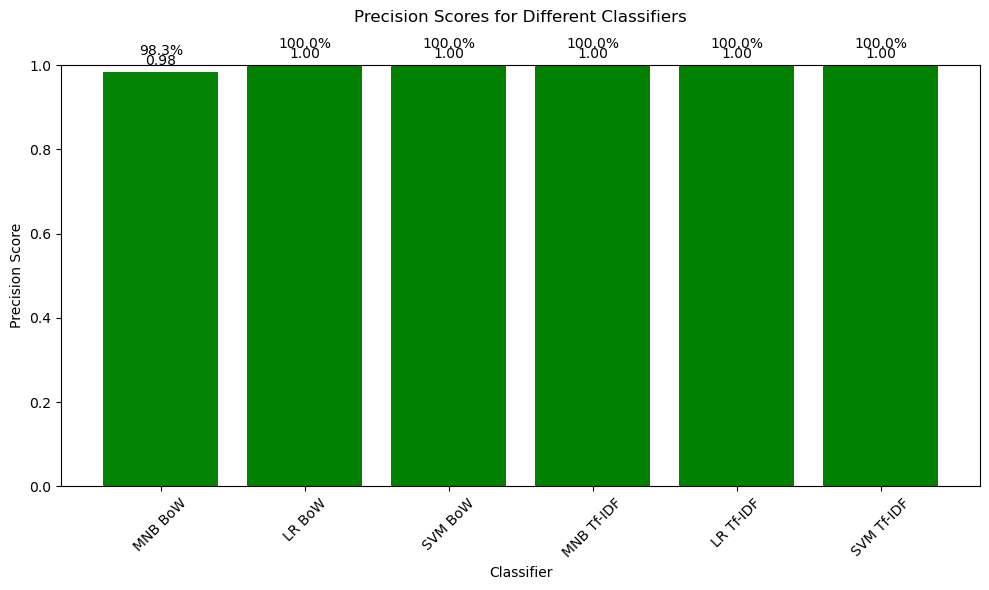

In [28]:
import matplotlib.pyplot as plt

classifiers = results_data['Classifier']
precision_scores = results_data['Precision']

plt.figure(figsize=(10, 6))

max_precision = max(precision_scores)  # Get the maximum precision score

for classifier, precision in zip(classifiers, precision_scores):
    opacity = precision / max_precision  # Calculate the opacity based on precision
    plt.bar(classifier, precision, alpha=opacity, color='green')

    plt.annotate(f'{precision:.2f}', xy=(classifier, precision),
                 xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

    # Display the percentage on top of the bar
    percent_bar = f'{precision * 100:.1f}%'
    plt.annotate(percent_bar, xy=(classifier, precision),
                 xytext=(0, 10), textcoords='offset points', ha='center', va='bottom', fontsize=10)

plt.title('Precision Scores for Different Classifiers\n\n')
plt.xlabel('Classifier')
plt.ylabel('Precision Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#References: https://www.w3schools.com/python/


INTERPRETATION:
Accuracy shows how well the classifiers are performing. It seems that the MNB BoW classifier has the highest accuracy (97.13%), followed closely by SVM Tf-IDF (96.68%).
ROC-AUC represents how well the classifiers can distinguish between the positive and negative classes. LR Tf-IDF has the highest ROC-AUC value (95.96%), indicating its ability to produce good probabilities for distinguishing between the two classes.
Precision indicates how many of the positive predictions are correct. All the classifiers have a precision of 100% or close to 100%, which means they have a low number of false positives.

### Programming Assignment Details

1. You can use libraries: Numpy, Pandas, Scikit-Learn, Matplotlib and Seaborn
2. Explain each and every task that is performed for each cell. USE MARKDOWNS!!! Still you need to comment your code.
3. If using any resource (books, internet), please make sure that you cite it within that cell.
4. Do not rename the dataset_files.

###  Submission details
Fill your name and ID in the jupyter notebook for each group member in the following format:

1. First Student Name and ID: ABC 1001XXXXXX
2. Second Student Name and ID: DEF 1002XXXXXX
3. Third Student Name and ID: GHI 1003XXXXXX

Name your submission files:

yourLastName_Last4digitsofyourID.ipynb

EG: abc_1234_def_5678_xyz3819.ipynb

### NOTE: Only one team member will submit the file.